# STEP 1: LOAD DAN GABUNG DATASET INDONLP

In [1]:
import pandas as pd
import os
import glob
import warnings
warnings.filterwarnings('ignore')

def try_read_csv(file_path):

    # Mencoba membaca file CSV dengan berbagai parameter
    read_attempts = [
        {'delimiter': '\t', 'encoding': 'utf-8'},
        {'delimiter': ',', 'encoding': 'utf-8'},
    ]
    
    for params in read_attempts:
        try:
            df = pd.read_csv(file_path, **params)
            print(f" {os.path.basename(file_path)}: {df.shape} (delimiter: {params['delimiter']})")
            return df
        except:
            continue
    
    print(f"✗ {os.path.basename(file_path)}: Gagal dimuat")
    return None

def standardize_columns(df):
    
    # Standardisasi nama kolom ke Tweet dan Label
    if 'Tweet' in df.columns and 'Label' in df.columns:
        return df
    
    # Mapping kolom yang mungkin
    text_keywords = ['text', 'tweet', 'content', 'message']
    label_keywords = ['label', 'emotion', 'sentiment', 'class']
    
    text_col = next((col for col in df.columns if any(kw in col.lower() for kw in text_keywords)), None)
    label_col = next((col for col in df.columns if any(kw in col.lower() for kw in label_keywords)), None)
    
    if text_col and label_col:
        df = df.rename(columns={text_col: 'Tweet', label_col: 'Label'})
        print(f"  → Renamed: {text_col} → Tweet, {label_col} → Label")
        return df
    
    print(f"  ⚠️ Kolom tidak sesuai: {list(df.columns)}")
    return None

def load_and_combine_indonlp():
    
    # Memuat dan menggabungkan dataset IndoNLP dengan error handling yang disederhanakan
    print(f"{'='*60}")
    print("LOADING DATASET INDONLP")
    print(f"{'='*60}")
    
    indonlp_folder = 'Dataset_IndoNLP'
    
    # Cek folder dan file
    if not os.path.exists(indonlp_folder):
        print(f" Folder {indonlp_folder} tidak ditemukan!")
        return None
    
    csv_files = glob.glob(os.path.join(indonlp_folder, "*.csv"))
    if not csv_files:
        print(f" Tidak ada file CSV dalam folder {indonlp_folder}!")
        return None
    
    print(f" Ditemukan {len(csv_files)} file CSV")
    
    # Load dan proses setiap file
    dataframes = []
    for file in csv_files:
        df = try_read_csv(file)
        if df is not None:
            df_standardized = standardize_columns(df)
            if df_standardized is not None:
                dataframes.append(df_standardized)
    
    if not dataframes:
        print(" Tidak ada file yang berhasil dimuat!")
        return None
    
    # Gabungkan semua dataframe
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Tampilkan hasil
    print(f"\n{'='*50}")
    print("HASIL PENGGABUNGAN:")
    print(f"{'='*50}")
    print(f"Total data: {len(combined_df):,}")
    print(f"Shape: {combined_df.shape}")
    print(f"Kolom: {list(combined_df.columns)}")
    
    # Distribusi label
    if 'Label' in combined_df.columns:
        print(f"\nDistribusi Label:")
        label_dist = combined_df['Label'].value_counts()
        for label, count in label_dist.items():
            print(f"  {label}: {count:,}")
    
    # Missing values
    missing = combined_df.isnull().sum().sum()
    if missing > 0:
        print(f"\nMissing values: {missing:,}")
    else:
        print(f"\n Tidak ada missing values")
    
    return combined_df

def save_and_display_results(df, filename='Dataset_IndoNLP_Combined.csv'):
    
    # Simpan hasil dan tampilkan sample data
    df.to_csv(filename, index=False, encoding='utf-8')
    print(f"\n Dataset disimpan: {filename}")
    
    # Sample data
    print(f"\n SAMPLE DATA (5 baris pertama):")
    print("="*70)
    for idx, row in df.head().iterrows():
        tweet = str(row['Tweet'])[:80] + "..." if len(str(row['Tweet'])) > 80 else str(row['Tweet'])
        print(f"{idx+1}. [{row['Label']}] {tweet}")
    
    print(f"\n RINGKASAN:")
    print(f"  - Total data: {len(df):,}")
    print(f"  - Unique labels: {df['Label'].nunique()}")
    print(f"  - Avg tweet length: {df['Tweet'].str.len().mean():.1f} karakter")
    print(f"  - File format: CSV (UTF-8, comma delimiter)")


print("Memulai proses loading dataset IndoNLP...")

# Load dan gabung dataset
df_indonlp = load_and_combine_indonlp()

if df_indonlp is not None:
    
    # Simpan dan tampilkan hasil
    save_and_display_results(df_indonlp)
    
    print(f"\n{'='*60}")
    print(" STEP 1 SELESAI!")
    print(f"{'='*60}")
    print(" Output: Dataset_IndoNLP_Combined.csv")
    print(" Siap untuk Step 2: Load Dataset Crawling")
    
else:
    print(f"\n{'='*60}")
    print(" STEP 1 GAGAL!")
    print(f"{'='*60}")
    print(" Troubleshooting:")
    print("   - Pastikan folder 'Dataset_IndoNLP' ada")
    print("   - Pastikan ada file CSV di dalamnya")
    print("   - Periksa format dan delimiter file")
    print("   - Pastikan ada kolom text dan label")

Memulai proses loading dataset IndoNLP...
LOADING DATASET INDONLP
 Ditemukan 6 file CSV
 AngerData.csv: (1130, 2) (delimiter: 	)
 FearData.csv: (911, 2) (delimiter: 	)
 JoyData.csv: (1275, 2) (delimiter: 	)
 LoveData.csv: (760, 2) (delimiter: 	)
 NeutralData.csv: (2001, 2) (delimiter: 	)
 SadData.csv: (1003, 2) (delimiter: 	)

HASIL PENGGABUNGAN:
Total data: 7,080
Shape: (7080, 2)
Kolom: ['Tweet', 'Label']

Distribusi Label:
  Neutral: 2,001
  Joy: 1,275
  Anger: 1,130
  Sad: 1,003
  Fear: 911
  Love: 760

 Tidak ada missing values

 Dataset disimpan: Dataset_IndoNLP_Combined.csv

 SAMPLE DATA (5 baris pertama):
1. [Anger] pagi2 udah di buat emosi :)
2. [Anger] kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan or...
3. [Anger] dah lah emosi mulu liat emyu
4. [Anger] aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindaka...
5. [Anger] dih lu yg nyebelin bego

 RINGKASAN:
  - Total data: 7,080
  - Unique labels: 6
  - Avg tweet length

# STEP 2: LOAD DAN GABUNG DATASET CRAWLING

In [2]:
import pandas as pd
import os
import glob
import warnings
warnings.filterwarnings('ignore')

def try_read_crawling_csv(file_path):
    
    # Mencoba membaca file CSV crawling dengan berbagai parameter
    read_attempts = [
        {'delimiter': '\t', 'encoding': 'utf-8'},
        {'delimiter': ';', 'encoding': 'utf-8'}, 
    ]
    
    for params in read_attempts:
        try:
            df = pd.read_csv(file_path, **params)
            print(f" {os.path.basename(file_path)}: {df.shape} (delimiter: {params['delimiter']})")
            return df
        except:
            continue
    
    print(f" {os.path.basename(file_path)}: Gagal dimuat")
    return None

def extract_tweet_column(df, source_file):
    
    # Ekstrak kolom tweet dari dataframe dan tambahkan source info
    # Cari kolom Tweet atau yang serupa
    text_keywords = ['tweet', 'text', 'content', 'message', 'post']
    
    if 'Tweet' in df.columns:
        tweet_col = 'Tweet'
    else:
        tweet_col = next((col for col in df.columns 
                         if any(kw in col.lower() for kw in text_keywords)), None)
    
    if tweet_col:
        df_result = df[[tweet_col]].copy()
        if tweet_col != 'Tweet':
            df_result = df_result.rename(columns={tweet_col: 'Tweet'})
            print(f"  → Renamed: {tweet_col} → Tweet")
        
        df_result['source_file'] = os.path.basename(source_file)
        return df_result
    
    print(f" Kolom tweet tidak ditemukan: {list(df.columns)}")
    return None

def load_and_combine_crawling():
    
    # Memuat dan menggabungkan dataset crawling dengan error handling yang disederhanakan
    print(f"{'='*60}")
    print("LOADING DATASET CRAWLING")
    print(f"{'='*60}")
    
    crawling_folder = 'Dataset_Crawling'
    
    # Cek folder dan file
    if not os.path.exists(crawling_folder):
        print(f" Folder {crawling_folder} tidak ditemukan!")
        return None
    
    csv_files = glob.glob(os.path.join(crawling_folder, "*.csv"))
    if not csv_files:
        print(f" Tidak ada file CSV dalam folder {crawling_folder}!")
        return None
    
    print(f" Ditemukan {len(csv_files)} file CSV")
    
    # Load dan proses setiap file
    dataframes = []
    successful_files = 0
    
    for file in csv_files:
        df = try_read_crawling_csv(file)
        if df is not None:
            df_tweet = extract_tweet_column(df, file)
            if df_tweet is not None:
                dataframes.append(df_tweet)
                successful_files += 1
    
    if not dataframes:
        print(" Tidak ada file yang berhasil dimuat!")
        return None
    
    # Gabungkan semua dataframe
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Tampilkan hasil
    print(f"\n{'='*50}")
    print("HASIL PENGGABUNGAN:")
    print(f"{'='*50}")
    print(f"Total data: {len(combined_df):,}")
    print(f"Shape: {combined_df.shape}")
    print(f"Files berhasil: {successful_files}/{len(csv_files)}")
    
    # Distribusi per file
    if 'source_file' in combined_df.columns:
        print(f"\nDistribusi per file:")
        file_dist = combined_df['source_file'].value_counts()
        for filename, count in file_dist.items():
            print(f"  {filename}: {count:,}")
    
    # Missing values
    missing = combined_df.isnull().sum().sum()
    if missing > 0:
        print(f"\nMissing values: {missing:,}")
    else:
        print(f"\n Tidak ada missing values")
    
    # Statistik panjang tweet
    if 'Tweet' in combined_df.columns:
        tweet_lengths = combined_df['Tweet'].astype(str).str.len()
        print(f"\nStatistik panjang tweet:")
        print(f"  Min: {tweet_lengths.min()}, Max: {tweet_lengths.max()}")
        print(f"  Mean: {tweet_lengths.mean():.1f}, Median: {tweet_lengths.median():.1f}")
    
    return combined_df

def save_and_display_crawling_results(df, filename='Dataset_Crawling_Combined.csv'):
    
    # Simpan hasil dan tampilkan sample data crawling
    df.to_csv(filename, index=False, encoding='utf-8')
    print(f"\n Dataset crawling disimpan: {filename}")
    
    # Sample data
    print(f"\n SAMPLE DATA (5 baris pertama):")
    print("="*70)
    for idx, row in df.head().iterrows():
        tweet = str(row['Tweet'])[:60] + "..." if len(str(row['Tweet'])) > 60 else str(row['Tweet'])
        source = row.get('source_file', 'Unknown')
        char_count = len(str(row['Tweet']))
        word_count = len(str(row['Tweet']).split())
        print(f"{idx+1}. [{char_count:3d}c, {word_count:2d}w] {tweet}")
        print(f"    Source: {source}")
    
    print(f"\n RINGKASAN:")
    print(f"  - Total data: {len(df):,}")
    print(f"  - Unique sources: {df['source_file'].nunique()}")
    print(f"  - Avg tweet length: {df['Tweet'].str.len().mean():.1f} karakter")
    print(f"  - Status: Belum berlabel (perlu pelabelan manual)")
    print(f"  - File format: CSV (UTF-8, comma delimiter)")


print("Memulai proses loading dataset crawling...")

# Load dan gabung dataset
df_crawling = load_and_combine_crawling()

if df_crawling is not None:
    # Simpan dan tampilkan hasil
    save_and_display_crawling_results(df_crawling)
    
    print(f"\n{'='*60}")
    print("STEP 2 SELESAI!")
    print(f"{'='*60}")
    print("Output: Dataset_Crawling_Combined.csv")
    print("Siap untuk Step 3: Essential Dataset Creation")
    
else:
    print(f"\n{'='*60}")
    print("STEP 2 GAGAL!")
    print(f"{'='*60}")
    print("Troubleshooting:")
    print("   - Pastikan folder 'Dataset_Crawling' ada")
    print("   - Pastikan ada file CSV di dalamnya")
    print("   - Periksa format file (comma delimiter)")
    print("   - Pastikan ada kolom tweet/text")

Memulai proses loading dataset crawling...
LOADING DATASET CRAWLING
 Ditemukan 20 file CSV
 opini_indonesia_kaburajadulu_1.csv: (671, 1) (delimiter: 	)
  → Renamed: conversation_id_str,created_at,favorite_count,Tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username → Tweet
 opini_indonesia_kaburajadulu_10.csv: (643, 1) (delimiter: 	)
  → Renamed: conversation_id_str,created_at,favorite_count,Tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username → Tweet
 opini_indonesia_kaburajadulu_2.csv: (551, 1) (delimiter: 	)
  → Renamed: conversation_id_str,created_at,favorite_count,Tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username → Tweet
 opini_indonesia_kaburajadulu_3.csv: (628, 1) (delimiter: 	)
  → Renamed: conversation_id_str,created_at,favorite_count,Tweet,id_str,i

# STEP 3: DATA CLEANING - HAPUS NaN DAN DUPLIKAT

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def analyze_data_quality(df, dataset_name):
    
    # Analisis kualitas data sebelum cleaning
    print(f"{'='*60}")
    print(f"CLEANING DATASET: {dataset_name}")
    print(f"{'='*60}")
    print(f"Shape awal: {df.shape}")
    
    # Missing values
    missing_total = df.isnull().sum().sum()
    if missing_total > 0:
        print(f" Missing values: {missing_total}")
        for col, count in df.isnull().sum().items():
            if count > 0:
                print(f"   - {col}: {count} ({count/len(df)*100:.1f}%)")
    else:
        print(" Tidak ada missing values")
    
    # Empty/whitespace tweets
    if 'Tweet' in df.columns:
        empty_tweets = (df['Tweet'].isna() | (df['Tweet'].astype(str).str.strip() == '')).sum()
        duplicates = df.duplicated(subset=['Tweet']).sum()
        print(f" Tweet kosong: {empty_tweets}")
        print(f" Tweet duplikat: {duplicates}")
    
    return empty_tweets if 'Tweet' in df.columns else 0, duplicates if 'Tweet' in df.columns else 0

def clean_dataframe(df):
    
    # Membersihkan dataframe dari missing values dan duplikat
    original_count = len(df)
    
    # Hapus tweet kosong/null
    if 'Tweet' in df.columns:
        df = df.dropna(subset=['Tweet'])
        df = df[df['Tweet'].astype(str).str.strip() != '']
    
    # Hapus label kosong (jika ada)
    if 'Label' in df.columns:
        df = df.dropna(subset=['Label'])
        df = df[df['Label'].astype(str).str.strip() != '']
    
    # Hapus duplikat
    if 'Tweet' in df.columns:
        df = df.drop_duplicates(subset=['Tweet'], keep='first')
    
    # Reset index
    df = df.reset_index(drop=True)
    
    cleaned_count = len(df)
    removed_count = original_count - cleaned_count
    
    print(f" Cleaning results: {original_count} → {cleaned_count} (-{removed_count})")
    
    return df

def display_cleaning_summary(df, dataset_name):
    
    # Tampilkan ringkasan hasil cleaning
    print(f"\n HASIL CLEANING {dataset_name}:")
    print(f"   - Total data: {len(df):,}")
    print(f"   - Shape: {df.shape}")
    
    if 'Tweet' in df.columns:
        tweet_lengths = df['Tweet'].str.len()
        print(f"   - Panjang tweet: {tweet_lengths.min()}-{tweet_lengths.max()} (avg: {tweet_lengths.mean():.1f})")
    
    if 'Label' in df.columns:
        print(f"   - Unique labels: {df['Label'].nunique()}")
        print(f"   - Label distribution:")
        for label, count in df['Label'].value_counts().items():
            print(f"     {label}: {count:,}")

def clean_dataset(file_path, dataset_name):
    
    # Membersihkan dataset dari nilai NaN/null/kosong dan duplikat
    try:
        # Load dataset
        df = pd.read_csv(file_path)
        
        # Analisis kualitas data
        empty_count, dup_count = analyze_data_quality(df, dataset_name)
        
        # Proses cleaning
        if empty_count > 0 or dup_count > 0:
            df_cleaned = clean_dataframe(df)
        else:
            print(" Data sudah bersih, tidak perlu cleaning")
            df_cleaned = df
        
        # Tampilkan summary
        display_cleaning_summary(df_cleaned, dataset_name)
        
        return df_cleaned
        
    except FileNotFoundError:
        print(f" File {file_path} tidak ditemukan!")
        return None
    except Exception as e:
        print(f" Error saat cleaning: {str(e)}")
        return None

def save_cleaned_dataset(df, dataset_name, filename):
    
    # Simpan dataset yang sudah dibersihkan
    if df is not None:
        df.to_csv(filename, index=False, encoding='utf-8')
        print(f" {dataset_name} cleaned dataset saved: {filename}")
        return True
    return False

# ============================================
# JALANKAN CLEANING
# ============================================

print("Memulai proses data cleaning...")

# Clean IndoNLP Dataset
print("\n Processing IndoNLP Dataset...")
df_indonlp_cleaned = clean_dataset('Dataset_IndoNLP_Combined.csv', 'INDONLP')
save_cleaned_dataset(df_indonlp_cleaned, 'IndoNLP', 'Dataset_IndoNLP_Cleaned.csv')

# Clean Crawling Dataset  
print("\n Processing Crawling Dataset...")
df_crawling_cleaned = clean_dataset('Dataset_Crawling_Combined.csv', 'CRAWLING')
save_cleaned_dataset(df_crawling_cleaned, 'Crawling', 'Dataset_Crawling_Cleaned.csv')

# Final Summary
if df_indonlp_cleaned is not None and df_crawling_cleaned is not None:
    print(f"\n{'='*60}")
    print(" DATA CLEANING SELESAI!")
    print(f"{'='*60}")
    print(f" RINGKASAN:")
    print(f"   - IndoNLP: {len(df_indonlp_cleaned):,} data (dengan label)")
    print(f"   - Crawling: {len(df_crawling_cleaned):,} data (tanpa label)")
    print(f"   - Total: {len(df_indonlp_cleaned) + len(df_crawling_cleaned):,} data")
    print(f"\n Output files:")
    print(f"   - Dataset_IndoNLP_Cleaned.csv")
    print(f"   - Dataset_Crawling_Cleaned.csv")
    print(f"\n Siap untuk Step 4: Essential Dataset Creation")
else:
    print(f"\n CLEANING GAGAL!")
    print(" Periksa file input dan coba lagi")

Memulai proses data cleaning...

 Processing IndoNLP Dataset...
CLEANING DATASET: INDONLP
Shape awal: (7080, 2)
 Tidak ada missing values
 Tweet kosong: 0
 Tweet duplikat: 62
 Cleaning results: 7080 → 7018 (-62)

 HASIL CLEANING INDONLP:
   - Total data: 7,018
   - Shape: (7018, 2)
   - Panjang tweet: 4-2097 (avg: 99.7)
   - Unique labels: 6
   - Label distribution:
     Neutral: 1,986
     Joy: 1,258
     Anger: 1,123
     Sad: 991
     Fear: 906
     Love: 754
 IndoNLP cleaned dataset saved: Dataset_IndoNLP_Cleaned.csv

 Processing Crawling Dataset...
CLEANING DATASET: CRAWLING
Shape awal: (9132, 2)
 Tidak ada missing values
 Tweet kosong: 0
 Tweet duplikat: 7719
 Cleaning results: 9132 → 1413 (-7719)

 HASIL CLEANING CRAWLING:
   - Total data: 1,413
   - Shape: (1413, 2)
   - Panjang tweet: 57-810 (avg: 321.4)
 Crawling cleaned dataset saved: Dataset_Crawling_Cleaned.csv

 DATA CLEANING SELESAI!
 RINGKASAN:
   - IndoNLP: 7,018 data (dengan label)
   - Crawling: 1,413 data (tanpa lab

# STEP 4: CEK STRUKTUR DATASET

In [4]:
import pandas as pd
import numpy as np

def analyze_basic_info(df, dataset_name, file_path):
    
    # Analisis informasi dasar dataset
    print(f"{'='*60}")
    print(f"STRUKTUR DATASET: {dataset_name}")
    print(f"{'='*60}")
    print(f" File: {file_path}")
    print(f" Shape: {df.shape} ({df.shape[0]:,} rows, {df.shape[1]} cols)")
    print(f" Columns: {list(df.columns)}")
    
    # Data types dan null info
    print(f" Data quality:")
    for col in df.columns:
        non_null = df[col].count()
        null_count = df[col].isnull().sum()
        dtype = str(df[col].dtype)
        print(f"   {col}: {dtype} | Valid: {non_null:,} | Null: {null_count}")

def analyze_tweet_column(df):
    
    # Analisis kolom Tweet
    if 'Tweet' not in df.columns:
        return
    
    print(f"\n ANALISIS TWEET:")
    tweets = df['Tweet'].dropna().astype(str)
    
    if len(tweets) > 0:
        # Statistik panjang
        lengths = tweets.str.len()
        word_counts = tweets.str.split().str.len()
        
        print(f"   Panjang: {lengths.min()}-{lengths.max()} (avg: {lengths.mean():.1f})")
        print(f"   Kata: {word_counts.min()}-{word_counts.max()} (avg: {word_counts.mean():.1f})")
        
        # Sample tweets
        print(f"   Sample tweets:")
        for i in range(min(3, len(tweets))):
            tweet = tweets.iloc[i]
            preview = tweet[:60] + ('...' if len(tweet) > 60 else '')
            print(f"   {i+1}. [{len(tweet)}c] {preview}")

def analyze_label_column(df):
    
    # Analisis kolom Label (jika ada)
    if 'Label' not in df.columns:
        return
    
    print(f"\n  ANALISIS LABEL:")
    labels = df['Label'].dropna()
    
    if len(labels) > 0:
        label_counts = labels.value_counts()
        total = len(labels)
        
        print(f"   Distribusi ({len(label_counts)} classes):")
        for label, count in label_counts.items():
            pct = (count / total) * 100
            print(f"   - {str(label)}: {count:,} ({pct:.1f}%)")
        
        # Balance check
        balance_ratio = label_counts.max() / label_counts.min()
        balance_status = "Tidak seimbang" if balance_ratio > 3 else "Seimbang"
        print(f"   Balance ratio: {balance_ratio:.1f}:1 {balance_status}")

def analyze_data_quality(df):
    
    # Analisis kualitas data
    print(f"\n KUALITAS DATA:")
    
    # Missing values
    missing_total = df.isnull().sum().sum()
    print(f"   Missing values: {missing_total}")
    
    # Duplicates
    if 'Tweet' in df.columns:
        duplicates = df.duplicated(subset=['Tweet']).sum()
        print(f"   Duplikat: {duplicates} ({duplicates/len(df)*100:.1f}%)")
    
    # Memory usage
    memory_mb = df.memory_usage(deep=True).sum() / 1024 / 1024
    print(f"   Memory usage: {memory_mb:.1f} MB")
    
    # Empty tweets
    if 'Tweet' in df.columns:
        empty_tweets = df['Tweet'].astype(str).str.strip().eq('').sum()
        if empty_tweets > 0:
            print(f"   ⚠️ Tweet kosong: {empty_tweets}")

def check_dataset_structure(file_path, dataset_name):
    
    # Memeriksa struktur dataset dengan analisis yang disederhanakan
    try:
        # Load dataset
        df = pd.read_csv(file_path)
        
        # Analisis komprehensif
        analyze_basic_info(df, dataset_name, file_path)
        analyze_tweet_column(df)
        analyze_label_column(df)
        analyze_data_quality(df)
        
        return df
        
    except FileNotFoundError:
        print(f" File {file_path} tidak ditemukan!")
        return None
    except Exception as e:
        print(f" Error: {str(e)}")
        return None

def compare_datasets(df_indonlp, df_crawling):

    # Perbandingan kedua dataset
    print(f"\n{'='*60}")
    print(" PERBANDINGAN DATASET")
    print(f"{'='*60}")
    
    # Dataset info
    datasets_info = [
        ("IndoNLP", df_indonlp, "Berlabel"),
        ("Crawling", df_crawling, "Belum berlabel")
    ]
    
    total_data = 0
    for name, df, status in datasets_info:
        if df is not None:
            count = len(df)
            total_data += count
            print(f"{name}:")
            print(f"  - Data: {count:,}")
            print(f"  - Kolom: {list(df.columns)}")
            print(f"  - Status: {status}")
    
    # Summary
    if df_indonlp is not None and df_crawling is not None:
        labeled_pct = len(df_indonlp) / total_data * 100
        unlabeled_pct = len(df_crawling) / total_data * 100
        
        print(f"\n TOTAL GABUNGAN:")
        print(f"  - Total: {total_data:,} data")
        print(f"  - Berlabel: {len(df_indonlp):,} ({labeled_pct:.1f}%)")
        print(f"  - Belum berlabel: {len(df_crawling):,} ({unlabeled_pct:.1f}%)")
        
        print(f"\n REKOMENDASI:")
        print(f"  - Gunakan IndoNLP untuk training")
        print(f"  - Crawling data untuk augmentasi")
        print(f"  - Pertimbangkan semi-supervised learning")


print("Memulai analisis struktur dataset...")

# Analisis IndoNLP Dataset
print("\n Analyzing IndoNLP Dataset...")
df_indonlp = check_dataset_structure('Dataset_IndoNLP_Cleaned.csv', 'INDONLP (CLEANED)')

# Analisis Crawling Dataset
print("\n Analyzing Crawling Dataset...")
df_crawling = check_dataset_structure('Dataset_Crawling_Cleaned.csv', 'CRAWLING (CLEANED)')

# Perbandingan dataset
if df_indonlp is not None or df_crawling is not None:
    compare_datasets(df_indonlp, df_crawling)

# Final status
success_count = sum(1 for df in [df_indonlp, df_crawling] if df is not None)

print(f"\n{'='*60}")
if success_count == 2:
    print("PEMERIKSAAN STRUKTUR SELESAI!")
    print("Siap untuk Step 5: Essential Dataset Creation")
elif success_count == 1:
    print("PEMERIKSAAN SEBAGIAN SELESAI!")
    print("Periksa file yang gagal dimuat")
else:
    print("PEMERIKSAAN GAGAL!")
    print("Periksa file input dan coba lagi")
print(f"{'='*60}")

Memulai analisis struktur dataset...

 Analyzing IndoNLP Dataset...
STRUKTUR DATASET: INDONLP (CLEANED)
 File: Dataset_IndoNLP_Cleaned.csv
 Shape: (7018, 2) (7,018 rows, 2 cols)
 Columns: ['Tweet', 'Label']
 Data quality:
   Tweet: object | Valid: 7,018 | Null: 0
   Label: object | Valid: 7,018 | Null: 0

 ANALISIS TWEET:
   Panjang: 4-2097 (avg: 99.7)
   Kata: 1-356 (avg: 16.8)
   Sample tweets:
   1. [27c] pagi2 udah di buat emosi :)
   2. [184c] kok stabilitas negara, memange 10 thn negara tdk aman, bahka...
   3. [28c] dah lah emosi mulu liat emyu

  ANALISIS LABEL:
   Distribusi (6 classes):
   - Neutral: 1,986 (28.3%)
   - Joy: 1,258 (17.9%)
   - Anger: 1,123 (16.0%)
   - Sad: 991 (14.1%)
   - Fear: 906 (12.9%)
   - Love: 754 (10.7%)
   Balance ratio: 2.6:1 Seimbang

 KUALITAS DATA:
   Missing values: 0
   Duplikat: 0 (0.0%)
   Memory usage: 1.5 MB

 Analyzing Crawling Dataset...
STRUKTUR DATASET: CRAWLING (CLEANED)
 File: Dataset_Crawling_Cleaned.csv
 Shape: (1413, 2) (1,413 row

# STEP 5: DROP KOLOM YANG TIDAK DIPERLUKAN

In [5]:
import pandas as pd

def filter_essential_columns(df, dataset_name):
    
    # Filter dataset untuk hanya menyimpan kolom esensial (Tweet dan Label)
    print(f" Original: {df.shape} | Columns: {list(df.columns)}")
    
    # Tentukan kolom yang akan dipertahankan
    essential_cols = []
    
    # Tweet wajib ada
    if 'Tweet' in df.columns:
        essential_cols.append('Tweet')
    else:
        print(f" Kolom 'Tweet' tidak ditemukan!")
        return None
    
    # Label opsional
    if 'Label' in df.columns:
        essential_cols.append('Label')
        print(f" Mempertahankan: Tweet + Label")
    else:
        print(f" Mempertahankan: Tweet saja (Label tidak ada)")
    
    # Filter dataset
    df_filtered = df[essential_cols].copy()
    dropped_count = len(df.columns) - len(essential_cols)
    
    print(f" Result: {df_filtered.shape} | Dropped {dropped_count} columns")
    
    return df_filtered

def save_essential_dataset(df, save_path, dataset_name):
    
    # Simpan dataset esensial dan tampilkan summary
    if df is None:
        return False
    
    # Simpan file
    df.to_csv(save_path, index=False, encoding='utf-8')
    
    # Summary
    print(f" Saved: {save_path}")
    print(f" Final shape: {df.shape}")
    print(f" Columns: {list(df.columns)}")
    
    # Quick quality check
    missing_total = df.isnull().sum().sum()
    if missing_total > 0:
        print(f" Missing values: {missing_total}")
    
    # Sample data
    print(f" Sample:")
    for i, row in df.head(2).iterrows():
        tweet_preview = str(row['Tweet'])[:50] + "..." if len(str(row['Tweet'])) > 50 else str(row['Tweet'])
        if 'Label' in df.columns:
            print(f"   [{row['Label']}] {tweet_preview}")
        else:
            print(f"   {tweet_preview}")
    
    return True

def keep_essential_columns(file_path, dataset_name, save_path):
    
    # Main function untuk memproses dataset menjadi essential columns only
    try:
        print(f"{'='*60}")
        print(f"ESSENTIAL COLUMNS: {dataset_name}")
        print(f"{'='*60}")
        
        # Load dataset
        df = pd.read_csv(file_path)
        
        # Filter kolom esensial
        df_essential = filter_essential_columns(df, dataset_name)
        
        # Simpan hasil
        success = save_essential_dataset(df_essential, save_path, dataset_name)
        
        return df_essential if success else None
        
    except FileNotFoundError:
        print(f" File {file_path} tidak ditemukan!")
        return None
    except Exception as e:
        print(f" Error: {str(e)}")
        return None

def compare_essential_datasets(df_indonlp, df_crawling):
    
    # Perbandingan dataset essential
    print(f"\n{'='*60}")
    print(" RINGKASAN ESSENTIAL DATASETS")
    print(f"{'='*60}")
    
    # Dataset info
    datasets = [
        ("IndoNLP", df_indonlp, "Dataset_IndoNLP_Essential.csv"),
        ("Crawling", df_crawling, "Dataset_Crawling_Essential.csv")
    ]
    
    total_data = 0
    labeled_data = 0
    
    for name, df, filename in datasets:
        if df is not None:
            count = len(df)
            total_data += count
            has_label = 'Label' in df.columns
            
            if has_label:
                labeled_data += count
                status = "Berlabel"
            else:
                status = "Belum berlabel"
            
            print(f"{name}:")
            print(f"  - Data: {count:,}")
            print(f"  - Columns: {list(df.columns)}")
            print(f"  - Status: {status}")
            print(f"  - File: {filename}")
    
    # Summary
    if total_data > 0:
        labeled_pct = (labeled_data / total_data) * 100
        unlabeled_pct = 100 - labeled_pct
        
        print(f"\n TOTAL SUMMARY:")
        print(f"  - Total data: {total_data:,}")
        print(f"  - Berlabel: {labeled_data:,} ({labeled_pct:.1f}%)")
        print(f"  - Belum berlabel: {total_data - labeled_data:,} ({unlabeled_pct:.1f}%)")
        
        print(f"\n NEXT STEPS:")
        if labeled_data > 0:
            print(f" Ready for Step 6: Data Exploration")
        if total_data - labeled_data > 0:
            print(f" Crawling data available for augmentation")


print("Memulai proses essential columns extraction...")

# Proses IndoNLP Dataset
print("\n Processing IndoNLP Dataset...")
df_indonlp_essential = keep_essential_columns(
    file_path='Dataset_IndoNLP_Cleaned.csv',
    dataset_name='INDONLP',
    save_path='Dataset_IndoNLP_Essential.csv'
)

# Proses Crawling Dataset  
print("\n Processing Crawling Dataset...")
df_crawling_essential = keep_essential_columns(
    file_path='Dataset_Crawling_Cleaned.csv', 
    dataset_name='CRAWLING',
    save_path='Dataset_Crawling_Essential.csv'
)

# Perbandingan hasil
if df_indonlp_essential is not None or df_crawling_essential is not None:
    compare_essential_datasets(df_indonlp_essential, df_crawling_essential)

# Final status
success_count = sum(1 for df in [df_indonlp_essential, df_crawling_essential] if df is not None)

print(f"\n{'='*60}")
if success_count == 2:
    print("ESSENTIAL COLUMNS EXTRACTION SELESAI!")
    print("Output: Dataset_IndoNLP_Essential.csv, Dataset_Crawling_Essential.csv")
    print("Siap untuk Step 6: Data Exploration")
elif success_count == 1:
    print("SEBAGIAN PROSES SELESAI!")
    print("Periksa file yang gagal diproses")
else:
    print("PROSES GAGAL!")
    print("Periksa file input dan coba lagi")
print(f"{'='*60}")

Memulai proses essential columns extraction...

 Processing IndoNLP Dataset...
ESSENTIAL COLUMNS: INDONLP
 Original: (7018, 2) | Columns: ['Tweet', 'Label']
 Mempertahankan: Tweet + Label
 Result: (7018, 2) | Dropped 0 columns
 Saved: Dataset_IndoNLP_Essential.csv
 Final shape: (7018, 2)
 Columns: ['Tweet', 'Label']
 Sample:
   [Anger] pagi2 udah di buat emosi :)
   [Anger] kok stabilitas negara, memange 10 thn negara tdk a...

 Processing Crawling Dataset...
ESSENTIAL COLUMNS: CRAWLING
 Original: (1413, 2) | Columns: ['Tweet', 'source_file']
 Mempertahankan: Tweet saja (Label tidak ada)
 Result: (1413, 1) | Dropped 1 columns
 Saved: Dataset_Crawling_Essential.csv
 Final shape: (1413, 1)
 Columns: ['Tweet']
 Sample:
   1940712119583809877,Thu Jul 03 10:00:00 +0000 2025...
   1939920021817630973,Tue Jul 01 08:01:28 +0000 2025...

 RINGKASAN ESSENTIAL DATASETS
IndoNLP:
  - Data: 7,018
  - Columns: ['Tweet', 'Label']
  - Status: Berlabel
  - File: Dataset_IndoNLP_Essential.csv
Crawling:
 

# STEP 6: EKSPLORASI DATA

EKSPLORASI DATA INDONLP (BERLABEL)
 INFORMASI DASAR:
   Shape dataset: (7018, 2)
   Jumlah data: 7,018
   Kolom: ['Tweet', 'Label']

 DISTRIBUSI LABEL EMOSI:
   Label dan jumlahnya:
   - Neutral    :  1,986 ( 28.30%)
   - Joy        :  1,258 ( 17.93%)
   - Anger      :  1,123 ( 16.00%)
   - Sad        :    991 ( 14.12%)
   - Fear       :    906 ( 12.91%)
   - Love       :    754 ( 10.74%)

   Statistik distribusi:
   - Jumlah kelas: 6
   - Label terbanyak: Neutral (1,986 data)
   - Label tersedikit: Love (754 data)
   - Ratio terbanyak/tersedikit: 2.63:1

 ANALISIS PANJANG TEKS:
   Panjang karakter:
   - Min: 4
   - Max: 2097
   - Mean: 99.72
   - Median: 74.00
   - Std: 81.65

   Jumlah kata:
   - Min: 1
   - Max: 356
   - Mean: 16.80
   - Median: 13.00
   - Std: 13.59

   Rata-rata panjang karakter per label:
   - Love       : 128.11
   - Neutral    : 112.58
   - Anger      : 103.10
   - Sad        :  96.40
   - Joy        :  80.52
   - Fear       :  74.01

 SAMPLE DATA PER LABEL:

 

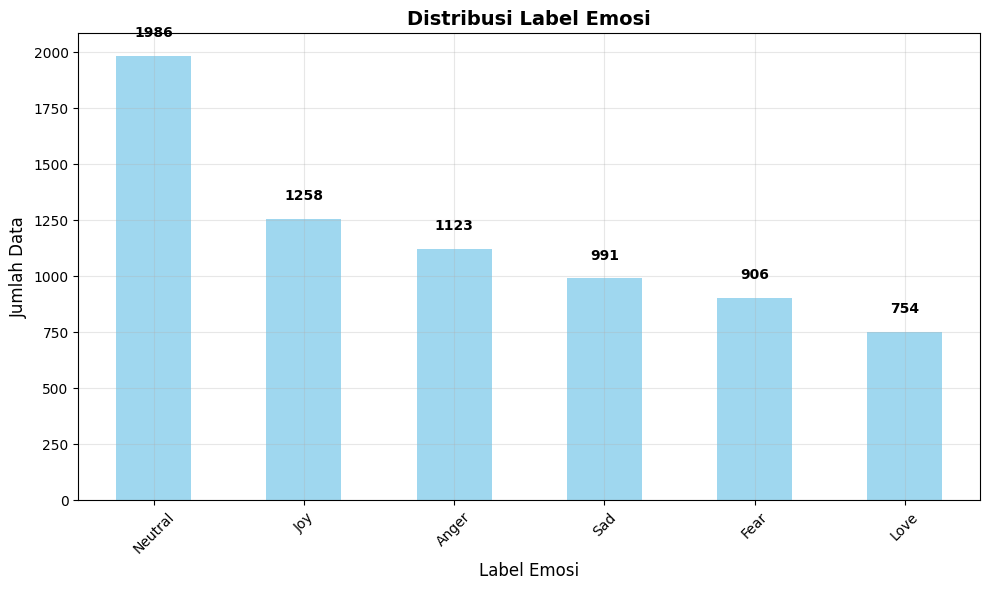

Visualisasi 1 disimpan: 1_distribusi_label_bar.png


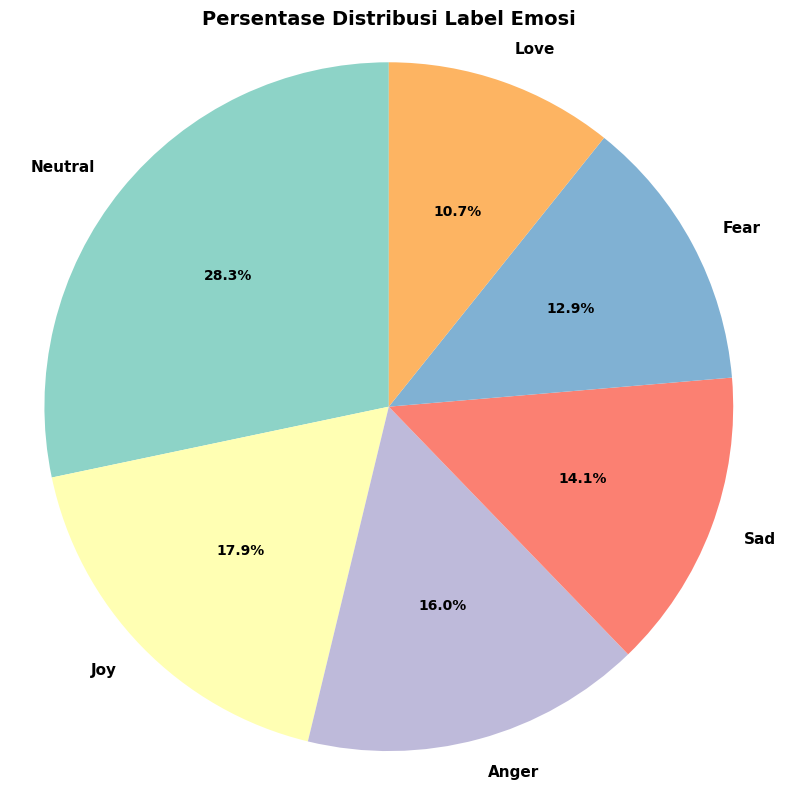

Visualisasi 2 disimpan: 2_distribusi_label_pie.png


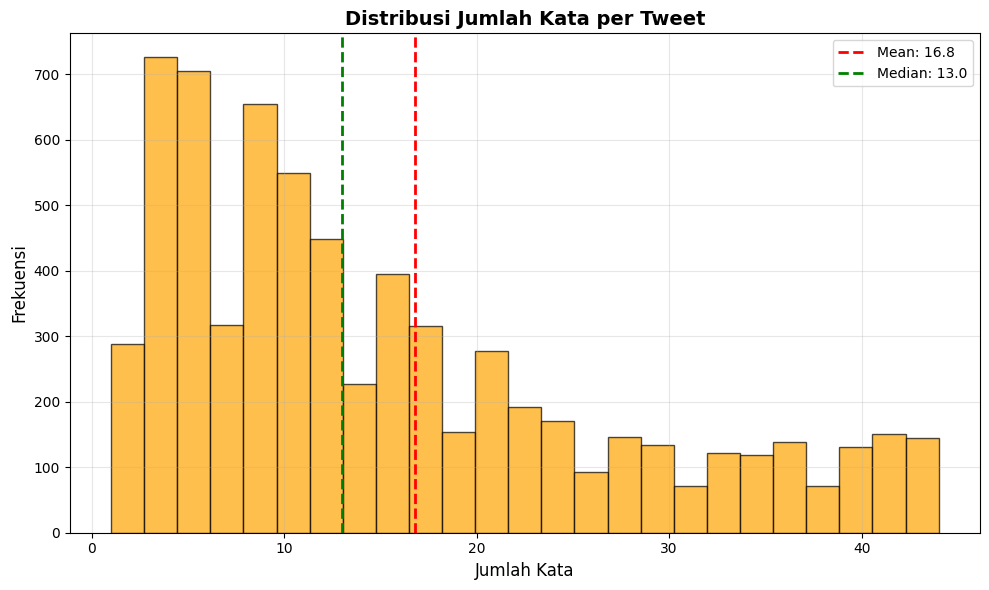

Visualisasi 3 disimpan: 3_distribusi_jumlah_kata.png

6. ANALISIS KATA YANG SERING MUNCUL:
   20 kata yang paling sering muncul:
    1. suka            :  1,431 kali
    2. aku             :  1,396 kali
    3. banget          :  1,344 kali
    4. yg              :  1,258 kali
    5. yang            :  1,233 kali
    6. dan             :  1,146 kali
    7. di              :  1,029 kali
    8. sama            :    854 kali
    9. ga              :    846 kali
   10. ada             :    820 kali
   11. ini             :    770 kali
   12. tapi            :    760 kali
   13. sedih           :    760 kali
   14. ya              :    728 kali
   15. dia             :    693 kali
   16. gue             :    663 kali
   17. kalo            :    660 kali
   18. itu             :    599 kali
   19. aja             :    592 kali
   20. bisa            :    580 kali

   Kata yang sering muncul per label (top 5):
   Anger:
     - yg: 284
     - gue: 197
     - banget: 180
     - ga: 175
     - di

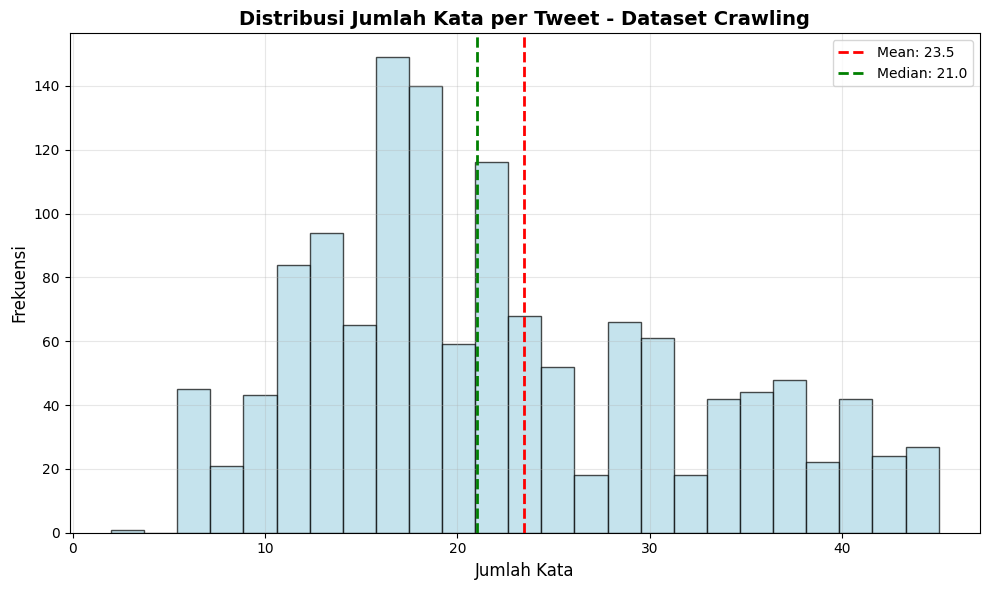

Visualisasi crawling disimpan: 4_distribusi_kata_crawling.png

RINGKASAN EKSPLORASI DATA
Dataset IndoNLP (Berlabel):
  - Jumlah data: 7,018
  - Jumlah kelas emosi: 6
  - Kelas emosi: ['Anger', 'Fear', 'Joy', 'Love', 'Neutral', 'Sad']
  - Rata-rata panjang: 99.7 karakter

Dataset Crawling (Belum Berlabel):
  - Jumlah data: 1,413
  - Status: Perlu pelabelan manual
  - Rata-rata panjang: 321.4 karakter

Total data gabungan: 8,431

 VISUALISASI YANG DISIMPAN:
  1. 1_distribusi_label_bar.png - Bar chart distribusi label
  2. 2_distribusi_label_pie.png - Pie chart distribusi label
  3. 3_distribusi_jumlah_kata.png - Histogram jumlah kata
  4. 4_word_frequency.png - Frekuensi kata yang sering muncul
  5. 5_distribusi_kata_crawling.png - Distribusi kata dataset crawling

EKSPLORASI DATA SELESAI!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

def explore_labeled_dataset(file_path):
    
    # Melakukan eksplorasi mendalam pada dataset yang sudah berlabel
    try:
        # Load dataset
        df = pd.read_csv(file_path)
        
        print(f"{'='*60}")
        print("EKSPLORASI DATA INDONLP (BERLABEL)")
        print(f"{'='*60}")
        
        # ============================================
        # INFORMASI DASAR
        # ============================================
        print(f" INFORMASI DASAR:")
        print(f"   Shape dataset: {df.shape}")
        print(f"   Jumlah data: {len(df):,}")
        print(f"   Kolom: {list(df.columns)}")
        
        # ============================================
        # ANALISIS DISTRIBUSI LABEL
        # ============================================
        print(f"\n DISTRIBUSI LABEL EMOSI:")
        label_counts = df['Label'].value_counts()
        total = len(df)
        
        print(f"   Label dan jumlahnya:")
        for label, count in label_counts.items():
            percentage = (count / total) * 100
            print(f"   - {label:10} : {count:6,} ({percentage:6.2f}%)")
        
        print(f"\n   Statistik distribusi:")
        print(f"   - Jumlah kelas: {len(label_counts)}")
        print(f"   - Label terbanyak: {label_counts.index[0]} ({label_counts.iloc[0]:,} data)")
        print(f"   - Label tersedikit: {label_counts.index[-1]} ({label_counts.iloc[-1]:,} data)")
        print(f"   - Ratio terbanyak/tersedikit: {label_counts.iloc[0]/label_counts.iloc[-1]:.2f}:1")
        
        # ============================================
        # ANALISIS PANJANG TEKS
        # ============================================
        print(f"\n ANALISIS PANJANG TEKS:")
        
        # Hitung statistik panjang
        df['char_length'] = df['Tweet'].str.len()
        df['word_count'] = df['Tweet'].str.split().str.len()
        
        print(f"   Panjang karakter:")
        print(f"   - Min: {df['char_length'].min()}")
        print(f"   - Max: {df['char_length'].max()}")
        print(f"   - Mean: {df['char_length'].mean():.2f}")
        print(f"   - Median: {df['char_length'].median():.2f}")
        print(f"   - Std: {df['char_length'].std():.2f}")
        
        print(f"\n   Jumlah kata:")
        print(f"   - Min: {df['word_count'].min()}")
        print(f"   - Max: {df['word_count'].max()}")
        print(f"   - Mean: {df['word_count'].mean():.2f}")
        print(f"   - Median: {df['word_count'].median():.2f}")
        print(f"   - Std: {df['word_count'].std():.2f}")
        
        # Panjang teks per label (hanya angka, tidak ada visualisasi bar)
        print(f"\n   Rata-rata panjang karakter per label:")
        char_by_label = df.groupby('Label')['char_length'].mean().sort_values(ascending=False)
        for label, avg_len in char_by_label.items():
            print(f"   - {label:10} : {avg_len:6.2f}")
        
        # ============================================
        # SAMPLE DATA PER LABEL
        # ============================================
        print(f"\n SAMPLE DATA PER LABEL:")
        for label in sorted(df['Label'].unique()):
            print(f"\n   --- LABEL: {label} ---")
            samples = df[df['Label'] == label]['Tweet'].head(3)
            for i, tweet in enumerate(samples, 1):
                display_tweet = tweet[:100] + "..." if len(tweet) > 100 else tweet
                print(f"   {i}. {display_tweet}")
        
        # ============================================
        # VISUALISASI
        # ============================================
        print(f"\n MEMBUAT VISUALISASI")
        
        # Visualisasi 1: Distribusi label (bar chart)
        plt.figure(figsize=(10, 6))
        ax = label_counts.plot(kind='bar', color='skyblue', alpha=0.8)
        plt.title('Distribusi Label Emosi', fontsize=14, fontweight='bold')
        plt.xlabel('Label Emosi', fontsize=12)
        plt.ylabel('Jumlah Data', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Menambahkan nilai di atas bar
        for i, v in enumerate(label_counts.values):
            ax.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('1_distribusi_label_bar.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("Visualisasi 1 disimpan: 1_distribusi_label_bar.png")
        
        # Visualisasi 2: Distribusi label (pie chart)
        plt.figure(figsize=(8, 8))
        wedges, texts, autotexts = plt.pie(label_counts.values, labels=label_counts.index, 
                                         autopct='%1.1f%%', startangle=90,
                                         colors=plt.cm.Set3.colors)
        
        # Menambahkan label dan format
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)
        
        for text in texts:
            text.set_fontsize(11)
            text.set_fontweight('bold')
        
        plt.title('Persentase Distribusi Label Emosi', fontsize=14, fontweight='bold')
        plt.axis('equal')
        plt.tight_layout()
        plt.savefig('2_distribusi_label_pie.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("Visualisasi 2 disimpan: 2_distribusi_label_pie.png")
        
        # Visualisasi 3: Distribusi jumlah kata
        plt.figure(figsize=(10, 6))
        # Filter outliers untuk tampilan yang lebih jelas
        word_count_filtered = df['word_count'][df['word_count'] <= df['word_count'].quantile(0.95)]
        
        plt.hist(word_count_filtered, bins=25, alpha=0.7, color='orange', edgecolor='black')
        plt.title('Distribusi Jumlah Kata per Tweet', fontsize=14, fontweight='bold')
        plt.xlabel('Jumlah Kata', fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["word_count"].mean():.1f}')
        plt.axvline(df['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["word_count"].median():.1f}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('3_distribusi_jumlah_kata.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("Visualisasi 3 disimpan: 3_distribusi_jumlah_kata.png")
        
        # ============================================
        # ANALISIS KATA YANG SERING MUNCUL
        # ============================================
        print(f"\n6. ANALISIS KATA YANG SERING MUNCUL:")
        
        # Gabungkan semua tweet
        all_text = ' '.join(df['Tweet'].astype(str))
        words = all_text.lower().split()
        
        # Hitung frekuensi kata
        word_freq = Counter(words)
        most_common = word_freq.most_common(20)
        
        print(f"   20 kata yang paling sering muncul:")
        for i, (word, freq) in enumerate(most_common, 1):
            print(f"   {i:2d}. {word:15} : {freq:6,} kali")
        
        # Kata per label
        print(f"\n   Kata yang sering muncul per label (top 5):")
        for label in sorted(df['Label'].unique()):
            label_text = ' '.join(df[df['Label'] == label]['Tweet'].astype(str))
            label_words = label_text.lower().split()
            label_freq = Counter(label_words).most_common(5)
            print(f"   {label}:")
            for word, freq in label_freq:
                print(f"     - {word}: {freq}")
        
        return df
        
    except FileNotFoundError:
        print(f"File {file_path} tidak ditemukan!")
        return None
    except Exception as e:
        print(f"Error saat eksplorasi data: {str(e)}")
        return None

def explore_unlabeled_dataset(file_path):
    
    # Melakukan eksplorasi pada dataset yang belum berlabel (crawling)
    try:
        # Load dataset
        df = pd.read_csv(file_path)
        
        print(f"\n{'='*60}")
        print("EKSPLORASI DATA CRAWLING (BELUM BERLABEL)")
        print(f"{'='*60}")
        
        print(f" INFORMASI DASAR:")
        print(f"   Shape dataset: {df.shape}")
        print(f"   Jumlah data: {len(df):,}")
        print(f"   Kolom: {list(df.columns)}")
        
        # Analisis panjang teks
        df['char_length'] = df['Tweet'].str.len()
        df['word_count'] = df['Tweet'].str.split().str.len()
        
        print(f"\n ANALISIS PANJANG TEKS:")
        print(f"   Panjang karakter:")
        print(f"   - Min: {df['char_length'].min()}")
        print(f"   - Max: {df['char_length'].max()}")
        print(f"   - Mean: {df['char_length'].mean():.2f}")
        print(f"   - Median: {df['char_length'].median():.2f}")
        
        print(f"\n   Jumlah kata:")
        print(f"   - Min: {df['word_count'].min()}")
        print(f"   - Max: {df['word_count'].max()}")
        print(f"   - Mean: {df['word_count'].mean():.2f}")
        print(f"   - Median: {df['word_count'].median():.2f}")
        
        # Sample data
        print(f"\n SAMPLE DATA:")
        for i in range(min(10, len(df))):
            tweet = df.iloc[i]['Tweet']
            char_len = len(tweet)
            display_tweet = tweet[:80] + "..." if len(tweet) > 80 else tweet
            print(f"   {i+1:2d}. [{char_len:3d}] {display_tweet}")
        
        # Visualisasi untuk dataset crawling
        print(f"\n VISUALISASI DATASET CRAWLING:")
        
        # Visualisasi distribusi jumlah kata untuk dataset crawling
        plt.figure(figsize=(10, 6))
        word_count_filtered = df['word_count'][df['word_count'] <= df['word_count'].quantile(0.95)]
        
        plt.hist(word_count_filtered, bins=25, alpha=0.7, color='lightblue', edgecolor='black')
        plt.title('Distribusi Jumlah Kata per Tweet - Dataset Crawling', fontsize=14, fontweight='bold')
        plt.xlabel('Jumlah Kata', fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["word_count"].mean():.1f}')
        plt.axvline(df['word_count'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Median: {df["word_count"].median():.1f}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('4_distribusi_kata_crawling.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("Visualisasi crawling disimpan: 4_distribusi_kata_crawling.png")
        
        return df
        
    except FileNotFoundError:
        print(f"File {file_path} tidak ditemukan!")
        return None
    except Exception as e:
        print(f"Error saat eksplorasi data: {str(e)}")
        return None

# ============================================
# JALANKAN EKSPLORASI
# ============================================

# Eksplorasi dataset IndoNLP (berlabel)
df_indonlp_explored = explore_labeled_dataset('Dataset_IndoNLP_Essential.csv')

# Eksplorasi dataset Crawling (belum berlabel)
df_crawling_explored = explore_unlabeled_dataset('Dataset_Crawling_Essential.csv')

# ============================================
# RINGKASAN EKSPLORASI
# ============================================
if df_indonlp_explored is not None and df_crawling_explored is not None:
    print(f"\n{'='*60}")
    print("RINGKASAN EKSPLORASI DATA")
    print(f"{'='*60}")
    
    print(f"Dataset IndoNLP (Berlabel):")
    print(f"  - Jumlah data: {len(df_indonlp_explored):,}")
    print(f"  - Jumlah kelas emosi: {len(df_indonlp_explored['Label'].unique())}")
    print(f"  - Kelas emosi: {sorted(df_indonlp_explored['Label'].unique())}")
    print(f"  - Rata-rata panjang: {df_indonlp_explored['char_length'].mean():.1f} karakter")
    
    print(f"\nDataset Crawling (Belum Berlabel):")
    print(f"  - Jumlah data: {len(df_crawling_explored):,}")
    print(f"  - Status: Perlu pelabelan manual")
    print(f"  - Rata-rata panjang: {df_crawling_explored['char_length'].mean():.1f} karakter")
    
    total_data = len(df_indonlp_explored) + len(df_crawling_explored)
    print(f"\nTotal data gabungan: {total_data:,}")
    
    print(f"\n VISUALISASI YANG DISIMPAN:")
    print(f"  1. 1_distribusi_label_bar.png - Bar chart distribusi label")
    print(f"  2. 2_distribusi_label_pie.png - Pie chart distribusi label")
    print(f"  3. 3_distribusi_jumlah_kata.png - Histogram jumlah kata")
    print(f"  4. 4_word_frequency.png - Frekuensi kata yang sering muncul")
    print(f"  5. 5_distribusi_kata_crawling.png - Distribusi kata dataset crawling")

print(f"\n{'='*60}")
print("EKSPLORASI DATA SELESAI!")
print(f"{'='*60}")

# Step 7: Pelabelan Dataset Crawling Secara Manual

# STEP 8: MEMUAT DAN MENGANALISIS DATA HASIL PELABELAN MANUAL

STEP 8: ANALISIS DATA HASIL PELABELAN MANUAL
 Dataset Crawling Labeled loaded: (1300, 2) (encoding: utf-8)
ANALISIS: CRAWLING LABELED
 Shape: (1300, 2)
 Columns: ['Tweet', 'Label']
 Data Quality:
   Missing tweets: 0
   Missing labels: 0
   Empty labels: 0
 Labels found: ['Anger', 'Fear', 'Joy', 'Love', 'Neutral', 'Sad']
 All labels are valid

 DISTRIBUSI LABEL:
   Neutral   :    733 ( 56.4%)
   Anger     :    288 ( 22.2%)
   Sad       :    117 (  9.0%)
   Joy       :     99 (  7.6%)
   Fear      :     47 (  3.6%)
   Love      :     16 (  1.2%)

 Balance ratio: 45.8:1  Tidak seimbang

 STATISTIK TEKS:
   Rata-rata panjang karakter:
   - Anger     :  180.2
   - Sad       :  169.2
   - Fear      :  163.6
   - Love      :  163.2
   - Joy       :  157.9
   - Neutral   :  145.0

   Rata-rata jumlah kata:
   - Sad       :   21.7
   - Joy       :   20.7
   - Love      :   20.4
   - Anger     :   20.4
   - Fear      :   19.8
   - Neutral   :   17.0

 SAMPLE DATA:

 Anger:
   1. @Arbiarso_W yup

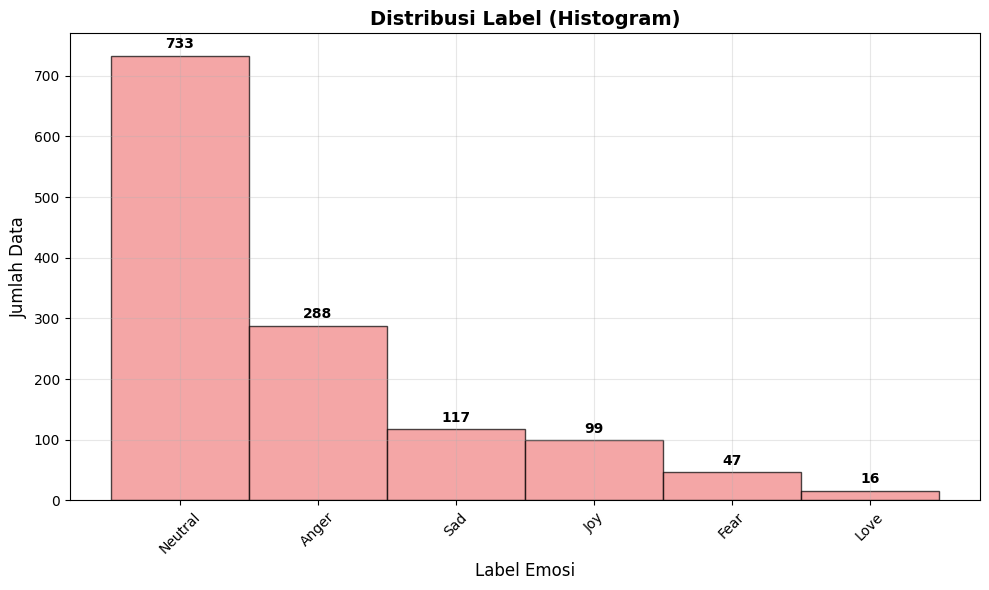

Visualisasi 1: 1_distribusi_label_histogram.png


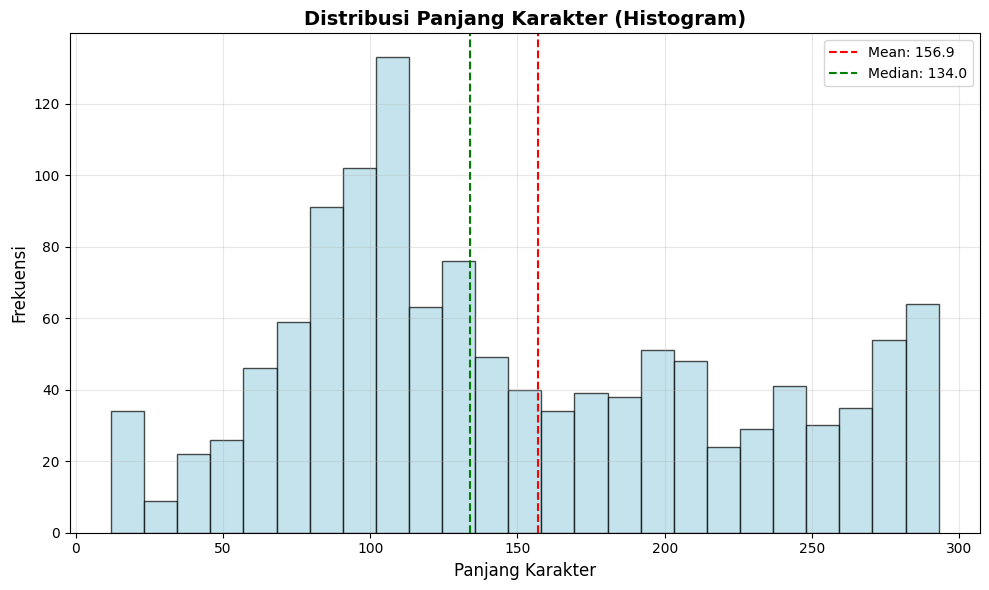

Visualisasi 2: 2_distribusi_panjang_histogram.png


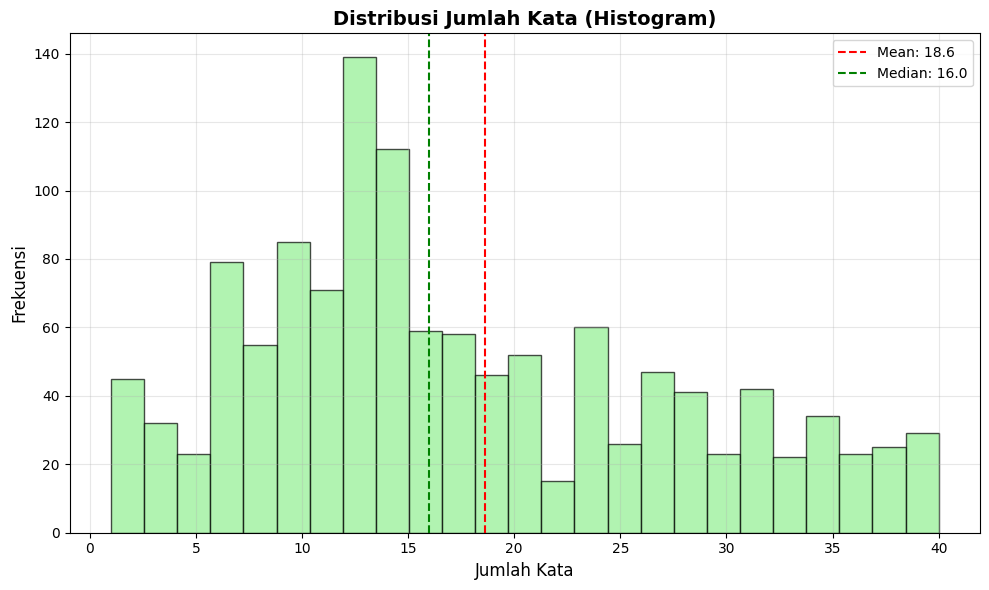

Visualisasi 3: 3_distribusi_kata_histogram.png

 CLEANING DATASET:
 Data awal: 1,300
 Data final: 1,300
 Dihapus: 0

 Validated dataset saved: Dataset_Crawling_Validated.csv
 IndoNLP loaded: (7018, 2) (encoding: utf-8)

 PERBANDINGAN DATASET:
IndoNLP: 7,018 data
Crawling: 1,300 data
Total: 8,318 data
Proportion - IndoNLP: 84.4%, Crawling: 15.6%

 ANALISIS SELESAI!
 Output files:
   - Dataset_Crawling_Validated.csv
   - 1_distribusi_label_histogram.png
   - 2_distribusi_panjang_histogram.png
   - 3_distribusi_kata_histogram.png
 Siap untuk penggabungan dataset


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import warnings
warnings.filterwarnings('ignore')

def load_dataset_safe(file_path, dataset_name):

    # Load dataset dengan error handling yang simpel
    if not os.path.exists(file_path):
        print(f" File tidak ditemukan: {file_path}")
        return None
    
    try:
        # Coba load dengan encoding default
        for encoding in ['utf-8']:
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                print(f" {dataset_name} loaded: {df.shape} (encoding: {encoding})")
                return df
            except UnicodeDecodeError:
                continue
        
        print(f" Gagal load {dataset_name} dengan semua encoding")
        return None
        
    except Exception as e:
        print(f" Error loading {dataset_name}: {str(e)}")
        return None

def validate_dataset_structure(df, dataset_name):
    
    # Validasi struktur dan kualitas dataset
    print(f"{'='*60}")
    print(f"ANALISIS: {dataset_name}")
    print(f"{'='*60}")
    print(f" Shape: {df.shape}")
    print(f" Columns: {list(df.columns)}")
    
    # Cek Kebutuhan Kolom
    required_cols = ['Tweet', 'Label']
    missing_cols = [col for col in required_cols if col not in df.columns]
    
    if missing_cols:
        print(f" Missing columns: {missing_cols}")
        return False
    
    # Cek kualitas data
    missing_tweets = df['Tweet'].isnull().sum()
    missing_labels = df['Label'].isnull().sum()
    empty_labels = df['Label'].astype(str).str.strip().eq('').sum()
    
    print(f" Data Quality:")
    print(f"   Missing tweets: {missing_tweets}")
    print(f"   Missing labels: {missing_labels}")
    print(f"   Empty labels: {empty_labels}")
    
    # Cek label
    expected_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Neutral', 'Sad']
    unique_labels = df['Label'].dropna().unique()
    unexpected = [l for l in unique_labels if l not in expected_labels]
    
    print(f" Labels found: {sorted(unique_labels)}")
    if unexpected:
        print(f" Unexpected labels: {unexpected}")
    else:
        print(f" All labels are valid")
    
    return True

def analyze_label_distribution(df):
    
    # Analisis distribusi label
    print(f"\n DISTRIBUSI LABEL:")
    
    df_clean = df.dropna(subset=['Label'])
    label_counts = df_clean['Label'].value_counts()
    total = len(df_clean)
    
    for label, count in label_counts.items():
        pct = (count / total) * 100
        
        print(f"   {label:10}: {count:6,} ({pct:5.1f}%)")
    
    # Balance check
    if len(label_counts) > 1:
        balance_ratio = label_counts.max() / label_counts.min()
        balance_status = " Tidak seimbang" if balance_ratio > 3 else " Seimbang"
        print(f"\n Balance ratio: {balance_ratio:.1f}:1 {balance_status}")
    
    return label_counts

def analyze_text_stats(df):
    
    # Analisis statistik teks per label
    print(f"\n STATISTIK TEKS:")
    
    df['char_length'] = df['Tweet'].astype(str).str.len()
    df['word_count'] = df['Tweet'].astype(str).str.split().str.len()
    
    # Stats per label
    char_stats = df.groupby('Label')['char_length'].mean().sort_values(ascending=False)
    word_stats = df.groupby('Label')['word_count'].mean().sort_values(ascending=False)
    
    print(f"   Rata-rata panjang karakter:")
    for label, avg_len in char_stats.items():
        print(f"   - {label:10}: {avg_len:6.1f}")
    
    print(f"\n   Rata-rata jumlah kata:")
    for label, avg_words in word_stats.items():
        print(f"   - {label:10}: {avg_words:6.1f}")

def show_sample_data(df):
    
    # Tampilkan sample data per label
    print(f"\n SAMPLE DATA:")
    
    for label in sorted(df['Label'].dropna().unique()):
        print(f"\n {label}:")
        samples = df[df['Label'] == label]['Tweet'].head(2)
        for i, tweet in enumerate(samples, 1):
            preview = str(tweet)[:60] + "..." if len(str(tweet)) > 60 else str(tweet)
            print(f"   {i}. {preview}")

def create_separate_visualizations(df, label_counts):
    
    # Buat visualisasi terpisah (semua histogram)
    print(f"\n MEMBUAT VISUALISASI...")
    
    # Visualisasi 1: Histogram distribusi label
    plt.figure(figsize=(10, 6))
    labels = list(label_counts.index)
    counts = list(label_counts.values)
    
    # Histogram dengan bin edges
    bin_edges = np.arange(len(labels) + 1) - 0.5
    plt.hist(range(len(labels)), bins=bin_edges, weights=counts, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.title('Distribusi Label (Histogram)', fontsize=14, fontweight='bold')
    plt.xlabel('Label Emosi', fontsize=12)
    plt.ylabel('Jumlah Data', fontsize=12)
    plt.xticks(range(len(labels)), labels, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Menambahkan nilai di atas bar
    for i, count in enumerate(counts):
        plt.text(i, count + max(counts)*0.01, str(count), 
                ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('1_distribusi_label_histogram.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Visualisasi 1: 1_distribusi_label_histogram.png")
    
    # Visualisasi 2: Histogram panjang karakter
    plt.figure(figsize=(10, 6))
    char_lengths = df['char_length'].dropna()
    # Filter outliers
    char_filtered = char_lengths[char_lengths <= char_lengths.quantile(0.95)]
    
    plt.hist(char_filtered, bins=25, alpha=0.7, color='lightblue', edgecolor='black')
    plt.title('Distribusi Panjang Karakter (Histogram)', fontsize=14, fontweight='bold')
    plt.xlabel('Panjang Karakter', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.axvline(char_lengths.mean(), color='red', linestyle='--', label=f'Mean: {char_lengths.mean():.1f}')
    plt.axvline(char_lengths.median(), color='green', linestyle='--', label=f'Median: {char_lengths.median():.1f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('2_distribusi_panjang_histogram.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Visualisasi 2: 2_distribusi_panjang_histogram.png")
    
    # Visualisasi 3: Histogram jumlah kata
    plt.figure(figsize=(10, 6))
    word_counts = df['word_count'].dropna()
    # Filter outliers
    word_filtered = word_counts[word_counts <= word_counts.quantile(0.95)]
    
    plt.hist(word_filtered, bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Distribusi Jumlah Kata (Histogram)', fontsize=14, fontweight='bold')
    plt.xlabel('Jumlah Kata', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.axvline(word_counts.mean(), color='red', linestyle='--', label=f'Mean: {word_counts.mean():.1f}')
    plt.axvline(word_counts.median(), color='green', linestyle='--', label=f'Median: {word_counts.median():.1f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('3_distribusi_kata_histogram.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Visualisasi 3: 3_distribusi_kata_histogram.png")

def clean_dataset(df):
    
    # Clean dataset dan return yang sudah bersih
    print(f"\n CLEANING DATASET:")
    initial_count = len(df)
    
    # Menghapus missing values dan teks kosong
    df = df.dropna(subset=['Tweet', 'Label'])
    df = df[df['Label'].astype(str).str.strip() != '']
    df = df[df['Tweet'].astype(str).str.strip() != '']
    
    final_count = len(df)
    removed = initial_count - final_count
    
    print(f" Data awal: {initial_count:,}")
    print(f" Data final: {final_count:,}")
    print(f" Dihapus: {removed:,}")
    
    return df

def compare_datasets(df_crawling, df_indonlp):
    
    # Perbandingan dataset
    print(f"\n PERBANDINGAN DATASET:")
    print(f"IndoNLP: {len(df_indonlp):,} data")
    print(f"Crawling: {len(df_crawling):,} data")
    print(f"Total: {len(df_indonlp) + len(df_crawling):,} data")
    
    total = len(df_indonlp) + len(df_crawling)
    indonlp_pct = len(df_indonlp) / total * 100
    crawling_pct = len(df_crawling) / total * 100
    
    print(f"Proportion - IndoNLP: {indonlp_pct:.1f}%, Crawling: {crawling_pct:.1f}%")

def analyze_manually_labeled_data(file_path):

    # Main function untuk analisis dataset crawling yang sudah dilabeli
    # Load dataset
    df = load_dataset_safe(file_path, "Dataset Crawling Labeled")
    if df is None:
        return None
    
    # Validate structure
    if not validate_dataset_structure(df, "CRAWLING LABELED"):
        return None
    
    # Analyze distribution
    label_counts = analyze_label_distribution(df)
    
    # Analyze text stats
    analyze_text_stats(df)
    
    # Show samples
    show_sample_data(df)
    
    # Create visualizations
    create_separate_visualizations(df, label_counts)
    
    # Clean dataset
    df_clean = clean_dataset(df)
    
    return df_clean

def main():
    
    # Main function untuk Step 8
    print("STEP 8: ANALISIS DATA HASIL PELABELAN MANUAL")
    print("="*60)
    
    # File paths
    crawling_file = 'Dataset_Crawling_Labeled.csv'
    indonlp_file = 'Dataset_IndoNLP_Essential.csv'
    output_file = 'Dataset_Crawling_Validated.csv'
    
    # Analyze labeled crawling data
    df_crawling = analyze_manually_labeled_data(crawling_file)
    
    if df_crawling is not None:
        # Save validated dataset
        df_crawling.to_csv(output_file, index=False, encoding='utf-8')
        print(f"\n Validated dataset saved: {output_file}")
        
        # Load IndoNLP for comparison
        df_indonlp = load_dataset_safe(indonlp_file, "IndoNLP")
        if df_indonlp is not None:
            compare_datasets(df_crawling, df_indonlp)
        
        print(f"\n{'='*60}")
        print(" ANALISIS SELESAI!")
        print(f"{'='*60}")
        print(f" Output files:")
        print(f"   - {output_file}")
        print(f"   - 1_distribusi_label_histogram.png")
        print(f"   - 2_distribusi_panjang_histogram.png")
        print(f"   - 3_distribusi_kata_histogram.png")
        print(f" Siap untuk penggabungan dataset")
        
    else:
        print(f"\n{'='*60}")
        print("DATASET CRAWLING BELUM DILABELI!")
        print(f"{'='*60}")
        print("Langkah yang perlu dilakukan:")
        print("   1. Buka Dataset_Crawling_Essential.csv")
        print("   2. Tambah kolom 'Label' dengan kategori:")
        print("      Anger, Fear, Joy, Love, Neutral, Sad")
        print("   3. Simpan sebagai Dataset_Crawling_Labeled.csv")
        print("   4. Jalankan kembali step ini")
        
        # Check if essential file exists
        if os.path.exists('Dataset_Crawling_Essential.csv'):
            print(f"\n Dataset_Crawling_Essential.csv ditemukan")
            print("File siap untuk pelabelan manual")
        else:
            print(f"\n Dataset_Crawling_Essential.csv tidak ditemukan")
            print("Jalankan step crawling data terlebih dahulu")

# ============================================
# JALANKAN PROGRAM
# ============================================
if __name__ == "__main__":
    main()

# STEP 9: PREPROCESSING DATA

In [8]:
import pandas as pd
import numpy as np
import re
import os
import subprocess
import sys

# Install dan import Sastrawi
try:
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
    print("Sastrawi sudah terinstall")
except ImportError:
    print("Installing Sastrawi...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "Sastrawi"])
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
    print("Sastrawi berhasil diinstall")

import warnings
warnings.filterwarnings('ignore')

def load_normalization_dict(file_path='key_norm.csv'):
    
    # Load dictionary normalisasi jika tersedia
    if not os.path.exists(file_path):
        print(f" File normalisasi tidak ditemukan: {file_path}")
        return {}
    
    try:
        norm_df = pd.read_csv(file_path)
        if 'singkat' in norm_df.columns and 'hasil' in norm_df.columns:
            norm_dict = dict(zip(norm_df['singkat'].str.lower(), norm_df['hasil'].str.lower()))
            print(f" Dictionary normalisasi loaded: {len(norm_dict)} kata")
            return norm_dict
        else:
            print(f" Format file normalisasi tidak sesuai")
            return {}
    except Exception as e:
        print(f" Error loading normalization: {e}")
        return {}

def combine_datasets(indonlp_path, crawling_path):
    
    # Gabungkan dataset IndoNLP dan Crawling
    print(f"{'='*60}")
    print("MENGGABUNGKAN DATASET")
    print(f"{'='*60}")
    
    try:
        # Load IndoNLP
        df_indonlp = pd.read_csv(indonlp_path)
        print(f" IndoNLP loaded: {df_indonlp.shape}")
        
        # Validate columns
        if not all(col in df_indonlp.columns for col in ['Tweet', 'Label']):
            print(f" Kolom tidak lengkap di IndoNLP")
            return None
        
        # Try load Crawling
        if os.path.exists(crawling_path):
            try:
                df_crawling = pd.read_csv(crawling_path)
                if all(col in df_crawling.columns for col in ['Tweet', 'Label']):
                    df_combined = pd.concat([df_indonlp, df_crawling], ignore_index=True)
                    print(f" Crawling loaded: {df_crawling.shape}")
                    print(f" Combined: {df_combined.shape} (IndoNLP: {len(df_indonlp)}, Crawling: {len(df_crawling)})")
                else:
                    print(f" Crawling data format issues, using IndoNLP only")
                    df_combined = df_indonlp.copy()
            except Exception as e:
                print(f" Error loading crawling: {e}, using IndoNLP only")
                df_combined = df_indonlp.copy()
        else:
            print(f" Crawling file not found, using IndoNLP only")
            df_combined = df_indonlp.copy()
        
        # Show label distribution
        print(f" Label distribution:")
        for label, count in df_combined['Label'].value_counts().items():
            print(f"   {label}: {count:,}")
        
        return df_combined
        
    except Exception as e:
        print(f" Error combining datasets: {e}")
        return None

def clean_text(text, norm_dict):
    
    # Membersihkan teks dengan preprocessing lengkap
    if pd.isna(text) or text == '':
        return ''
    
    # Basic cleaning
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # mentions & hashtags
    text = re.sub(r'\S+@\S+', '', text)  # emails
    text = re.sub(r'\d+', '', text)  # numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # special chars
    text = re.sub(r'\s+', ' ', text).strip()  # extra spaces
    
    if not text.strip():
        return ''
    
    # Normalization
    if norm_dict:
        words = text.split()
        normalized_words = [norm_dict.get(word, word) for word in words]
        text = ' '.join(normalized_words)
    
    # Stopword removal
    try:
        stopword_factory = StopWordRemoverFactory()
        stopword_remover = stopword_factory.create_stop_word_remover()
        text = stopword_remover.remove(text)
    except:
        pass
    
    # Stemming
    try:
        stemmer_factory = StemmerFactory()
        stemmer = stemmer_factory.create_stemmer()
        text = stemmer.stem(text)
    except:
        pass
    
    # Remove short words
    words = [word for word in text.split() if len(word) >= 3]
    
    return ' '.join(words)

def preprocess_dataset(df, norm_dict_path='key_norm.csv'):
    
    # Preprocessing lengkap pada dataset
    print(f"{'='*60}")
    print(" PREPROCESSING TEXT DATA")
    print(f"{'='*60}")
    
    if df is None or df.empty or 'Tweet' not in df.columns:
        print(" Dataset invalid!")
        return None
    
    # Load normalization dict
    norm_dict = load_normalization_dict(norm_dict_path)
    
    print(f" Processing {len(df):,} tweets...")
    
    # Show before samples
    print(f"\n SEBELUM preprocessing:")
    for i in range(min(2, len(df))):
        original = str(df.iloc[i]['Tweet'])
        label = df.iloc[i]['Label']
        print(f"   [{label}] {original[:60]}...")
    
    # Preprocessing
    original_mean_len = df['Tweet'].str.len().mean()
    df['Tweet'] = df['Tweet'].apply(lambda x: clean_text(x, norm_dict))
    
    # Remove empty tweets after cleaning
    empty_count = df['Tweet'].str.strip().eq('').sum()
    if empty_count > 0:
        print(f" Removing {empty_count} empty tweets after cleaning")
        df = df[df['Tweet'].str.strip() != ''].reset_index(drop=True)
    
    # Show after samples
    cleaned_mean_len = df['Tweet'].str.len().mean()
    reduction = (1 - cleaned_mean_len/original_mean_len) * 100
    
    print(f"\n SESUDAH preprocessing:")
    for i in range(min(2, len(df))):
        cleaned = df.iloc[i]['Tweet']
        label = df.iloc[i]['Label']
        print(f"   [{label}] {cleaned[:60]}...")
    
    print(f"\n Stats:")
    print(f"   Final data: {len(df):,}")
    print(f"   Avg length reduction: {reduction:.1f}%")
    print(f"   Avg words: {df['Tweet'].str.split().str.len().mean():.1f}")
    
    return df

def save_preprocessed_data(df, output_path='Dataset_Preprocessed.csv'):
    
    # Simpan dataset yang sudah diproses
    if df is None or df.empty:
        print(" Dataset kosong!")
        return
    
    try:
        print(f"\n{'='*60}")
        print(" MENYIMPAN DATASET")
        print(f"{'='*60}")
        
        df.to_csv(output_path, index=False, encoding='utf-8')
        file_size = os.path.getsize(output_path) / 1024 / 1024  # MB
        
        print(f" Dataset saved: {output_path}")
        print(f" Shape: {df.shape}")
        print(f" Size: {file_size:.2f} MB")
        
        # Final distribution
        print(f" Final distribution:")
        for label, count in df['Label'].value_counts().items():
            print(f"   {label}: {count:,}")
        
        # Final samples
        print(f"\n Final samples:")
        for i in range(min(2, len(df))):
            tweet = df.iloc[i]['Tweet']
            label = df.iloc[i]['Label']
            print(f"   [{label}] {tweet[:50]}...")
        
    except Exception as e:
        print(f" Error saving: {e}")

def main():
    #Main preprocessing pipeline
    print("PREPROCESSING PIPELINE")
    print("="*60)
    
    # 1. Combine datasets
    df_combined = combine_datasets(
        'Dataset_IndoNLP_Essential.csv', 
        'Dataset_Crawling_Labeled.csv'
    )
    
    if df_combined is None:
        print("Gagal load dataset!")
        return None
    
    # 2. Preprocess
    df_processed = preprocess_dataset(df_combined, 'key_norm.csv')
    
    if df_processed is None:
        print("Gagal preprocessing!")
        return None
    
    # 3. Save
    save_preprocessed_data(df_processed, 'Dataset_Preprocessed.csv')
    
    print(f"\n{'='*60}")
    print("PREPROCESSING SELESAI!")
    print(f"{'='*60}")
    print(f" Output: Dataset_Preprocessed.csv")
    print(f" Siap untuk feature extraction dan modeling")
    
    return df_processed

# ============================================
# JALANKAN PIPELINE
# ============================================
if __name__ == "__main__":
    df_final = main()

Sastrawi sudah terinstall
PREPROCESSING PIPELINE
MENGGABUNGKAN DATASET
 IndoNLP loaded: (7018, 2)
 Crawling loaded: (1300, 2)
 Combined: (8318, 2) (IndoNLP: 7018, Crawling: 1300)
 Label distribution:
   Neutral: 2,719
   Anger: 1,411
   Joy: 1,357
   Sad: 1,108
   Fear: 953
   Love: 770
 PREPROCESSING TEXT DATA
 Dictionary normalisasi loaded: 3720 kata
 Processing 8,318 tweets...

 SEBELUM preprocessing:
   [Anger] pagi2 udah di buat emosi :)...
   [Anger] kok stabilitas negara, memange 10 thn negara tdk aman, bahka...
 Removing 87 empty tweets after cleaning

 SESUDAH preprocessing:
   [Anger] pagi buat emosi...
   [Anger] kok stabilitas negara memange tahun negara aman bahkan sby s...

 Stats:
   Final data: 8,231
   Avg length reduction: 28.7%
   Avg words: 12.7

 MENYIMPAN DATASET
 Dataset saved: Dataset_Preprocessed.csv
 Shape: (8231, 2)
 Size: 0.67 MB
 Final distribution:
   Neutral: 2,654
   Anger: 1,389
   Joy: 1,357
   Sad: 1,108
   Fear: 953
   Love: 770

 Final samples:
   [

# STEP 10: CEK KATA MENGGUNAKAN WORDCLOUD

ANALISIS WORDCLOUD
 Data loaded: 8231 samples
 Distribusi: {'Neutral': 2654, 'Anger': 1389, 'Joy': 1357, 'Sad': 1108, 'Fear': 953, 'Love': 770}
 Total: 8,231 tweets
  Emosi: ['Anger', 'Fear', 'Joy', 'Love', 'Neutral', 'Sad']

 Membuat WordCloud...


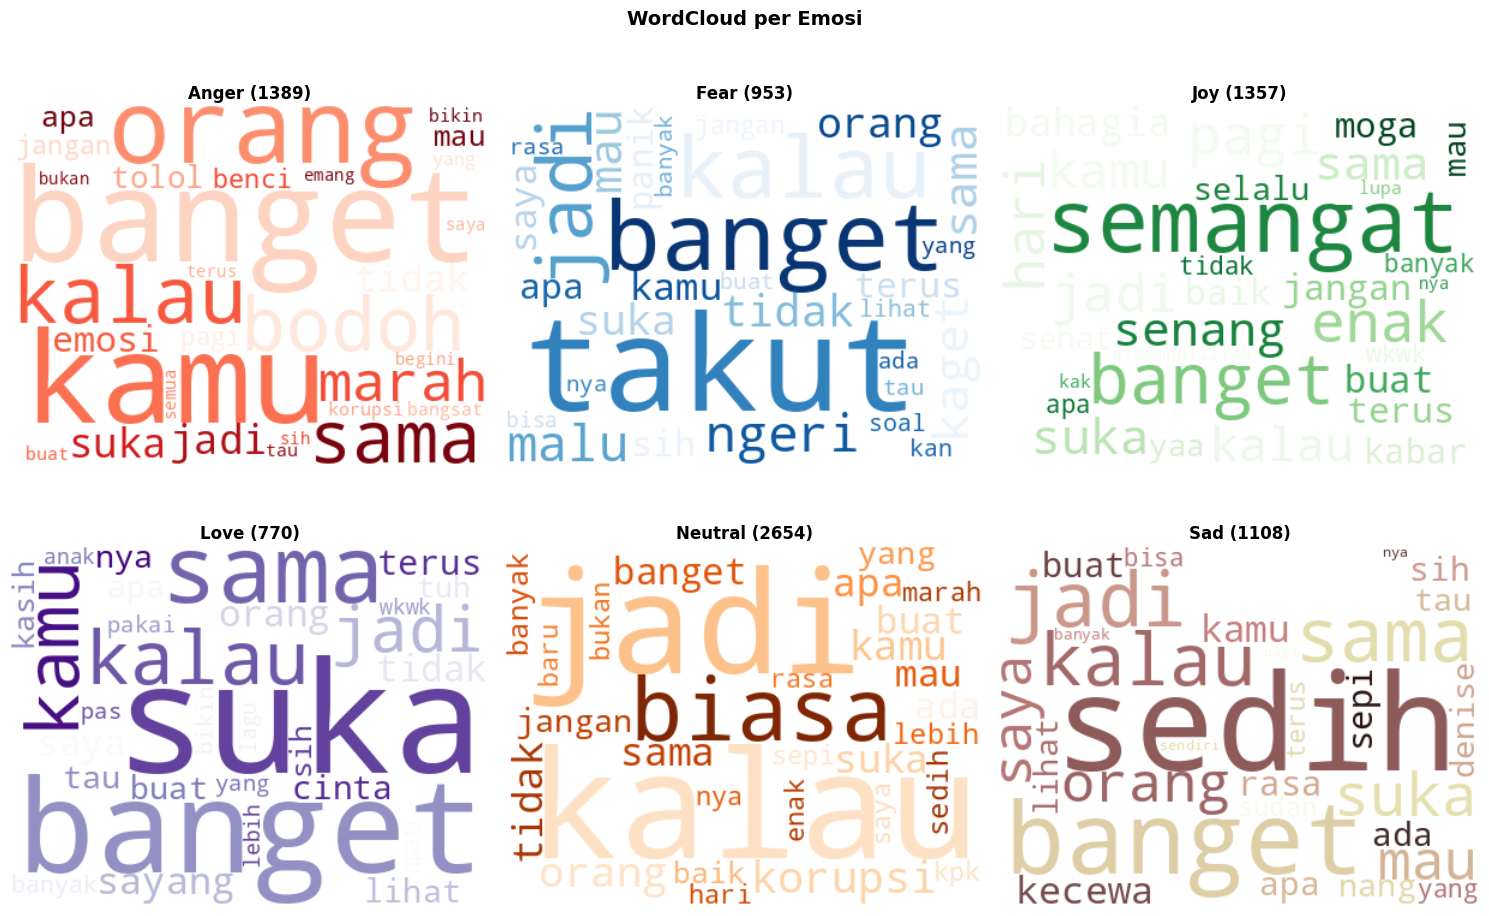


 Analisis top words...


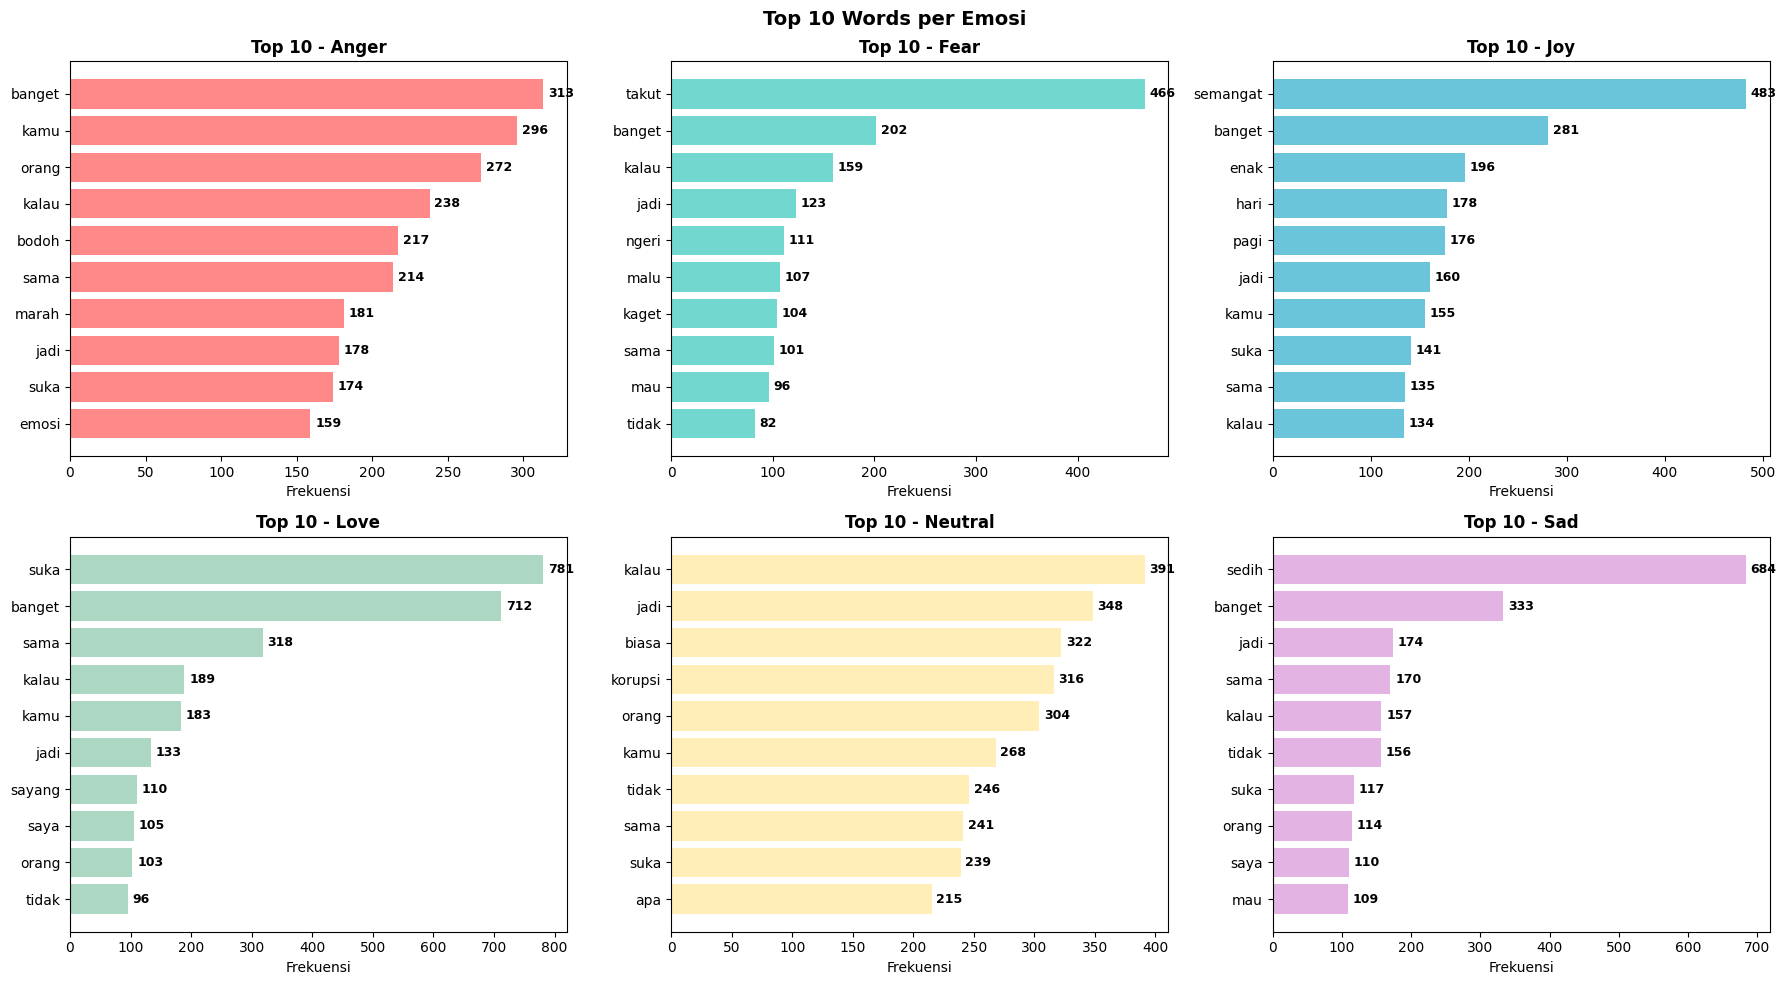


 Selesai! File output:
   - wordcloud_per_emosi.png
   - top_words_per_emosi.png
   - wordcloud_analysis.json

 SUMMARY ANALYSIS:
  Total samples analyzed: 8,231
  Number of emotions: 6
  Distribution:
      Neutral: 2,654 samples (32.2%)
      Anger: 1,389 samples (16.9%)
      Joy: 1,357 samples (16.5%)
      Sad: 1,108 samples (13.5%)
      Fear: 953 samples (11.6%)
      Love: 770 samples (9.4%)


In [9]:
# WordCloud Analysis untuk Dataset Emosi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Install wordcloud jika diperlukan
try:
    from wordcloud import WordCloud
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wordcloud"])
    from wordcloud import WordCloud

def load_data():
    # Load dan validasi dataset preprocessed
    try:
        df = pd.read_csv('Dataset_Preprocessed.csv')
        df = df.dropna(subset=['Tweet', 'Label'])
        df = df[df['Tweet'].str.strip() != '']
        print(f" Data loaded: {len(df)} samples")
        print(f" Distribusi: {dict(df['Label'].value_counts())}")
        return df
    except FileNotFoundError:
        print(" File Dataset_Preprocessed.csv tidak ditemukan!")
        return None

def create_wordcloud_per_emotion(df):
    # Buat WordCloud untuk setiap emosi
    emotions = sorted(df['Label'].unique())
    colors = ['Reds', 'Blues', 'Greens', 'Purples', 'Oranges', 'pink']
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, emotion in enumerate(emotions[:6]):  # Max 6 emosi
        emotion_texts = df[df['Label'] == emotion]['Tweet']
        combined_text = ' '.join(emotion_texts.astype(str))
        
        if len(combined_text.strip()) > 0:
            wordcloud = WordCloud(
                width=400, height=300, background_color='white',
                colormap=colors[i], max_words=30, collocations=False
            ).generate(combined_text)
            
            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].set_title(f'{emotion} ({len(emotion_texts)})', fontweight='bold')
        else:
            axes[i].text(0.5, 0.5, f'No Data\n{emotion}', ha='center', va='center')
            axes[i].set_title(f'{emotion} (0)', fontweight='bold')
        
        axes[i].axis('off')
    
    # Hapus subplot kosong
    for i in range(len(emotions), 6):
        fig.delaxes(axes[i])
    
    plt.suptitle('WordCloud per Emosi', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('wordcloud_per_emosi.png', dpi=300, bbox_inches='tight')
    plt.show()

def analyze_top_words(df, top_n=10):
    # nalisis dan visualisasi top words per emosi
    emotions = sorted(df['Label'].unique())
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
    
    word_analysis = {}
    
    for i, emotion in enumerate(emotions[:6]):
        # Gabungkan teks dan hitung frekuensi kata
        emotion_texts = df[df['Label'] == emotion]['Tweet']
        all_words = []
        for text in emotion_texts:
            words = str(text).split()
            valid_words = [w for w in words if len(w) >= 2 and not w.isdigit()]
            all_words.extend(valid_words)
        
        if all_words:
            word_freq = Counter(all_words).most_common(top_n)
            # PERBAIKAN: Konversi ke format yang bisa di-serialize JSON
            word_analysis[emotion] = [(word, int(count)) for word, count in word_freq]
            
            # Visualisasi
            words, freqs = zip(*word_freq)
            y_pos = range(len(words))
            axes[i].barh(y_pos, freqs, color=colors[i], alpha=0.8)
            axes[i].set_yticks(y_pos)
            axes[i].set_yticklabels(words)
            axes[i].set_title(f'Top {len(words)} - {emotion}', fontweight='bold')
            axes[i].invert_yaxis()
            
            # Tampilkan frekuensi
            for j, freq in enumerate(freqs):
                axes[i].text(freq + max(freqs)*0.01, j, str(freq), 
                           va='center', fontweight='bold', fontsize=9)
        else:
            axes[i].text(0.5, 0.5, f'No words\n{emotion}', ha='center', va='center')
            axes[i].set_title(f'{emotion}', fontweight='bold')
            word_analysis[emotion] = []
        
        axes[i].set_xlabel('Frekuensi')
    
    # Hapus subplot kosong
    for i in range(len(emotions), 6):
        fig.delaxes(axes[i])
    
    plt.suptitle(f'Top {top_n} Words per Emosi', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('top_words_per_emosi.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return word_analysis

def convert_to_json_serializable(obj):
    # Konversi pandas types ke Python native types untuk JSON serialization
    if isinstance(obj, dict):
        return {str(key): convert_to_json_serializable(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_to_json_serializable(item) for item in obj]
    elif isinstance(obj, tuple):
        return tuple(convert_to_json_serializable(item) for item in obj)
    elif isinstance(obj, (pd.Series, pd.Index)):
        return convert_to_json_serializable(obj.tolist())
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif pd.isna(obj):
        return None
    else:
        return obj

def main():
    # Main function
    print("ANALISIS WORDCLOUD")
    print("="*40)
    
    # Load data
    df = load_data()
    if df is None or len(df) == 0:
        print("Tidak dapat melanjutkan")
        return
    
    # Analisis dasar
    print(f" Total: {len(df):,} tweets")
    print(f"  Emosi: {list(df['Label'].unique())}")
    
    # Buat WordCloud
    print("\n Membuat WordCloud...")
    create_wordcloud_per_emotion(df)
    
    # Analisis top words
    print("\n Analisis top words...")
    word_analysis = analyze_top_words(df)
    
    # Konversi semua data ke format yang kompatibel dengan JSON
    try:
        # Konversi value_counts() ke dict dengan int values
        distribution = df['Label'].value_counts().to_dict()
        distribution = {str(key): int(value) for key, value in distribution.items()}
        
        # Konversi emotions list
        emotions = [str(emotion) for emotion in df['Label'].unique()]
        
        # Prepare data untuk JSON
        analysis_data = {
            'total_samples': int(len(df)),
            'emotions': emotions,
            'distribution': distribution,
            'top_words': convert_to_json_serializable(word_analysis)
        }
        
        # Simpan hasil
        import json
        with open('wordcloud_analysis.json', 'w', encoding='utf-8') as f:
            json.dump(analysis_data, f, ensure_ascii=False, indent=2)
        
        print(f"\n Selesai! File output:")
        print(f"   - wordcloud_per_emosi.png")
        print(f"   - top_words_per_emosi.png")
        print(f"   - wordcloud_analysis.json")
        
        # TAMBAHAN: Print summary analysis
        print(f"\n SUMMARY ANALYSIS:")
        print(f"  Total samples analyzed: {len(df):,}")
        print(f"  Number of emotions: {len(emotions)}")
        print(f"  Distribution:")
        for emotion, count in distribution.items():
            percentage = (count / len(df)) * 100
            print(f"      {emotion}: {count:,} samples ({percentage:.1f}%)")
        
    except Exception as e:
        print(f" Error saving JSON: {str(e)}")
        print("Data berhasil dianalisis, tapi gagal menyimpan JSON file")

if __name__ == "__main__":
    main()

# STEP 11: CEK LABELING DATA

CEK KUALITAS LABELING
 Data loaded: 8231 samples dari Dataset_Preprocessed.csv

ANALISIS KUALITAS LABELING
DISTRIBUSI LABEL:
Anger   : 1389 ( 16.9%)
Fear    :  953 ( 11.6%)
Joy     : 1357 ( 16.5%)
Love    :  770 (  9.4%)
Neutral : 2654 ( 32.2%)
Sad     : 1108 ( 13.5%)
Total   : 8231 (100.0%)

  KESEIMBANGAN DATASET:
Label terbanyak: Neutral (2654)
Label tersedikit: Love (770)
Rasio: 3.45:1
  Dataset tidak seimbang

 STATISTIK TEKS:
Rata-rata karakter: 77.5
Rata-rata kata: 12.7
Range kata: 1-276

  EDGE CASES:
Terpendek: 1 kata - Anger
Terpanjang: 276 kata - Sad

 Membuat visualisasi terpisah...
 Membuat pie chart distribusi label...


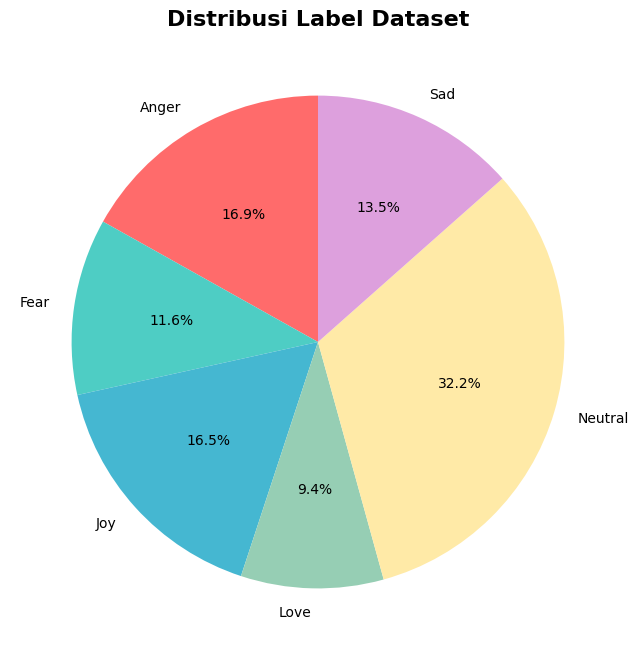

Membuat bar chart jumlah data...


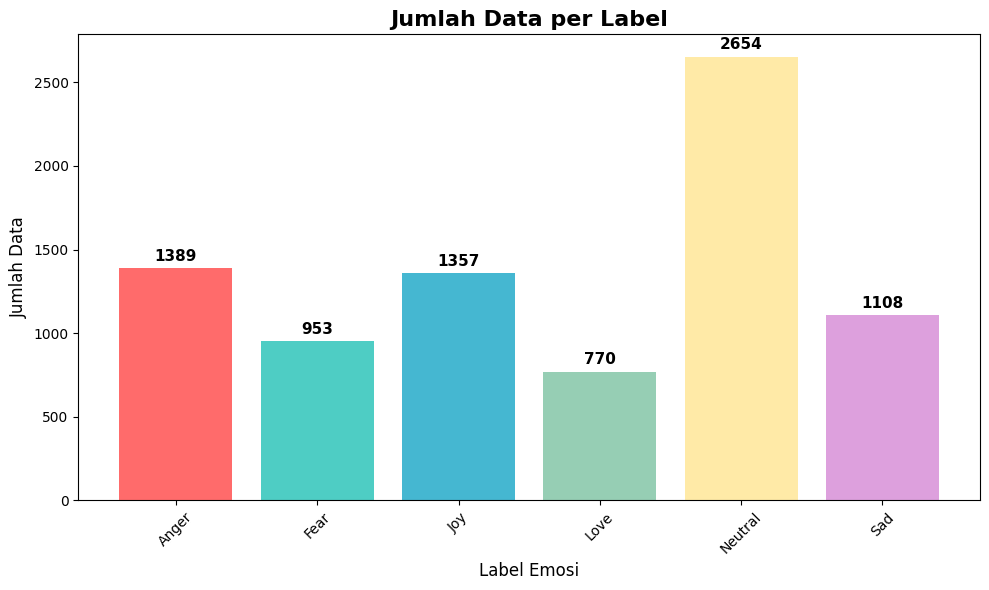

Membuat box plot panjang kata...


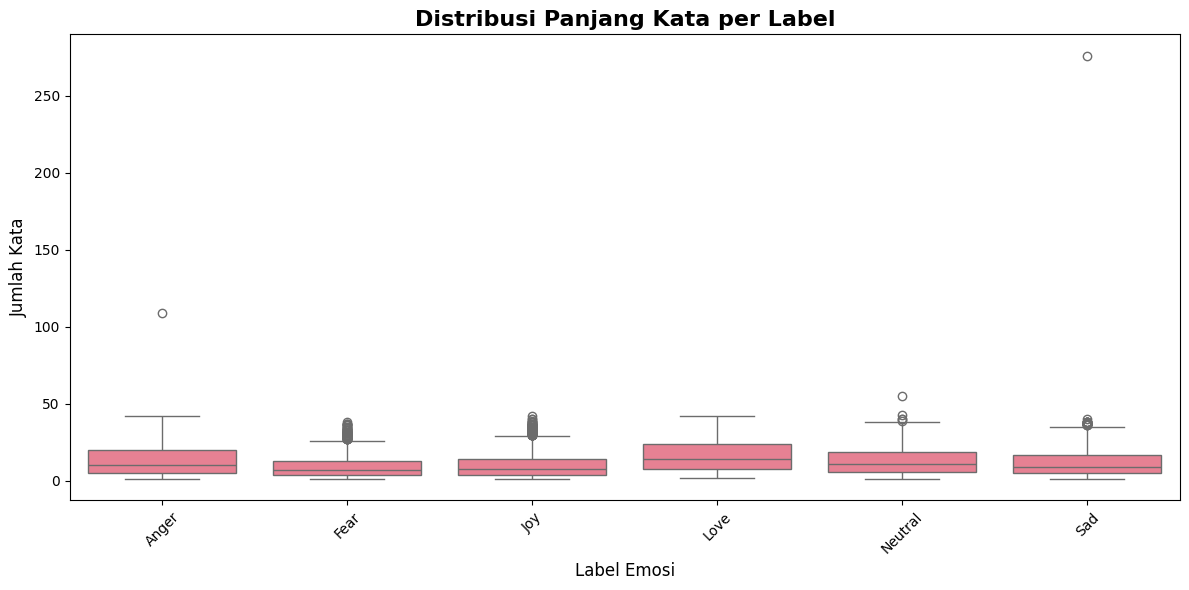

Membuat histogram panjang tweet...


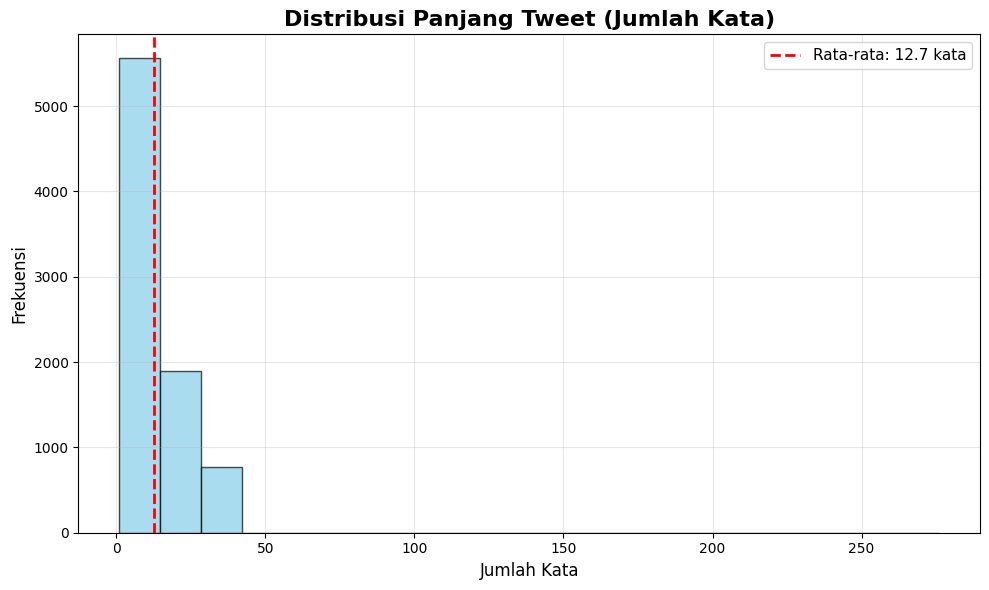

Semua visualisasi berhasil disimpan!

 CEK LABELING SELESAI!
 Ringkasan:
   - Total data: 8,231
   - Jumlah label: 6
   - Rasio ketidakseimbangan: 3.45:1

 File output visualisasi:
   - distribusi_label_pie_chart.png
   - distribusi_label_bar_chart.png
   - distribusi_panjang_kata_boxplot.png
   - distribusi_panjang_tweet_histogram.png

 File output lainnya:
   - labeling_quality_report.json
   - Dataset_Final_Validated.csv


In [10]:
# CEK KUALITAS LABELING DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import warnings
warnings.filterwarnings('ignore')

def load_data():
    # Load dataset preprocessed
    file_options = ['Dataset_Preprocessed.csv', 'Dataset_Final_Preprocessed.csv']
    
    for file_path in file_options:
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df = df.dropna(subset=['Tweet', 'Label'])
            df = df[df['Tweet'].str.strip() != '']
            print(f" Data loaded: {len(df)} samples dari {file_path}")
            return df
    
    print(f" File tidak ditemukan: {file_options}")
    return None

def analyze_labeling_quality(df):
    # Analisis kualitas labeling
    print(f"\n{'='*50}")
    print("ANALISIS KUALITAS LABELING")
    print(f"{'='*50}")
    
    # 1. Distribusi label
    label_counts = df['Label'].value_counts().sort_index()
    total = len(df)
    
    print("DISTRIBUSI LABEL:")
    for label, count in label_counts.items():
        percentage = (count / total) * 100
        print(f"{label:8}: {count:4} ({percentage:5.1f}%)")
    print(f"{'Total':8}: {total:4} (100.0%)")
    
    # 2. Analisis keseimbangan
    min_count = label_counts.min()
    max_count = label_counts.max()
    imbalance_ratio = max_count / min_count
    
    print(f"\n  KESEIMBANGAN DATASET:")
    print(f"Label terbanyak: {label_counts.idxmax()} ({max_count})")
    print(f"Label tersedikit: {label_counts.idxmin()} ({min_count})")
    print(f"Rasio: {imbalance_ratio:.2f}:1")
    
    if imbalance_ratio <= 3:
        print(" Dataset cukup seimbang")
    else:
        print("  Dataset tidak seimbang")
    
    # 3. Statistik teks
    df['char_length'] = df['Tweet'].str.len()
    df['word_count'] = df['Tweet'].str.split().str.len()
    
    print(f"\n STATISTIK TEKS:")
    print(f"Rata-rata karakter: {df['char_length'].mean():.1f}")
    print(f"Rata-rata kata: {df['word_count'].mean():.1f}")
    print(f"Range kata: {df['word_count'].min()}-{df['word_count'].max()}")
    
    # 4. Edge cases
    shortest_idx = df['word_count'].idxmin()
    longest_idx = df['word_count'].idxmax()
    
    print(f"\n  EDGE CASES:")
    print(f"Terpendek: {df.loc[shortest_idx, 'word_count']} kata - {df.loc[shortest_idx, 'Label']}")
    print(f"Terpanjang: {df.loc[longest_idx, 'word_count']} kata - {df.loc[longest_idx, 'Label']}")
    
    return label_counts

def create_visualizations(df, label_counts):
    # Buat visualisasi kualitas labeling (terpisah 1 per 1)
    print(f"\n Membuat visualisasi terpisah...")
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
    
    # 1. Pie chart distribusi label
    print(" Membuat pie chart distribusi label...")
    plt.figure(figsize=(8, 8))
    plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Distribusi Label Dataset', fontsize=16, fontweight='bold')
    plt.savefig('distribusi_label_pie_chart.png', dpi=300, bbox_inches='tight')
    plt.show()  # Tampilkan gambar
    plt.close()
    
    # 2. Bar chart jumlah data per label
    print("Membuat bar chart jumlah data...")
    plt.figure(figsize=(10, 6))
    bars = plt.bar(label_counts.index, label_counts.values, color=colors)
    plt.title('Jumlah Data per Label', fontsize=16, fontweight='bold')
    plt.xlabel('Label Emosi', fontsize=12)
    plt.ylabel('Jumlah Data', fontsize=12)
    plt.xticks(rotation=45)
    
    # Tambah nilai di atas bar
    for bar, count in zip(bars, label_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(label_counts.values)*0.01,
                str(count), ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.savefig('distribusi_label_bar_chart.png', dpi=300, bbox_inches='tight')
    plt.show()  # Tampilkan gambar
    plt.close()
    
    # 3. Box plot distribusi panjang kata per label
    print("Membuat box plot panjang kata...")
    plt.figure(figsize=(12, 6))
    try:
        sns.boxplot(data=df, x='Label', y='word_count')
        plt.title('Distribusi Panjang Kata per Label', fontsize=16, fontweight='bold')
        plt.xlabel('Label Emosi', fontsize=12)
        plt.ylabel('Jumlah Kata', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('distribusi_panjang_kata_boxplot.png', dpi=300, bbox_inches='tight')
        plt.show()  # Tampilkan gambar
        plt.close()
    except Exception as e:
        print(f" Error membuat boxplot: {str(e)}")
        # Buat plot sederhana sebagai fallback
        plt.figure(figsize=(12, 6))
        for i, label in enumerate(label_counts.index):
            data = df[df['Label'] == label]['word_count']
            plt.scatter([i] * len(data), data, alpha=0.6, color=colors[i % len(colors)], label=label)
        plt.xlabel('Label Emosi')
        plt.ylabel('Jumlah Kata')
        plt.title('Distribusi Panjang Kata per Label (Scatter)')
        plt.xticks(range(len(label_counts.index)), label_counts.index, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.savefig('distribusi_panjang_kata_scatter.png', dpi=300, bbox_inches='tight')
        plt.show()  # Tampilkan gambar
        plt.close()
    
    # 4. Histogram distribusi panjang tweet
    print("Membuat histogram panjang tweet...")
    plt.figure(figsize=(10, 6))
    plt.hist(df['word_count'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribusi Panjang Tweet (Jumlah Kata)', fontsize=16, fontweight='bold')
    plt.xlabel('Jumlah Kata', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Rata-rata: {df["word_count"].mean():.1f} kata')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('distribusi_panjang_tweet_histogram.png', dpi=300, bbox_inches='tight')
    plt.show()  # Tampilkan gambar
    plt.close()
    
    print("Semua visualisasi berhasil disimpan!")

def generate_report(df, label_counts):
    # Generate laporan kualitas
    report = {
        'dataset_summary': {
            'total_samples': len(df),
            'total_labels': len(label_counts),
            'label_distribution': label_counts.to_dict()
        },
        'balance_analysis': {
            'min_count': int(label_counts.min()),
            'max_count': int(label_counts.max()),
            'imbalance_ratio': float(label_counts.max() / label_counts.min()),
            'balance_status': 'balanced' if label_counts.max() / label_counts.min() <= 3 else 'imbalanced'
        },
        'text_statistics': {
            'avg_char_length': float(df['char_length'].mean()),
            'avg_word_count': float(df['word_count'].mean()),
            'min_word_count': int(df['word_count'].min()),
            'max_word_count': int(df['word_count'].max())
        }
    }
    
    # Simpan laporan
    with open('labeling_quality_report.json', 'w', encoding='utf-8') as f:
        json.dump(report, f, ensure_ascii=False, indent=2)
    
    return report

def main():
    # Main function
    print("CEK KUALITAS LABELING")
    print("="*40)
    
    # Load data
    df = load_data()
    if df is None or len(df) == 0:
        print(" Tidak dapat melanjutkan")
        return
    
    # Analisis kualitas labeling
    label_counts = analyze_labeling_quality(df)
    
    # Buat visualisasi
    create_visualizations(df, label_counts)
    
    # Generate laporan
    report = generate_report(df, label_counts)
    
    # Simpan dataset final
    df.to_csv('Dataset_Final_Validated.csv', index=False)
    
    print(f"\n CEK LABELING SELESAI!")
    print(f" Ringkasan:")
    print(f"   - Total data: {len(df):,}")
    print(f"   - Jumlah label: {len(label_counts)}")
    print(f"   - Rasio ketidakseimbangan: {report['balance_analysis']['imbalance_ratio']:.2f}:1")
    print(f"\n File output visualisasi:")
    print(f"   - distribusi_label_pie_chart.png")
    print(f"   - distribusi_label_bar_chart.png") 
    print(f"   - distribusi_panjang_kata_boxplot.png")
    print(f"   - distribusi_panjang_tweet_histogram.png")
    print(f"\n File output lainnya:")
    print(f"   - labeling_quality_report.json")
    print(f"   - Dataset_Final_Validated.csv")

if __name__ == "__main__":
    main()

# STEP 12: PEMBAGIAN DATA (80:20) DAN PELATIHAN WORD2VEC

Gensim sudah tersedia
 MEMULAI PEMBAGIAN DATA DAN WORD2VEC TRAINING
 Dataset berhasil dimuat dari: Dataset_Preprocessed.csv
 Shape: (8231, 2)
 Kolom: ['Tweet', 'Label']
 Data valid: 8231 dari 8231

ENCODING LABELS
Label mapping:
   0: Anger (1389 samples)
   1: Fear (953 samples)
   2: Joy (1357 samples)
   3: Love (770 samples)
   4: Neutral (2654 samples)
   5: Sad (1108 samples)

PEMBAGIAN DATA (80:20)
 Total data: 8,231
 Test size: 20.0%
 Random state: 42

 Hasil pembagian:
 Training data: 6,584 samples (80.0%)
 Testing data: 1,647 samples (20.0%)

 ANALISIS DISTRIBUSI SPLIT:
--------------------------------------------------
🔹 Distribusi Training Set:
   Anger   : 1111 ( 16.9%)
   Fear    :  762 ( 11.6%)
   Joy     : 1086 ( 16.5%)
   Love    :  616 (  9.4%)
   Neutral : 2123 ( 32.2%)
   Sad     :  886 ( 13.5%)

🔹 Distribusi Testing Set:
   Anger   :  278 ( 16.9%)
   Fear    :  191 ( 11.6%)
   Joy     :  271 ( 16.5%)
   Love    :  154 (  9.4%)
   Neutral :  531 ( 32.2%)
   Sad     

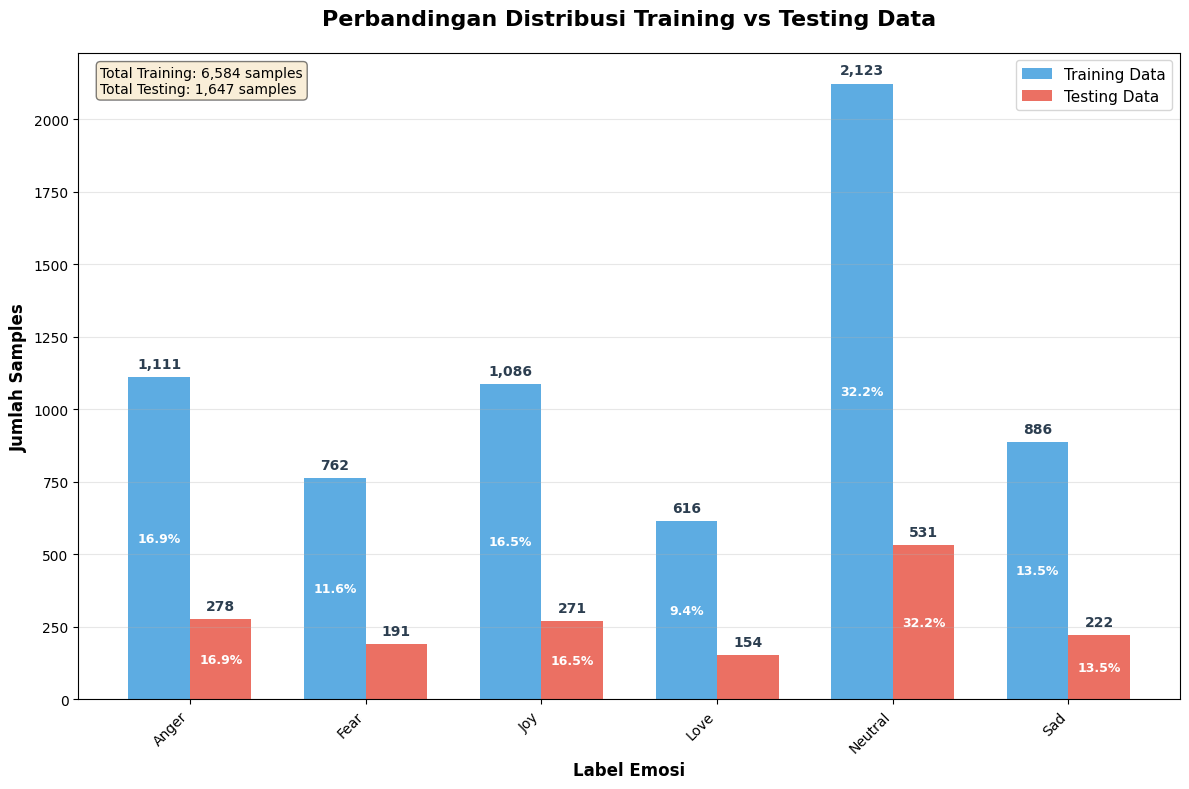

 Visualisasi disimpan: train_vs_test_comparison.png

PEMBAGIAN DATA DAN WORD2VEC SELESAI!
 Ringkasan:
   - Training samples: 6,584
   - Testing samples: 1,647
   - Vocabulary size: 5,264
   - Vector dimension: 100
   - Word2Vec coverage: 100.0%

 File output:
   - word2vec_model.bin
   - train_data.csv
   - test_data.csv
   - label_encoder.pkl
   - data_metadata.json
   - train_vs_test_comparison.png

 Data siap untuk feature extraction dan model training!


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Install dan import gensim untuk Word2Vec
try:
    from gensim.models import Word2Vec
    print("Gensim sudah tersedia")
except ImportError:
    import subprocess
    import sys
    print("Installing gensim...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gensim"])
    from gensim.models import Word2Vec
    print("Gensim berhasil diinstall")

def load_validated_data():
    
    #Load dataset yang sudah divalidasi
    # Coba beberapa nama file yang mungkin ada
    file_options = [
        'Dataset_Preprocessed.csv',
    ]
    
    for file_path in file_options:
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                print(f" Dataset berhasil dimuat dari: {file_path}")
                print(f" Shape: {df.shape}")
                print(f" Kolom: {list(df.columns)}")
                
                # Validasi kolom yang dibutuhkan
                required_columns = ['Tweet', 'Label']
                missing_columns = [col for col in required_columns if col not in df.columns]
                
                if missing_columns:
                    print(f" Kolom yang hilang: {missing_columns}")
                    continue
                
                # Filter data yang valid
                df_clean = df.dropna(subset=['Tweet', 'Label'])
                df_clean = df_clean[df_clean['Tweet'].str.strip() != '']
                
                print(f" Data valid: {len(df_clean)} dari {len(df)}")
                return df_clean
                
            except Exception as e:
                print(f" Error loading {file_path}: {str(e)}")
                continue
    
    print(f" Tidak ada file dataset yang dapat dimuat dari: {file_options}")
    return None

def encode_labels(df):
    
    # Encode labels menjadi numeric
    print(f"\n{'='*60}")
    print("ENCODING LABELS")
    print(f"{'='*60}")
    
    label_encoder = LabelEncoder()
    df = df.copy()  # Avoid SettingWithCopyWarning
    df['label_encoded'] = label_encoder.fit_transform(df['Label'])
    
    # Tampilkan mapping
    print("Label mapping:")
    for i, label in enumerate(label_encoder.classes_):
        count = (df['label_encoded'] == i).sum()
        print(f"   {i}: {label} ({count} samples)")
    
    return df, label_encoder

def split_data(df, test_size=0.2, random_state=42):
    
    # Split data menjadi training dan testing (80:20)
    print(f"\n{'='*60}")
    print("PEMBAGIAN DATA (80:20)")
    print(f"{'='*60}")
    
    # Menggunakan kolom Tweet yang sudah dipreprocess
    X = df['Tweet'].values
    y = df['label_encoded'].values
    
    print(f" Total data: {len(X):,}")
    print(f" Test size: {test_size*100}%")
    print(f" Random state: {random_state}")
    
    # Stratified split untuk mempertahankan distribusi label
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=y
    )
    
    print(f"\n Hasil pembagian:")
    print(f" Training data: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
    print(f" Testing data: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")
    
    return X_train, X_test, y_train, y_test

def analyze_split_distribution(y_train, y_test, label_encoder):
    
    # Analisis distribusi label pada training dan testing data
    print(f"\n ANALISIS DISTRIBUSI SPLIT:")
    print("-" * 50)
    
    # Convert back to label names untuk analisis
    train_labels = label_encoder.inverse_transform(y_train)
    test_labels = label_encoder.inverse_transform(y_test)
    
    train_dist = pd.Series(train_labels).value_counts().sort_index()
    test_dist = pd.Series(test_labels).value_counts().sort_index()
    
    print("🔹 Distribusi Training Set:")
    for label, count in train_dist.items():
        percentage = (count / len(y_train)) * 100
        print(f"   {label:8}: {count:4} ({percentage:5.1f}%)")
    
    print("\n🔹 Distribusi Testing Set:")
    for label, count in test_dist.items():
        percentage = (count / len(y_test)) * 100
        print(f"   {label:8}: {count:4} ({percentage:5.1f}%)")
    
    # Cek konsistensi distribusi
    print("\n  Konsistensi distribusi (Train vs Test):")
    for label in train_dist.index:
        train_pct = (train_dist[label] / len(y_train)) * 100
        test_pct = (test_dist[label] / len(y_test)) * 100
        diff = abs(train_pct - test_pct)
        status = "Konsisten!" if diff < 2.0 else "Perhatikan!" if diff < 5.0 else "Tidak Konsisten!"
        print(f"   {label:8}: {train_pct:5.1f}% vs {test_pct:5.1f}% (diff: {diff:4.1f}%) {status}")
    
    return train_dist, test_dist

def prepare_word2vec_data(X_train):
    
    # Persiapan data untuk training Word2Vec
    print(f"\n{'='*60}")
    print("PERSIAPAN DATA WORD2VEC")
    print(f"{'='*60}")
    
    # Tokenisasi teks
    tokenized_texts = []
    empty_texts = 0
    
    for text in X_train:
        if pd.isna(text) or str(text).strip() == '':
            empty_texts += 1
            continue
        
        tokens = str(text).split()
        if len(tokens) > 0:
            tokenized_texts.append(tokens)
        else:
            empty_texts += 1
    
    print(f" Total dokumen training: {len(X_train):,}")
    print(f" Dokumen kosong: {empty_texts}")
    print(f" Dokumen valid untuk Word2Vec: {len(tokenized_texts):,}")
    
    # Statistik vocabulary
    all_words = [word for tokens in tokenized_texts for word in tokens]
    unique_words = set(all_words)
    
    print(f" Total kata: {len(all_words):,}")
    print(f" Vocabulary size: {len(unique_words):,}")
    print(f" Rata-rata kata per dokumen: {len(all_words)/len(tokenized_texts):.1f}")
    
    # Sample data
    print(f"\n Sample tokenized texts:")
    for i, tokens in enumerate(tokenized_texts[:3]):
        display_tokens = tokens[:10] + ['...'] if len(tokens) > 10 else tokens
        print(f"   {i+1}. {display_tokens}")
    
    return tokenized_texts, unique_words

def train_word2vec(tokenized_texts):
    
    # Training Word2Vec model
    print(f"\n{'='*60}")
    print(" TRAINING WORD2VEC MODEL")
    print(f"{'='*60}")
    
    # Parameter Word2Vec yang optimal untuk bahasa Indonesia
    vector_size = 100      # Dimensi embedding vector
    window = 5             # Context window size
    min_count = 2          # Minimum word frequency
    workers = 4            # Parallel processes
    epochs = 100           # Training epochs
    sg = 1                 # Skip-gram model (1) vs CBOW (0)
    
    print(f"  Parameter Word2Vec:")
    print(f"  Vector size: {vector_size}")
    print(f"  Window size: {window}")
    print(f"  Min count: {min_count}")
    print(f"  Workers: {workers}")
    print(f"  Epochs: {epochs}")
    print(f"  Algorithm: {'Skip-gram' if sg else 'CBOW'}")
    
    print(f"\n Memulai training Word2Vec...")
    
    # Train model
    w2v_model = Word2Vec(
        sentences=tokenized_texts,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=workers,
        epochs=epochs,
        sg=sg,
        seed=42  # Untuk reproducibility
    )
    
    print(f" Word2Vec model berhasil dilatih!")
    print(f" Final vocabulary size: {len(w2v_model.wv.key_to_index):,}")
    print(f" Vector dimensionality: {w2v_model.vector_size}")
    
    return w2v_model

def evaluate_word2vec(w2v_model):
    
    # Evaluasi kualitas Word2Vec model
    print(f"\n{'='*60}")
    print("EVALUASI WORD2VEC MODEL")
    print(f"{'='*60}")
    
    # Test words untuk evaluasi (disesuaikan untuk hasil preprocessing)
    test_words = [
        'senang', 'bahagia', 'gembira',  # Joy
        'sedih', 'kecewa', 'galau',      # Sad  
        'marah', 'kesal', 'benci',       # Anger
        'takut', 'cemas', 'khawatir',    # Fear
        'cinta', 'sayang', 'kasih',      # Love
        'biasa', 'normal', 'standar'     # Neutral
    ]
    
    print(f" Testing Word2Vec dengan kata-kata emosi:")
    print("-" * 50)
    
    found_words = 0
    for word in test_words:
        if word in w2v_model.wv.key_to_index:
            try:
                similar_words = w2v_model.wv.most_similar(word, topn=3)
                similar_list = [f"{w}({s:.3f})" for w, s in similar_words]
                print(f"   '{word}' → {', '.join(similar_list)}")
                found_words += 1
            except Exception as e:
                print(f"   '{word}' → (error: {str(e)[:30]})")
        else:
            print(f"   '{word}' → (tidak ada dalam vocabulary)")
    
    coverage = found_words / len(test_words)
    print(f"\n Coverage: {found_words}/{len(test_words)} kata ditemukan ({coverage:.1%})")
    
    # Statistik vocabulary
    vocab_size = len(w2v_model.wv.key_to_index)
    print(f"\n Statistik Vocabulary:")
    print(f"    Total vocabulary: {vocab_size:,}")
    print(f"    Vector size: {w2v_model.vector_size}")
    
    # Sample words dengan frekuensi tinggi
    print(f"\n Sample high-frequency words:")
    vocab_items = list(w2v_model.wv.key_to_index.items())[:10]
    for word, index in vocab_items:
        print(f"   {word} (index: {index})")
    
    return coverage

def save_models_and_data(w2v_model, X_train, X_test, y_train, y_test, label_encoder):
    
    # Simpan model dan data untuk step selanjutnya
    print(f"\n{'='*60}")
    print(" MENYIMPAN MODEL DAN DATA")
    print(f"{'='*60}")
    
    try:
        # Simpan Word2Vec model
        w2v_model.save('word2vec_model.bin')
        print(f" Word2Vec model disimpan: word2vec_model.bin")
        
        # Simpan data split (menggunakan kolom Tweet yang benar)
        train_data = pd.DataFrame({
            'Tweet': X_train,  # Kolom yang benar
            'label_encoded': y_train
        })
        train_data.to_csv('train_data.csv', index=False)
        print(f" Training data disimpan: train_data.csv")
        
        test_data = pd.DataFrame({
            'Tweet': X_test,   # Kolom yang benar
            'label_encoded': y_test
        })
        test_data.to_csv('test_data.csv', index=False)
        print(f" Testing data disimpan: test_data.csv")
        
        # Simpan label encoder
        import pickle
        with open('label_encoder.pkl', 'wb') as f:
            pickle.dump(label_encoder, f)
        print(f" Label encoder disimpan: label_encoder.pkl")
        
        # Simpan metadata
        metadata = {
            'train_size': len(X_train),
            'test_size': len(X_test),
            'vocab_size': len(w2v_model.wv.key_to_index),
            'vector_size': w2v_model.vector_size,
            'num_classes': len(label_encoder.classes_),
            'label_mapping': {i: label for i, label in enumerate(label_encoder.classes_)},
            'column_names': ['Tweet', 'label_encoded']  # Info kolom yang benar
        }
        
        import json
        with open('data_metadata.json', 'w', encoding='utf-8') as f:
            json.dump(metadata, f, ensure_ascii=False, indent=2)
        print(f" Metadata disimpan: data_metadata.json")
        
    except Exception as e:
        print(f" Error saving files: {str(e)}")

def visualize_train_vs_test(train_dist, test_dist):
    
    # Visualisasi perbandingan train vs test dengan detail angka
    print(f"\n Membuat visualisasi Train vs Test...")
    
    try:
        plt.figure(figsize=(12, 8))
        
        x_pos = np.arange(len(train_dist))
        width = 0.35
        
        # Warna
        train_bars = plt.bar(x_pos - width/2, train_dist.values, width, 
                           label='Training Data', color='#3498DB', alpha=0.8)
        test_bars = plt.bar(x_pos + width/2, test_dist.values, width, 
                          label='Testing Data', color='#E74C3C', alpha=0.8)
        
        # Tambahkan angka detail di atas setiap bar
        max_val = max(train_dist.values.max(), test_dist.values.max())
        offset = max_val * 0.01
        
        # Angka untuk training bars
        for i, (bar, count) in enumerate(zip(train_bars, train_dist.values)):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + offset,
                    f'{count:,}', ha='center', va='bottom', 
                    fontsize=10, fontweight='bold', color='#2C3E50')
        
        # Angka untuk testing bars
        for i, (bar, count) in enumerate(zip(test_bars, test_dist.values)):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + offset,
                    f'{count:,}', ha='center', va='bottom', 
                    fontsize=10, fontweight='bold', color='#2C3E50')
        
        # Tambahkan persentase di dalam bar (jika cukup tinggi)
        total_train = train_dist.sum()
        total_test = test_dist.sum()
        
        for i, (train_bar, test_bar, train_count, test_count) in enumerate(
            zip(train_bars, test_bars, train_dist.values, test_dist.values)):
            
            train_height = train_bar.get_height()
            test_height = test_bar.get_height()
            
            # Persentase training
            if train_height > max_val * 0.1:  # Hanya jika bar cukup tinggi
                train_pct = (train_count / total_train) * 100
                plt.text(train_bar.get_x() + train_bar.get_width()/2., train_height/2,
                        f'{train_pct:.1f}%', ha='center', va='center', 
                        fontsize=9, fontweight='bold', color='white')
            
            # Persentase testing
            if test_height > max_val * 0.1:  # Hanya jika bar cukup tinggi
                test_pct = (test_count / total_test) * 100
                plt.text(test_bar.get_x() + test_bar.get_width()/2., test_height/2,
                        f'{test_pct:.1f}%', ha='center', va='center', 
                        fontsize=9, fontweight='bold', color='white')
        
        plt.title('Perbandingan Distribusi Training vs Testing Data', fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Label Emosi', fontsize=12, fontweight='bold')
        plt.ylabel('Jumlah Samples', fontsize=12, fontweight='bold')
        plt.xticks(x_pos, train_dist.index, rotation=45, ha='right')
        plt.legend(fontsize=11, loc='upper right')
        plt.grid(True, alpha=0.3, axis='y')
        
        # Tambahkan informasi total
        plt.text(0.02, 0.98, f'Total Training: {total_train:,} samples\nTotal Testing: {total_test:,} samples', 
                transform=plt.gca().transAxes, fontsize=10, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        
        # Simpan file
        output_file = 'train_vs_test_comparison.png'
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f" Visualisasi disimpan: {output_file}")
        
    except Exception as e:
        print(f" Error creating visualization: {str(e)}")

def main():
    
    # Main function untuk menjalankan data split dan Word2Vec training
    print(" MEMULAI PEMBAGIAN DATA DAN WORD2VEC TRAINING")
    print("="*60)
    
    # Load data
    df = load_validated_data()
    
    if df is None:
        print(" Tidak dapat melanjutkan tanpa data")
        return
    
    if len(df) == 0:
        print(" Dataset kosong setelah filtering")
        return
    
    try:
        # Encode labels
        df, label_encoder = encode_labels(df)
        
        # Split data
        X_train, X_test, y_train, y_test = split_data(df)
        
        # Analisis distribusi
        train_dist, test_dist = analyze_split_distribution(y_train, y_test, label_encoder)
        
        # Persiapan data Word2Vec
        tokenized_texts, unique_words = prepare_word2vec_data(X_train)
        
        if len(tokenized_texts) == 0:
            print("Tidak ada data valid untuk training Word2Vec")
            return
        
        # Training Word2Vec
        w2v_model = train_word2vec(tokenized_texts)
        
        # Evaluasi Word2Vec
        w2v_coverage = evaluate_word2vec(w2v_model)
        
        # Simpan model dan data
        save_models_and_data(w2v_model, X_train, X_test, y_train, y_test, label_encoder)
        
        # Visualisasi hanya Train vs Test
        visualize_train_vs_test(train_dist, test_dist)
        
        print(f"\n{'='*60}")
        print("PEMBAGIAN DATA DAN WORD2VEC SELESAI!")
        print(f"{'='*60}")
        print(f" Ringkasan:")
        print(f"   - Training samples: {len(X_train):,}")
        print(f"   - Testing samples: {len(X_test):,}")
        print(f"   - Vocabulary size: {len(w2v_model.wv.key_to_index):,}")
        print(f"   - Vector dimension: {w2v_model.vector_size}")
        print(f"   - Word2Vec coverage: {w2v_coverage*100:.1f}%")
        print(f"\n File output:")
        print(f"   - word2vec_model.bin")
        print(f"   - train_data.csv")
        print(f"   - test_data.csv")
        print(f"   - label_encoder.pkl")
        print(f"   - data_metadata.json")
        print(f"   - train_vs_test_comparison.png")
        print(f"\n Data siap untuk feature extraction dan model training!")
        
    except Exception as e:
        print(f" Error dalam proses: {str(e)}")

# ============================================
# JALANKAN PEMBAGIAN DATA DAN WORD2VEC
# ============================================
if __name__ == "__main__":
    main()

# STEP 13: KONVERSI TEKS KE VEKTOR DAN PADDING

  Device yang digunakan: cuda
 GPU: NVIDIA GeForce RTX 3060 Laptop GPU
MEMULAI KONVERSI TEKS KE VEKTOR DAN PADDING
LOADING DATA DAN MODEL
 Training data loaded: (6584, 2)
 Testing data loaded: (1647, 2)
 Training columns: ['Tweet', 'label_encoded']
 Testing columns: ['Tweet', 'label_encoded']
 Word2Vec model loaded: vocab_size=5,264
 Label encoder loaded: 6 classes
 Classes: ['Anger', 'Fear', 'Joy', 'Love', 'Neutral', 'Sad']
 Metadata loaded

ANALISIS PANJANG SEQUENCE
 Statistik panjang sequence:
   Min: 1
   Max: 276
   Mean: 12.68
   Median: 10.00
   Std: 9.83

 Percentiles:
   50th percentile:  10.0 words (covers  52.8% of data)
   75th percentile:  18.0 words (covers  75.8% of data)
   85th percentile:  24.0 words (covers  85.6% of data)
   90th percentile:  28.0 words (covers  90.6% of data)
   95th percentile:  32.0 words (covers  95.6% of data)
   99th percentile:  37.0 words (covers  99.3% of data)

 Max length dipilih: 28 (90th percentile)

  Dampak truncation:
   Training sam

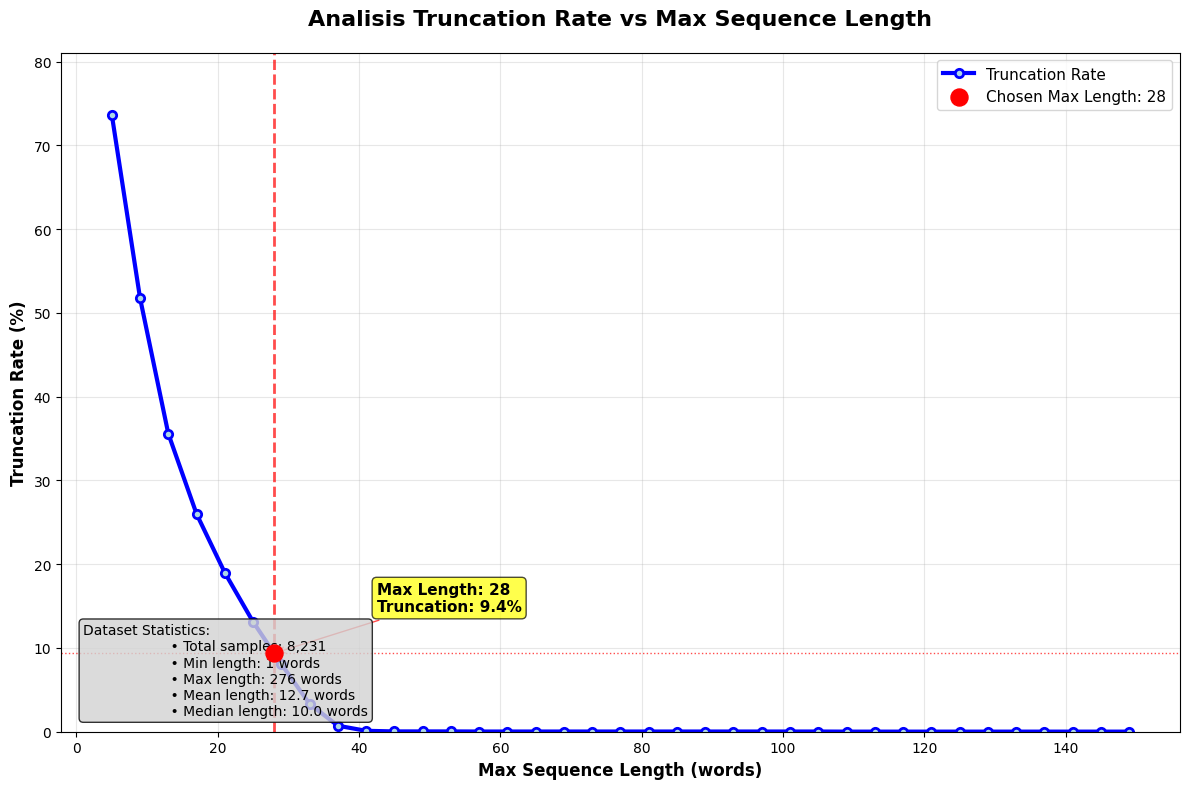

 Visualisasi disimpan: truncation_analysis.png

 KONVERSI TEKS KE VEKTOR SELESAI!
 Ringkasan:
    Max sequence length: 28
    Training samples: 6,584
    Testing samples: 1,647
    Feature dimension: 100
    Word2Vec coverage: Train 87.6%, Test 83.7%
     Device ready: cuda

 File output:
    X_train_tensor.pt
    X_test_tensor.pt
    y_train_tensor.pt
    y_test_tensor.pt
    processing_metadata.json
    truncation_analysis.png

 Data siap untuk training model RNN dan BiLSTM!


In [12]:
import pandas as pd
import numpy as np
import torch
import pickle
import json
import os
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"  Device yang digunakan: {device}")
if torch.cuda.is_available():
    print(f" GPU: {torch.cuda.get_device_name(0)}")

def load_previous_data():
    
    # Load data dan model dari step sebelumnya
    print(f"{'='*60}")
    print("LOADING DATA DAN MODEL")
    print(f"{'='*60}")
    
    try:
        # Load training dan testing data
        train_data = pd.read_csv('train_data.csv')
        test_data = pd.read_csv('test_data.csv')
        print(f" Training data loaded: {train_data.shape}")
        print(f" Testing data loaded: {test_data.shape}")
        print(f" Training columns: {list(train_data.columns)}")
        print(f" Testing columns: {list(test_data.columns)}")
        
        # Validasi kolom yang dibutuhkan
        required_columns = ['Tweet', 'label_encoded']  # Kolom yang benar
        
        for dataset_name, dataset in [('Training', train_data), ('Testing', test_data)]:
            missing_cols = [col for col in required_columns if col not in dataset.columns]
            if missing_cols:
                print(f" {dataset_name} missing columns: {missing_cols}")
                return None, None, None, None, None
        
        # Load Word2Vec model
        w2v_model = Word2Vec.load('word2vec_model.bin')
        print(f" Word2Vec model loaded: vocab_size={len(w2v_model.wv.key_to_index):,}")
        
        # Load label encoder
        with open('label_encoder.pkl', 'rb') as f:
            label_encoder = pickle.load(f)
        print(f" Label encoder loaded: {len(label_encoder.classes_)} classes")
        print(f" Classes: {list(label_encoder.classes_)}")
        
        # Load metadata
        with open('data_metadata.json', 'r', encoding='utf-8') as f:
            metadata = json.load(f)
        print(f" Metadata loaded")
        
        return train_data, test_data, w2v_model, label_encoder, metadata
        
    except FileNotFoundError as e:
        print(f" File tidak ditemukan: {e}")
        print("Pastikan Step 12 sudah dijalankan dengan benar")
        return None, None, None, None, None
    except Exception as e:
        print(f" Error loading data: {str(e)}")
        return None, None, None, None, None

def show_transformation_examples(train_data, w2v_model, label_encoder, max_length, num_examples=3):
    
    # Menampilkan contoh transformasi step-by-step dari teks ke vektor
    print(f"\n{'='*80}")
    print("CONTOH TRANSFORMASI DATA STEP-BY-STEP")
    print(f"{'='*80}")
    
    vector_size = w2v_model.vector_size
    
    # Pilih beberapa sampel untuk ditampilkan
    example_indices = [0, len(train_data)//4, len(train_data)//2]
    
    for i, idx in enumerate(example_indices[:num_examples]):
        print(f"\n{'='*60}")
        print(f" CONTOH {i+1}: Sample Index {idx}")
        print(f"{'='*60}")
        
        # 1. Teks asli
        original_text = train_data.iloc[idx]['Tweet']
        original_label = train_data.iloc[idx]['label_encoded']
        label_name = label_encoder.inverse_transform([original_label])[0]
        
        print(f"  TEKS ASLI:")
        print(f"    Text: \"{original_text}\"")
        print(f"    Label: {original_label} ({label_name})")
        print(f"    Length: {len(str(original_text))}")
        
        # 2. Setelah tokenisasi (split menjadi kata)
        if pd.isna(original_text) or str(original_text).strip() == '':
            words = []
            print(f"\n  SETELAH TOKENISASI:")
            print(f"    Empty text - akan diisi dengan zero vectors")
        else:
            words = str(original_text).split()
            print(f"\n  SETELAH TOKENISASI:")
            print(f"    Words: {words}")
            print(f"    Number of words: {len(words)}")
        
        # 3. Cek ketersediaan kata dalam vocabulary
        found_words = []
        missing_words = []
        word_vectors = []
        
        for word in words[:max_length]:  # Truncate jika perlu
            if word in w2v_model.wv.key_to_index:
                found_words.append(word)
                word_vectors.append(w2v_model.wv[word])
            else:
                missing_words.append(word)
                word_vectors.append(np.zeros(vector_size))
        
        print(f"\n  VOCABULARY CHECK:")
        print(f"  Found in vocab: {found_words} ({len(found_words)} words)")
        if missing_words:
            print(f"  Not in vocab: {missing_words} ({len(missing_words)} words)")
        else:
            print(f"  All words found in vocabulary!")
        
        coverage = len(found_words) / len(words) * 100 if len(words) > 0 else 100
        print(f"   Vocabulary coverage: {coverage:.1f}%")
        
        # 4. Setelah truncation/padding
        original_length = len(words)
        processed_length = len(word_vectors)
        
        # Padding dengan zero vectors jika perlu
        while len(word_vectors) < max_length:
            word_vectors.append(np.zeros(vector_size))
        
        print(f"\n  SETELAH SEQUENCING & PADDING:")
        print(f"    Original length: {original_length} words")
        print(f"    Processed length: {processed_length} words")
        print(f"    Final length: {len(word_vectors)} words (padded to max_length)")
        
        if original_length > max_length:
            print(f"  Truncated: YES ({original_length - max_length} words removed)")
        else:
            print(f"  Truncated: NO")
        
        if processed_length < max_length:
            padding_needed = max_length - processed_length
            print(f"  Padding added: {padding_needed} zero vectors")
        else:
            print(f"  Padding added: 0 zero vectors")
        
        # 5. Vector representation (show first few and last few)
        vectors_array = np.array(word_vectors)
        print(f"\n  VECTOR REPRESENTATION:")
        print(f"  Final shape: {vectors_array.shape}")
        print(f"  Data type: {vectors_array.dtype}")
        print(f"  Memory size: {vectors_array.nbytes} bytes")
        
        # Show sample vectors (first 3 words)
        print(f"\n  Sample vectors (first 3 positions):")
        for j in range(min(3, len(word_vectors))):
            if j < len(words):
                word_name = words[j] if j < len(words) else "<PAD>"
                is_found = words[j] in w2v_model.wv.key_to_index if j < len(words) else False
            else:
                word_name = "<PAD>"
                is_found = False
            
            vector_sample = word_vectors[j][:5]  # Show first 5 dimensions
            vector_info = "found" if is_found else "zero/missing"
            print(f"     Position {j}: \"{word_name}\" -> [{vector_sample[0]:.4f}, {vector_sample[1]:.4f}, {vector_sample[2]:.4f}, {vector_sample[3]:.4f}, {vector_sample[4]:.4f}, ...] ({vector_info})")
        
        # Show padding examples if any
        if processed_length < max_length:
            print(f"  Padding vectors (last 2 positions):")
            for j in range(max(max_length-2, processed_length), max_length):
                vector_sample = word_vectors[j][:5]
                print(f"     Position {j}: \"<PAD>\" -> [{vector_sample[0]:.4f}, {vector_sample[1]:.4f}, {vector_sample[2]:.4f}, {vector_sample[3]:.4f}, {vector_sample[4]:.4f}, ...] (padding)")
        
        # 6. Final tensor conversion info
        final_tensor = torch.tensor(vectors_array, dtype=torch.float32)
        print(f"\n  FINAL PYTORCH TENSOR:")
        print(f"  Tensor shape: {final_tensor.shape}")
        print(f"  Tensor dtype: {final_tensor.dtype}")
        print(f"  Min value: {final_tensor.min().item():.6f}")
        print(f"  Max value: {final_tensor.max().item():.6f}")
        print(f"  Mean value: {final_tensor.mean().item():.6f}")
        print(f"  Non-zero elements: {torch.count_nonzero(final_tensor).item()}/{final_tensor.numel()}")
        
        print(f"\n  Transformation complete for sample {i+1}!")

def analyze_sequence_lengths(train_data, test_data):
    
    # Analisis panjang sequence untuk menentukan max_length optimal
    print(f"\n{'='*60}")
    print("ANALISIS PANJANG SEQUENCE")
    print(f"{'='*60}")
    
    # Hitung panjang sequence (jumlah kata) menggunakan kolom Tweet yang benar
    train_lengths = train_data['Tweet'].astype(str).str.split().str.len()
    test_lengths = test_data['Tweet'].astype(str).str.split().str.len()
    
    all_lengths = pd.concat([train_lengths, test_lengths])
    
    print(f" Statistik panjang sequence:")
    print(f"   Min: {all_lengths.min()}")
    print(f"   Max: {all_lengths.max()}")
    print(f"   Mean: {all_lengths.mean():.2f}")
    print(f"   Median: {all_lengths.median():.2f}")
    print(f"   Std: {all_lengths.std():.2f}")
    
    # Percentiles untuk menentukan max_length
    percentiles = [50, 75, 85, 90, 95, 99]
    print(f"\n Percentiles:")
    for p in percentiles:
        value = np.percentile(all_lengths, p)
        coverage = (all_lengths <= value).mean() * 100
        print(f"   {p:2d}th percentile: {value:5.1f} words (covers {coverage:5.1f}% of data)")
    
    # Pilih max_length berdasarkan 90th percentile
    max_length = int(np.percentile(all_lengths, 90))
    print(f"\n Max length dipilih: {max_length} (90th percentile)")
    
    # Analisis dampak truncation
    truncated_train = (train_lengths > max_length).sum()
    truncated_test = (test_lengths > max_length).sum()
    total_truncated = truncated_train + truncated_test
    total_samples = len(train_lengths) + len(test_lengths)
    
    print(f"\n  Dampak truncation:")
    print(f"   Training samples truncated: {truncated_train}/{len(train_lengths)} ({truncated_train/len(train_lengths)*100:.2f}%)")
    print(f"   Testing samples truncated: {truncated_test}/{len(test_lengths)} ({truncated_test/len(test_lengths)*100:.2f}%)")
    print(f"   Total truncated: {total_truncated}/{total_samples} ({total_truncated/total_samples*100:.2f}%)")
    
    return max_length, all_lengths

def text_to_word2vec_vectors(texts, w2v_model, max_length):
    
    # Konversi teks ke vektor Word2Vec dengan padding
    print(f"\n{'='*60}")
    print(" KONVERSI TEKS KE WORD2VEC VECTORS")
    print(f"{'='*60}")
    
    vector_size = w2v_model.vector_size
    vectors = []
    
    # Statistik konversi
    total_words = 0
    found_words = 0
    empty_sequences = 0
    
    print(f" Mengkonversi {len(texts)} sequences...")
    print(f" Max length: {max_length}")
    print(f" Vector size: {vector_size}")
    
    for i, text in enumerate(texts):
        if pd.isna(text) or str(text).strip() == '':
            # Untuk teks kosong, buat sequence dengan zero vectors
            word_vectors = [np.zeros(vector_size) for _ in range(max_length)]
            empty_sequences += 1
        else:
            words = str(text).split()
            total_words += len(words)
            
            word_vectors = []
            for word in words[:max_length]:  # Truncate jika lebih panjang
                if word in w2v_model.wv.key_to_index:
                    word_vectors.append(w2v_model.wv[word])
                    found_words += 1
                else:
                    # Untuk kata yang tidak ada, gunakan vector zero
                    word_vectors.append(np.zeros(vector_size))
                    
            # Padding dengan zero vectors jika sequence lebih pendek
            while len(word_vectors) < max_length:
                word_vectors.append(np.zeros(vector_size))
        
        vectors.append(word_vectors)
        
        # Progress indicator
        if (i + 1) % 1000 == 0:
            print(f"  Progress: {i+1}/{len(texts)} ({(i+1)/len(texts)*100:.1f}%)")
    
    # Konversi ke numpy array
    vectors_array = np.array(vectors, dtype=np.float32)
    
    # Statistik hasil
    coverage = found_words / total_words * 100 if total_words > 0 else 0
    
    print(f"\n Konversi selesai!")
    print(f"   Shape output: {vectors_array.shape}")
    print(f"   Total words processed: {total_words:,}")
    print(f"   Words found in vocabulary: {found_words:,} ({coverage:.2f}%)")
    print(f"   Empty sequences: {empty_sequences}")
    
    return vectors_array, coverage

def create_pytorch_tensors(X_train_vectors, X_test_vectors, y_train, y_test):
    
    # Konversi ke PyTorch tensors
    print(f"\n{'='*60}")
    print("KONVERSI KE PYTORCH TENSORS")
    print(f"{'='*60}")
    
    # Konversi ke PyTorch tensors
    X_train_tensor = torch.tensor(X_train_vectors, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_vectors, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
    
    print(f" Training tensors:")
    print(f"   X_train shape: {X_train_tensor.shape}")
    print(f"   y_train shape: {y_train_tensor.shape}")
    print(f"   X_train dtype: {X_train_tensor.dtype}")
    print(f"   y_train dtype: {y_train_tensor.dtype}")
    
    print(f"\n Testing tensors:")
    print(f"   X_test shape: {X_test_tensor.shape}")
    print(f"   y_test shape: {y_test_tensor.shape}")
    print(f"   X_test dtype: {X_test_tensor.dtype}")
    print(f"   y_test dtype: {y_test_tensor.dtype}")
    
    # Memory usage
    total_memory_mb = (
        X_train_tensor.element_size() * X_train_tensor.nelement() +
        X_test_tensor.element_size() * X_test_tensor.nelement() +
        y_train_tensor.element_size() * y_train_tensor.nelement() +
        y_test_tensor.element_size() * y_test_tensor.nelement()
    ) / 1024 / 1024
    
    print(f"\n Memory usage: {total_memory_mb:.2f} MB")
    
    return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor

def validate_tensors(X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, label_encoder):
    
    # Validasi tensor yang telah dibuat
    print(f"\n{'='*60}")
    print(" VALIDASI TENSORS")
    print(f"{'='*60}")
    
    # Cek NaN atau Inf
    train_nan = torch.isnan(X_train_tensor).sum().item()
    test_nan = torch.isnan(X_test_tensor).sum().item()
    train_inf = torch.isinf(X_train_tensor).sum().item()
    test_inf = torch.isinf(X_test_tensor).sum().item()
    
    print(f" Data quality check:")
    print(f"   Training NaN values: {train_nan}")
    print(f"   Testing NaN values: {test_nan}")
    print(f"   Training Inf values: {train_inf}")
    print(f"   Testing Inf values: {test_inf}")
    
    if train_nan + test_nan + train_inf + test_inf == 0:
        print("No NaN/Inf values found")
    else:
        print("Found NaN/Inf values - may need cleaning")
    
    # Cek range values
    train_min = X_train_tensor.min().item()
    train_max = X_train_tensor.max().item()
    test_min = X_test_tensor.min().item()
    test_max = X_test_tensor.max().item()
    
    print(f"\n Value ranges:")
    print(f"   Training: [{train_min:.6f}, {train_max:.6f}]")
    print(f"   Testing: [{test_min:.6f}, {test_max:.6f}]")
    
    # Cek distribusi labels
    unique_train_labels = torch.unique(y_train_tensor)
    unique_test_labels = torch.unique(y_test_tensor)
    
    print(f"\n  Label validation:")
    print(f"   Expected classes: {len(label_encoder.classes_)} (0-{len(label_encoder.classes_)-1})")
    print(f"   Training labels: {unique_train_labels.tolist()}")
    print(f"   Testing labels: {unique_test_labels.tolist()}")
    
    expected_labels = set(range(len(label_encoder.classes_)))
    train_labels_set = set(unique_train_labels.tolist())
    test_labels_set = set(unique_test_labels.tolist())
    
    if train_labels_set == expected_labels and test_labels_set == expected_labels:
        print("All labels present in both sets")
    else:
        missing_train = expected_labels - train_labels_set
        missing_test = expected_labels - test_labels_set
        if missing_train:
            print(f"   Missing from training: {missing_train}")
        if missing_test:
            print(f"   Missing from testing: {missing_test}")

def save_processed_tensors(X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, 
                          max_length, word2vec_coverage):
    
    # Simpan tensors yang telah diproses
    print(f"\n{'='*60}")
    print(" MENYIMPAN PROCESSED TENSORS")
    print(f"{'='*60}")
    
    try:
        # Simpan tensors
        torch.save(X_train_tensor, 'X_train_tensor.pt')
        torch.save(X_test_tensor, 'X_test_tensor.pt')
        torch.save(y_train_tensor, 'y_train_tensor.pt')
        torch.save(y_test_tensor, 'y_test_tensor.pt')
        
        print(f" Tensors disimpan:")
        print(f"    X_train_tensor.pt")
        print(f"    X_test_tensor.pt")
        print(f"    y_train_tensor.pt")
        print(f"    y_test_tensor.pt")
        
        # Simpan metadata processing
        processing_metadata = {
            'max_length': max_length,
            'word2vec_coverage': word2vec_coverage,
            'tensor_shapes': {
                'X_train': list(X_train_tensor.shape),
                'X_test': list(X_test_tensor.shape),
                'y_train': list(y_train_tensor.shape),
                'y_test': list(y_test_tensor.shape)
            },
            'data_types': {
                'X_dtype': str(X_train_tensor.dtype),
                'y_dtype': str(y_train_tensor.dtype)
            },
            'device_used': str(device)
        }
        
        with open('processing_metadata.json', 'w', encoding='utf-8') as f:
            json.dump(processing_metadata, f, ensure_ascii=False, indent=2)
        
        print(f" Processing metadata disimpan: processing_metadata.json")
        
    except Exception as e:
        print(f" Error saving tensors: {str(e)}")

def visualize_truncation_analysis(all_lengths, max_length):
    
    # Visualisasi analisis truncation rate saja
    print(f"\n Membuat visualisasi truncation analysis...")
    
    try:
        # Pastikan all_lengths adalah array yang valid
        lengths_array = all_lengths.values if hasattr(all_lengths, 'values') else all_lengths
        lengths_array = np.array(lengths_array)
        
        # Setup figure dengan ukuran yang lebih besar untuk satu plot
        plt.figure(figsize=(12, 8))
        
        # Hitung persentase data yang di-truncate untuk berbagai max_length
        min_len = max(5, int(lengths_array.min()))
        max_len = min(150, int(lengths_array.max()) + 10)  # Batas maksimum 150 untuk readability
        
        print(f" Length range untuk analisis: {min_len} to {max_len}")
        
        if max_len > min_len:
            # Buat range max_lengths dengan interval yang reasonable
            step = max(1, (max_len - min_len) // 30)  # Max 30 points untuk grafik yang clean
            max_lengths = list(range(min_len, max_len, step))
            truncation_rates = []
            
            for ml in max_lengths:
                truncated = (lengths_array > ml).sum()
                rate = truncated / len(lengths_array) * 100
                truncation_rates.append(rate)
            
            if len(max_lengths) > 1 and len(truncation_rates) > 1:
                # Plot line dengan markers
                plt.plot(max_lengths, truncation_rates, 'b-', linewidth=3, 
                        marker='o', markersize=6, markerfacecolor='lightblue', 
                        markeredgecolor='blue', markeredgewidth=2, label='Truncation Rate')
                
                # Highlight titik yang dipilih
                current_rate = (lengths_array > max_length).sum() / len(lengths_array) * 100
                plt.scatter([max_length], [current_rate], color='red', s=150, 
                           zorder=5, label=f'Chosen Max Length: {max_length}')
                
                # Vertical line untuk max_length yang dipilih
                plt.axvline(x=max_length, color='red', linestyle='--', linewidth=2, alpha=0.7)
                
                # Horizontal line untuk truncation rate yang dipilih
                plt.axhline(y=current_rate, color='red', linestyle=':', linewidth=1, alpha=0.7)
                
                # Tambahkan text annotation
                plt.annotate(f'Max Length: {max_length}\nTruncation: {current_rate:.1f}%', 
                           xy=(max_length, current_rate), 
                           xytext=(max_length + (max_len-min_len)*0.1, current_rate + 5),
                           arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                           fontsize=11, fontweight='bold',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
                
                plt.title('Analisis Truncation Rate vs Max Sequence Length', 
                         fontsize=16, fontweight='bold', pad=20)
                plt.xlabel('Max Sequence Length (words)', fontsize=12, fontweight='bold')
                plt.ylabel('Truncation Rate (%)', fontsize=12, fontweight='bold')
                plt.grid(True, alpha=0.3)
                plt.legend(fontsize=11, loc='upper right')
                
                # Set reasonable y-axis limits
                plt.ylim(0, max(truncation_rates) * 1.1)
                
                # Tambahkan informasi statistik di pojok kiri bawah
                stats_text = f"""Dataset Statistics:
                    • Total samples: {len(lengths_array):,}
                    • Min length: {int(lengths_array.min())} words
                    • Max length: {int(lengths_array.max())} words
                    • Mean length: {lengths_array.mean():.1f} words
                    • Median length: {np.median(lengths_array):.1f} words"""
                
                plt.text(0.02, 0.02, stats_text, transform=plt.gca().transAxes, 
                        fontsize=10, verticalalignment='bottom',
                        bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
                
                print("Truncation analysis plot berhasil dibuat")
            else:
                plt.text(0.5, 0.5, 'Insufficient data points\nfor truncation analysis', 
                        ha='center', va='center', transform=plt.gca().transAxes,
                        fontsize=14, fontweight='bold')
                plt.title('Truncation Analysis (Insufficient Data)', fontweight='bold')
        else:
            plt.text(0.5, 0.5, 'Invalid length range\nfor truncation analysis', 
                    ha='center', va='center', transform=plt.gca().transAxes,
                    fontsize=14, fontweight='bold')
            plt.title('Truncation Analysis (Invalid Range)', fontweight='bold')
        
        plt.tight_layout()
        
        # Simpan file
        output_file = 'truncation_analysis.png'
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f" Visualisasi disimpan: {output_file}")
        
    except Exception as e:
        print(f" Error creating truncation visualization: {str(e)}")
        import traceback
        traceback.print_exc()

def main():
    
    # Main function untuk menjalankan konversi teks ke vektor
    print("MEMULAI KONVERSI TEKS KE VEKTOR DAN PADDING")
    print("="*60)
    
    # Load data dan model
    train_data, test_data, w2v_model, label_encoder, metadata = load_previous_data()
    
    if not all(x is not None for x in [train_data, test_data, w2v_model, label_encoder, metadata]):
        print(" Tidak dapat melanjutkan tanpa data dari step sebelumnya")
        return
    
    try:
        # Analisis panjang sequence
        max_length, all_lengths = analyze_sequence_lengths(train_data, test_data)
        
        # TAMBAHAN: Tampilkan contoh transformasi step-by-step
        show_transformation_examples(train_data, w2v_model, label_encoder, max_length)
        
        # Konversi training data ke vectors
        print(f"\n Konversi training data...")
        X_train_vectors, train_coverage = text_to_word2vec_vectors(
            train_data['Tweet'], w2v_model, max_length  # Menggunakan kolom Tweet yang benar
        )
        
        # Konversi testing data ke vectors
        print(f"\n Konversi testing data...")
        X_test_vectors, test_coverage = text_to_word2vec_vectors(
            test_data['Tweet'], w2v_model, max_length   # Menggunakan kolom Tweet yang benar
        )
        
        # Buat PyTorch tensors
        X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = create_pytorch_tensors(
            X_train_vectors, X_test_vectors, train_data['label_encoded'], test_data['label_encoded']
        )
        
        # Validasi tensors
        validate_tensors(X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, label_encoder)
        
        # Simpan tensors
        save_processed_tensors(X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, 
                              max_length, (train_coverage + test_coverage) / 2)
        
        # Visualisasi hanya truncation analysis
        visualize_truncation_analysis(all_lengths, max_length)
        
        print(f"\n{'='*60}")
        print(" KONVERSI TEKS KE VEKTOR SELESAI!")
        print(f"{'='*60}")
        print(f" Ringkasan:")
        print(f"    Max sequence length: {max_length}")
        print(f"    Training samples: {X_train_tensor.shape[0]:,}")
        print(f"    Testing samples: {X_test_tensor.shape[0]:,}")
        print(f"    Feature dimension: {X_train_tensor.shape[2]}")
        print(f"    Word2Vec coverage: Train {train_coverage:.1f}%, Test {test_coverage:.1f}%")
        print(f"     Device ready: {device}")
        print(f"\n File output:")
        print(f"    X_train_tensor.pt")
        print(f"    X_test_tensor.pt") 
        print(f"    y_train_tensor.pt")
        print(f"    y_test_tensor.pt")
        print(f"    processing_metadata.json")
        print(f"    truncation_analysis.png")
        print(f"\n Data siap untuk training model RNN dan BiLSTM!")
        
    except Exception as e:
        print(f" Error dalam proses konversi: {str(e)}")

# ============================================
# JALANKAN KONVERSI TEKS KE VEKTOR
# ============================================
if __name__ == "__main__":
    main()

# STEP 14: PELATIHAN MODEL RNN

Device yang digunakan: cuda
GPU: NVIDIA GeForce RTX 3060 Laptop GPU
LOADING TRAINING DATA
 Tensors loaded:
  X_train shape: torch.Size([6584, 28, 100])
  X_test shape: torch.Size([1647, 28, 100])
  y_train shape: torch.Size([6584])
  y_test shape: torch.Size([1647])
 Label encoder loaded: 6 classes
 Processing metadata loaded

SETUP MODEL RNN
RNN Hyperparameters (Sesuai Spesifikasi):
  input_size: 100
  hidden_size: 128
  num_layers: 2
  num_classes: 6
  dropout: 0.3
  learning_rate: 0.001
  batch_size: 32
  num_epochs: 40
  weight_decay: 1e-05
  optimizer: adamw
  scheduler: warmup_plateau
  label_smoothing: 0.1
  gradient_clipping: 2.0
  warmup_epochs: 3
  warmup_lr: 1e-06

Model Architecture:
  Total parameters: 63,623
  Trainable parameters: 63,623
  Features: Self-Attention, Layer Normalization
  Activation: tanh

DataLoader Setup:
  Training batches: 206
  Validation batches: 52
  Batch size: 32

MEMULAI TRAINING MODEL RNN
 Using CrossEntropyLoss with Label Smoothing: 0.1
 Using 

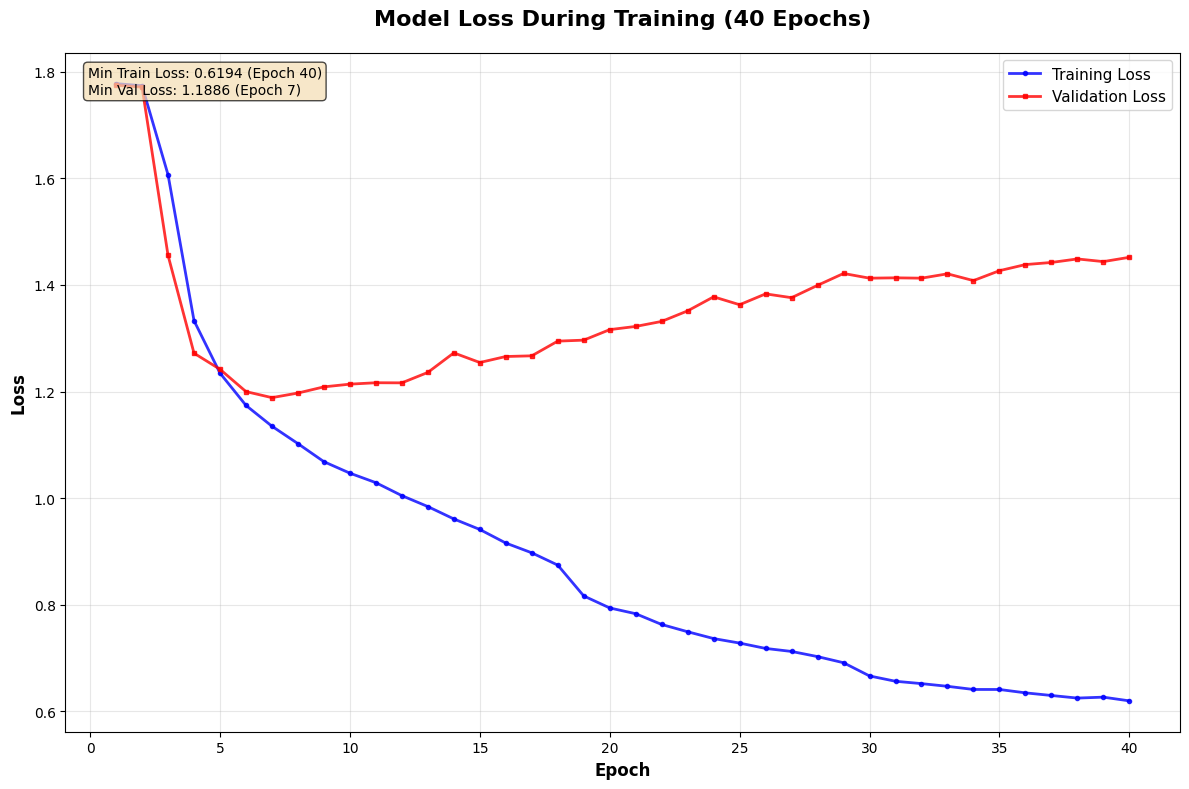

Membuat plot accuracy...


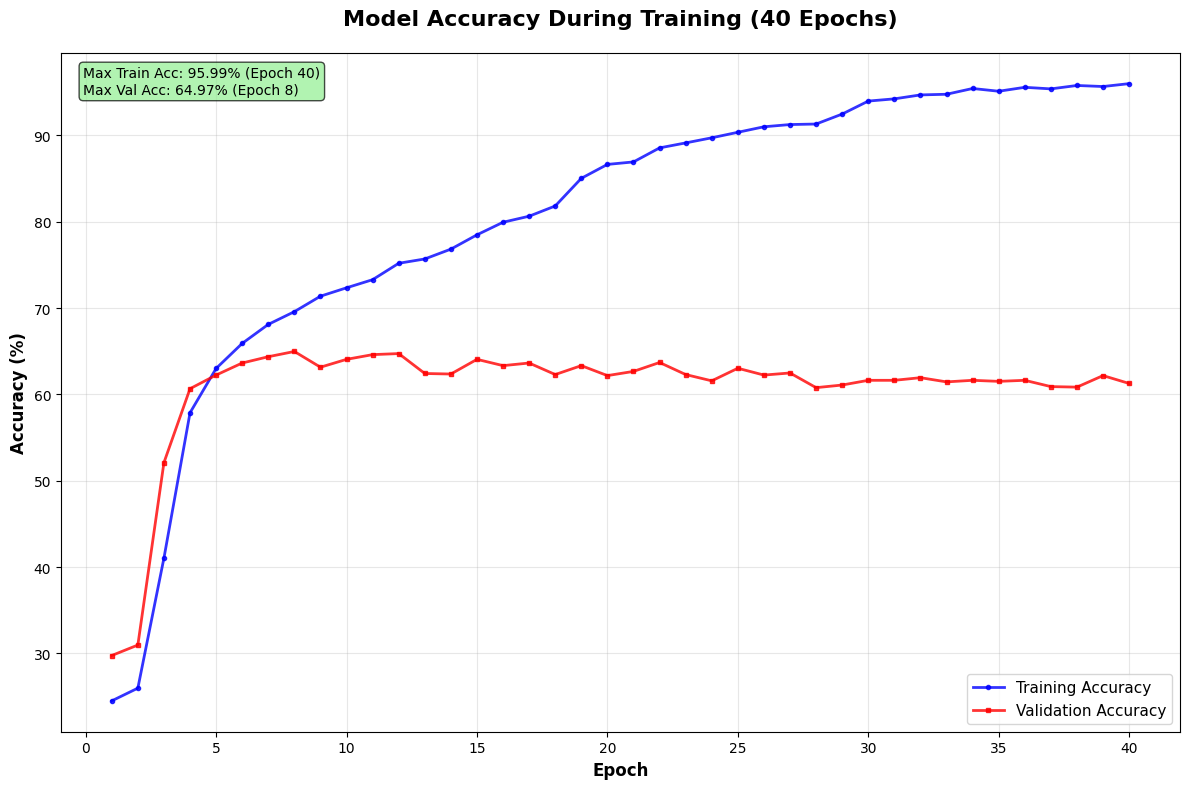

Membuat plot learning rate...


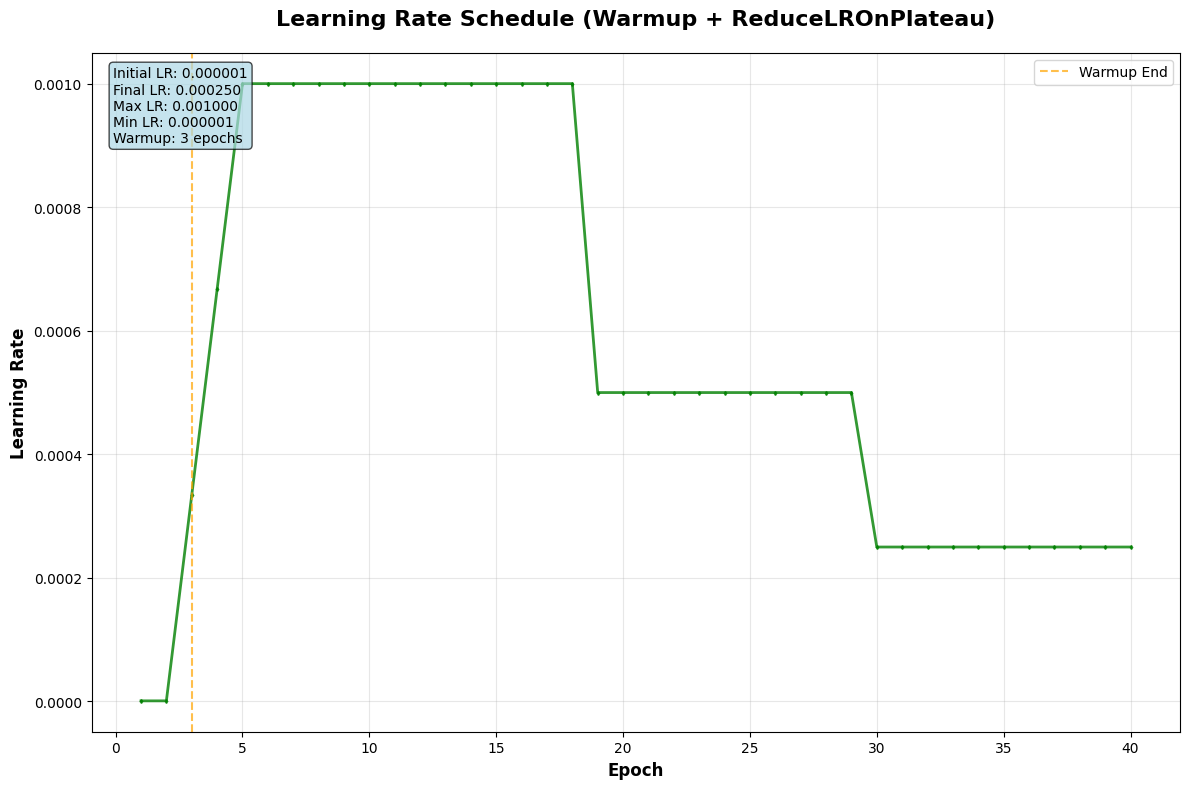

Semua visualisasi training berhasil disimpan!

MENYIMPAN MODEL RNN
Model RNN disimpan: rnn_model.pth, rnn_model_complete.pth
 Training history disimpan: rnn_training_history.json
 Evaluation results disimpan: rnn_evaluation_results.json

STEP 14 - TRAINING MODEL RNN SELESAI!
Ringkasan:
- Model: RNN dengan 128 hidden units, 2 layers
- Best accuracy: 64.97%
- Training time: 63.6 seconds (1.1 minutes)
- Total parameters: 63,623
- Optimizer: adamw
- Scheduler: warmup_plateau
- Epochs: 40
- Batch size: 32

File output:
- rnn_model.pth
- rnn_model_complete.pth
- rnn_training_history.json
- rnn_evaluation_results.json
- rnn_loss_plot.png
- rnn_accuracy_plot.png
- rnn_learning_rate_plot.png


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device yang digunakan: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

def load_training_data():
    
    # Load data yang sudah diproses dari step sebelumnya
    print(f"{'='*60}")
    print("LOADING TRAINING DATA")
    print(f"{'='*60}")
    
    try:
        # Load tensors
        X_train_tensor = torch.load('X_train_tensor.pt')
        X_test_tensor = torch.load('X_test_tensor.pt')
        y_train_tensor = torch.load('y_train_tensor.pt')
        y_test_tensor = torch.load('y_test_tensor.pt')
        
        print(f" Tensors loaded:")
        print(f"  X_train shape: {X_train_tensor.shape}")
        print(f"  X_test shape: {X_test_tensor.shape}")
        print(f"  y_train shape: {y_train_tensor.shape}")
        print(f"  y_test shape: {y_test_tensor.shape}")
        
        # Load label encoder
        with open('label_encoder.pkl', 'rb') as f:
            label_encoder = pickle.load(f)
        print(f" Label encoder loaded: {len(label_encoder.classes_)} classes")
        
        # Load metadata
        with open('processing_metadata.json', 'r', encoding='utf-8') as f:
            metadata = json.load(f)
        print(f" Processing metadata loaded")
        
        return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, label_encoder, metadata
        
    except FileNotFoundError as e:
        print(f" File tidak ditemukan: {e}")
        print("Pastikan Step 13 sudah dijalankan")
        return None, None, None, None, None, None

# ===================================================================
# DEFINISI MODEL RNN DENGAN FITUR TAMBAHAN
# ===================================================================

class SelfAttention(nn.Module):
    """Self-Attention mechanism untuk RNN"""
    def __init__(self, hidden_size):
        super(SelfAttention, self).__init__()
        self.hidden_size = hidden_size
        self.attention = nn.Linear(hidden_size, 1)
        
    def forward(self, rnn_output):
        # rnn_output shape: (batch_size, seq_len, hidden_size)
        attention_weights = torch.softmax(self.attention(rnn_output), dim=1)
        # attention_weights shape: (batch_size, seq_len, 1)
        
        # Weighted sum
        context_vector = torch.sum(attention_weights * rnn_output, dim=1)
        # context_vector shape: (batch_size, hidden_size)
        
        return context_vector, attention_weights

class RNNClassifier(nn.Module):
    
    # Model RNN untuk klasifikasi emosi teks dengan fitur tambahan
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.3):
        super(RNNClassifier, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_classes = num_classes
        
        # RNN Layer dengan dropout
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            nonlinearity='tanh'  # Aktivasi tanh untuk RNN
        )
        
        # Self-Attention mechanism
        self.self_attention = SelfAttention(hidden_size)
        
        # Layer Normalization
        self.layer_norm = nn.LayerNorm(hidden_size)
        
        # Dropout untuk regularisasi
        self.dropout = nn.Dropout(dropout)
        
        # Fully Connected Layer untuk output
        self.fc = nn.Linear(hidden_size, num_classes)
        
        # Inisialisasi weights
        self._init_weights()
    
    def _init_weights(self):
        # Inisialisasi weights yang baik untuk training
        for name, param in self.named_parameters():
            if 'weight' in name and param.dim() >= 2:
                nn.init.xavier_uniform_(param)
            elif 'weight' in name and param.dim() == 1:
                nn.init.uniform_(param, -0.1, 0.1)
            elif 'bias' in name:
                nn.init.constant_(param, 0)
    
    def forward(self, x):
        # Initialize hidden state dengan zeros
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        
        # Forward pass melalui RNN
        rnn_out, _ = self.rnn(x, h0)
        
        # Self-Attention untuk mendapatkan representation yang lebih baik
        context_vector, attention_weights = self.self_attention(rnn_out)
        
        # Apply Layer Normalization
        normalized_output = self.layer_norm(context_vector)
        
        # Apply dropout
        dropped_output = self.dropout(normalized_output)
        
        # Pass ke fully connected layer
        output = self.fc(dropped_output)
        
        return output

def count_parameters(model):
    # Hitung jumlah parameter model
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

# ===================================================================
# LABEL SMOOTHING LOSS FUNCTION
# ===================================================================

class LabelSmoothingCrossEntropy(nn.Module):
    """CrossEntropyLoss dengan Label Smoothing"""
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingCrossEntropy, self).__init__()
        self.smoothing = smoothing
        
    def forward(self, pred, target):
        # pred: (batch_size, num_classes)
        # target: (batch_size,)
        
        num_classes = pred.size(-1)
        log_probs = F.log_softmax(pred, dim=-1)
        
        # Convert target to one-hot dengan label smoothing
        with torch.no_grad():
            true_dist = torch.zeros_like(log_probs)
            true_dist.fill_(self.smoothing / (num_classes - 1))
            true_dist.scatter_(1, target.unsqueeze(1), 1.0 - self.smoothing)
        
        return torch.mean(torch.sum(-true_dist * log_probs, dim=-1))

# ===================================================================
# WARMUP SCHEDULER
# ===================================================================

class WarmupReduceLROnPlateau:
    """Warmup Scheduler diikuti dengan ReduceLROnPlateau"""
    def __init__(self, optimizer, warmup_epochs, base_lr, warmup_lr, patience=10, factor=0.5):
        self.optimizer = optimizer
        self.warmup_epochs = warmup_epochs
        self.base_lr = base_lr
        self.warmup_lr = warmup_lr
        self.current_epoch = 0
        self.warmup_complete = False
        
        # ReduceLROnPlateau scheduler
        self.plateau_scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', patience=patience, factor=factor, verbose=True
        )
        
        # Set initial learning rate untuk warmup
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = self.warmup_lr
    
    def step(self, val_loss=None):
        if self.current_epoch < self.warmup_epochs:
            # Warmup phase: linear increase dari warmup_lr ke base_lr
            lr = self.warmup_lr + (self.base_lr - self.warmup_lr) * (self.current_epoch / self.warmup_epochs)
            for param_group in self.optimizer.param_groups:
                param_group['lr'] = lr
            self.current_epoch += 1
        else:
            # Setelah warmup, gunakan ReduceLROnPlateau
            if not self.warmup_complete:
                # Set ke base_lr setelah warmup selesai
                for param_group in self.optimizer.param_groups:
                    param_group['lr'] = self.base_lr
                self.warmup_complete = True
            
            if val_loss is not None:
                self.plateau_scheduler.step(val_loss)

# ===================================================================
# SETUP HYPERPARAMETERS DAN MODEL
# ===================================================================

def setup_rnn_model(input_size, num_classes):
    
    # Setup model RNN dengan hyperparameters baru sesuai spesifikasi
    print(f"\n{'='*60}")
    print("SETUP MODEL RNN")
    print(f"{'='*60}")
    
    # Hyperparameters RNN (KONFIGURASI BARU SESUAI SPESIFIKASI)
    RNN_PARAMS = {
        'input_size': 100,  # Dimensi fitur sesuai spesifikasi
        'hidden_size': 128,  # Unit tersembunyi
        'num_layers': 2,  # Jumlah lapisan
        'num_classes': 6,  # Jumlah kelas
        'dropout': 0.3,  # Dropout rate
        'learning_rate': 0.001,  # Learning rate
        'batch_size': 32,  # Batch size
        'num_epochs': 40,  # Jumlah epoch
        'weight_decay': 1e-5,  # Weight decay (L2 regularization)
        'optimizer': 'adamw',  # Optimizer
        'scheduler': 'warmup_plateau',  # Scheduler type
        'label_smoothing': 0.1,  # Label smoothing
        'gradient_clipping': 2.0,  # Max norm untuk gradient clipping
        'warmup_epochs': 3,  # Warmup epochs
        'warmup_lr': 1e-6  # Learning rate untuk warmup
    }
    
    print(f"RNN Hyperparameters (Sesuai Spesifikasi):")
    for key, value in RNN_PARAMS.items():
        print(f"  {key}: {value}")
    
    # Inisialisasi model
    model = RNNClassifier(
        input_size=RNN_PARAMS['input_size'],
        hidden_size=RNN_PARAMS['hidden_size'],
        num_layers=RNN_PARAMS['num_layers'],
        num_classes=RNN_PARAMS['num_classes'],
        dropout=RNN_PARAMS['dropout']
    ).to(device)
    
    # Hitung parameter
    total_params, trainable_params = count_parameters(model)
    print(f"\nModel Architecture:")
    print(f"  Total parameters: {total_params:,}")
    print(f"  Trainable parameters: {trainable_params:,}")
    print(f"  Features: Self-Attention, Layer Normalization")
    print(f"  Activation: tanh")
    
    return model, RNN_PARAMS

# ===================================================================
# TRAINING FUNCTIONS
# ===================================================================

def create_data_loaders(X_train, X_val, y_train, y_val, batch_size):
    
    # Buat DataLoader untuk training dan validation
    # Training DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Validation DataLoader
    val_dataset = TensorDataset(X_val, y_val)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    print(f"\nDataLoader Setup:")
    print(f"  Training batches: {len(train_loader)}")
    print(f"  Validation batches: {len(val_loader)}")
    print(f"  Batch size: {batch_size}")
    
    return train_loader, val_loader

def train_rnn_model(model, train_loader, val_loader, params, label_encoder):
    
    # Training function untuk model RNN dengan konfigurasi baru
    print(f"\n{'='*60}")
    print("MEMULAI TRAINING MODEL RNN")
    print(f"{'='*60}")
    
    # Setup loss function dengan label smoothing
    criterion = LabelSmoothingCrossEntropy(smoothing=params['label_smoothing'])
    print(f" Using CrossEntropyLoss with Label Smoothing: {params['label_smoothing']}")
    
    # Setup optimizer AdamW
    optimizer = optim.AdamW(
        model.parameters(), 
        lr=params['learning_rate'],
        weight_decay=params['weight_decay']
    )
    print(f" Using AdamW optimizer")
    print(f"   Learning Rate: {params['learning_rate']}")
    print(f"   Weight Decay: {params['weight_decay']}")
    
    # Setup Warmup + ReduceLROnPlateau scheduler
    scheduler = WarmupReduceLROnPlateau(
        optimizer=optimizer,
        warmup_epochs=params['warmup_epochs'],
        base_lr=params['learning_rate'],
        warmup_lr=params['warmup_lr'],
        patience=10,
        factor=0.5
    )
    print(f" Using Warmup ({params['warmup_epochs']} epochs) + ReduceLROnPlateau scheduler")
    print(f"   Warmup LR: {params['warmup_lr']:.6f} -> Base LR: {params['learning_rate']:.6f}")
    
    # Tracking metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    learning_rates = []
    
    best_val_acc = 0.0
    best_model_state = None
    start_time = time.time()
    
    print(f"Training akan berjalan selama {params['num_epochs']} epochs...")
    print(f"Gradient Clipping Max Norm: {params['gradient_clipping']}")
    print("-" * 60)
    
    for epoch in range(params['num_epochs']):
        # ===================
        # TRAINING PHASE
        # ===================
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            output = model(data)
            loss = criterion(output, target)
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping dengan max norm sesuai spesifikasi
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=params['gradient_clipping'])
            
            # Update weights
            optimizer.step()
            
            # Statistics
            train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()
        
        # ===================
        # VALIDATION PHASE
        # ===================
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                
                val_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                val_total += target.size(0)
                val_correct += (predicted == target).sum().item()
        
        # Calculate metrics
        avg_train_loss = train_loss / len(train_loader)
        train_acc = 100. * train_correct / train_total
        avg_val_loss = val_loss / len(val_loader)
        val_acc = 100. * val_correct / val_total
        current_lr = optimizer.param_groups[0]['lr']
        
        # Store metrics
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_acc)
        learning_rates.append(current_lr)
        
        # Update scheduler
        scheduler.step(avg_val_loss)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
        
        # Print progress setiap 5 epochs atau epoch penting
        if (epoch + 1) % 5 == 0 or epoch == 0 or epoch < 5:
            warmup_status = " [WARMUP]" if epoch < params['warmup_epochs'] else ""
            print(f'Epoch [{epoch+1:2d}/{params["num_epochs"]}]{warmup_status} | '
                  f'Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}% | '
                  f'Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.2f}% | '
                  f'LR: {current_lr:.6f}')
    
    # Training selesai
    end_time = time.time()
    training_time = end_time - start_time
    
    # Load best model
    model.load_state_dict(best_model_state)
    
    print(f"\n{'='*60}")
    print("TRAINING MODEL RNN SELESAI!")
    print(f"{'='*60}")
    print(f"Training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")
    print(f"Best validation accuracy: {best_val_acc:.2f}%")
    print(f"Final learning rate: {learning_rates[-1]:.6f}")
    print(f"Model features: Self-Attention + Layer Normalization")
    print(f"Loss function: CrossEntropyLoss + Label Smoothing ({params['label_smoothing']})")
    print(f"Optimizer: {params['optimizer']} (LR: {params['learning_rate']}, WD: {params['weight_decay']})")
    print(f"Scheduler: Warmup ({params['warmup_epochs']} epochs) + ReduceLROnPlateau")
    
    return {
        'model': model,
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'learning_rates': learning_rates,
        'best_accuracy': best_val_acc,
        'training_time': training_time,
        'model_params': params
    }

def evaluate_rnn_model(model, val_loader, label_encoder):
    
    # Evaluasi basic model RNN (classification report akan ada di step 16)
    print(f"\n{'='*60}")
    print("EVALUASI BASIC MODEL RNN")
    print(f"{'='*60}")
    
    model.eval()
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    # Convert ke nama label
    pred_labels = label_encoder.inverse_transform(all_predictions)
    true_labels = label_encoder.inverse_transform(all_targets)
    
    # Basic accuracy calculation
    accuracy = accuracy_score(true_labels, pred_labels) * 100
    print(f" Model validation accuracy: {accuracy:.2f}%")
    print(f" Total predictions: {len(all_predictions)}")
    print(" Detailed evaluation akan tersedia di Step 16")
    
    return {
        'predictions': all_predictions,
        'targets': all_targets,
        'pred_labels': pred_labels,
        'true_labels': true_labels,
        'accuracy': accuracy
    }

def visualize_rnn_training_separated(results):
    
    # Visualisasi hasil training RNN
    print(f"\n Membuat visualisasi training terpisah...")
    epochs = range(1, len(results['train_losses']) + 1)
    
    # 1. Loss Plot
    print("Membuat plot loss...")
    plt.figure(figsize=(12, 8))
    plt.plot(epochs, results['train_losses'], 'b-', label='Training Loss', linewidth=2, marker='o', markersize=3, alpha=0.8)
    plt.plot(epochs, results['val_losses'], 'r-', label='Validation Loss', linewidth=2, marker='s', markersize=3, alpha=0.8)
    plt.title('Model Loss During Training (40 Epochs)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Loss', fontsize=12, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    
    # Tambahkan informasi minimum loss
    min_train_loss = min(results['train_losses'])
    min_val_loss = min(results['val_losses'])
    min_train_epoch = results['train_losses'].index(min_train_loss) + 1
    min_val_epoch = results['val_losses'].index(min_val_loss) + 1
    
    plt.text(0.02, 0.98, f'Min Train Loss: {min_train_loss:.4f} (Epoch {min_train_epoch})\nMin Val Loss: {min_val_loss:.4f} (Epoch {min_val_epoch})', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('rnn_loss_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # 2. Accuracy Plot
    print("Membuat plot accuracy...")
    plt.figure(figsize=(12, 8))
    plt.plot(epochs, results['train_accuracies'], 'b-', label='Training Accuracy', linewidth=2, marker='o', markersize=3, alpha=0.8)
    plt.plot(epochs, results['val_accuracies'], 'r-', label='Validation Accuracy', linewidth=2, marker='s', markersize=3, alpha=0.8)
    plt.title('Model Accuracy During Training (40 Epochs)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    
    # Tambahkan informasi maximum accuracy
    max_train_acc = max(results['train_accuracies'])
    max_val_acc = max(results['val_accuracies'])
    max_train_epoch = results['train_accuracies'].index(max_train_acc) + 1
    max_val_epoch = results['val_accuracies'].index(max_val_acc) + 1
    
    plt.text(0.02, 0.98, f'Max Train Acc: {max_train_acc:.2f}% (Epoch {max_train_epoch})\nMax Val Acc: {max_val_acc:.2f}% (Epoch {max_val_epoch})', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('rnn_accuracy_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # 3. Learning Rate Schedule
    print("Membuat plot learning rate...")
    plt.figure(figsize=(12, 8))
    plt.plot(epochs, results['learning_rates'], 'g-', linewidth=2, marker='d', markersize=2, alpha=0.8)
    plt.title('Learning Rate Schedule (Warmup + ReduceLROnPlateau)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Learning Rate', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Tambahkan informasi learning rate dan warmup
    initial_lr = results['learning_rates'][0]
    final_lr = results['learning_rates'][-1]
    max_lr = max(results['learning_rates'])
    min_lr = min(results['learning_rates'])
    
    plt.axvline(x=3, color='orange', linestyle='--', alpha=0.7, label='Warmup End')
    plt.legend()
    
    plt.text(0.02, 0.98, f'Initial LR: {initial_lr:.6f}\nFinal LR: {final_lr:.6f}\nMax LR: {max_lr:.6f}\nMin LR: {min_lr:.6f}\nWarmup: 3 epochs', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('rnn_learning_rate_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    print("Semua visualisasi training berhasil disimpan!")

def save_rnn_model(results, evaluation_results):
    
    # Simpan model RNN dan hasil training
    print(f"\n{'='*60}")
    print("MENYIMPAN MODEL RNN")
    print(f"{'='*60}")
    
    # Simpan model
    torch.save(results['model'].state_dict(), 'rnn_model.pth')
    torch.save(results['model'], 'rnn_model_complete.pth')
    print("Model RNN disimpan: rnn_model.pth, rnn_model_complete.pth")
    
    # Simpan training history (convert numpy/torch types to Python native types)
    training_history = {
        'train_losses': [float(x) for x in results['train_losses']],
        'train_accuracies': [float(x) for x in results['train_accuracies']],
        'val_losses': [float(x) for x in results['val_losses']],
        'val_accuracies': [float(x) for x in results['val_accuracies']],
        'learning_rates': [float(x) for x in results['learning_rates']],
        'best_accuracy': float(results['best_accuracy']),
        'training_time': float(results['training_time']),
        'model_params': results['model_params']
    }
    
    with open('rnn_training_history.json', 'w', encoding='utf-8') as f:
        json.dump(training_history, f, ensure_ascii=False, indent=2)
    print(" Training history disimpan: rnn_training_history.json")
    
    # Simpan evaluation results (convert numpy types to Python native types)
    evaluation_data = {
        'predictions': [int(x) for x in evaluation_results['predictions']],
        'targets': [int(x) for x in evaluation_results['targets']],
        'accuracy': float(evaluation_results['accuracy'])
    }
    
    with open('rnn_evaluation_results.json', 'w', encoding='utf-8') as f:
        json.dump(evaluation_data, f, ensure_ascii=False, indent=2)
    print(" Evaluation results disimpan: rnn_evaluation_results.json")

# ============================================
# JALANKAN TRAINING MODEL RNN
# ============================================

# Load data
X_train, X_test, y_train, y_test, label_encoder, metadata = load_training_data()

if all(x is not None for x in [X_train, X_test, y_train, y_test, label_encoder, metadata]):
    
    # Setup model RNN
    input_size = X_train.shape[2]  # Feature dimension dari Word2Vec
    num_classes = len(label_encoder.classes_)
    
    rnn_model, rnn_params = setup_rnn_model(input_size, num_classes)
    
    # Create data loaders
    train_loader, val_loader = create_data_loaders(
        X_train, X_test, y_train, y_test, rnn_params['batch_size']
    )
    
    # Training model
    training_results = train_rnn_model(
        model=rnn_model,
        train_loader=train_loader,
        val_loader=val_loader,
        params=rnn_params,
        label_encoder=label_encoder
    )
    
    # Evaluasi model
    evaluation_results = evaluate_rnn_model(
        model=rnn_model,
        val_loader=val_loader,
        label_encoder=label_encoder
    )
    
    # Visualisasi hasil
    visualize_rnn_training_separated(training_results)
    
    # Simpan model dan hasil
    save_rnn_model(training_results, evaluation_results)
    
    print(f"\n{'='*60}")
    print("STEP 14 - TRAINING MODEL RNN SELESAI!")
    print(f"Ringkasan:")
    print(f"- Model: RNN dengan {rnn_params['hidden_size']} hidden units, {rnn_params['num_layers']} layers")
    print(f"- Best accuracy: {training_results['best_accuracy']:.2f}%")
    print(f"- Training time: {training_results['training_time']:.1f} seconds ({training_results['training_time']/60:.1f} minutes)")
    print(f"- Total parameters: {sum(p.numel() for p in rnn_model.parameters()):,}")
    print(f"- Optimizer: {rnn_params['optimizer']}")
    print(f"- Scheduler: {rnn_params['scheduler']}")
    print(f"- Epochs: {rnn_params['num_epochs']}")
    print(f"- Batch size: {rnn_params['batch_size']}")
    print(f"\nFile output:")
    print(f"- rnn_model.pth")
    print(f"- rnn_model_complete.pth")
    print(f"- rnn_training_history.json")
    print(f"- rnn_evaluation_results.json")
    print(f"- rnn_loss_plot.png")
    print(f"- rnn_accuracy_plot.png")
    print(f"- rnn_learning_rate_plot.png")
    
else:
    print("❌ Tidak dapat melanjutkan tanpa data dari step sebelumnya")

# STEP 15: PELATIHAN MODEL BiLSTM

Device yang digunakan: cuda
GPU: NVIDIA GeForce RTX 3060 Laptop GPU
MEMULAI STEP 15 - TRAINING MODEL BiLSTM
LOADING TRAINING DATA
 Tensors loaded:
   X_train shape: torch.Size([6584, 28, 100])
   X_test shape: torch.Size([1647, 28, 100])
   y_train shape: torch.Size([6584])
   y_test shape: torch.Size([1647])
 Label encoder loaded: 6 classes
 Classes: ['Anger', 'Fear', 'Joy', 'Love', 'Neutral', 'Sad']
 Processing metadata loaded

SETUP MODEL BiLSTM
BiLSTM Hyperparameters (Sesuai Spesifikasi):
  input_size: 100
  hidden_size: 64
  num_layers: 1
  num_classes: 6
  dropout: 0.2
  learning_rate: 0.002
  batch_size: 64
  num_epochs: 30
  weight_decay: 0.0001
  optimizer: adam
  scheduler: reduce_lr_on_plateau
  gradient_clipping: 1.0

Model Architecture:
  Total parameters: 85,766
  Trainable parameters: 85,766
  Tipe: Bidirectional LSTM
  Aktivasi: tanh (default LSTM)

DataLoader Setup:
  Training batches: 103
  Validation batches: 26
  Batch size: 64

MEMULAI TRAINING MODEL BiLSTM
 Using 

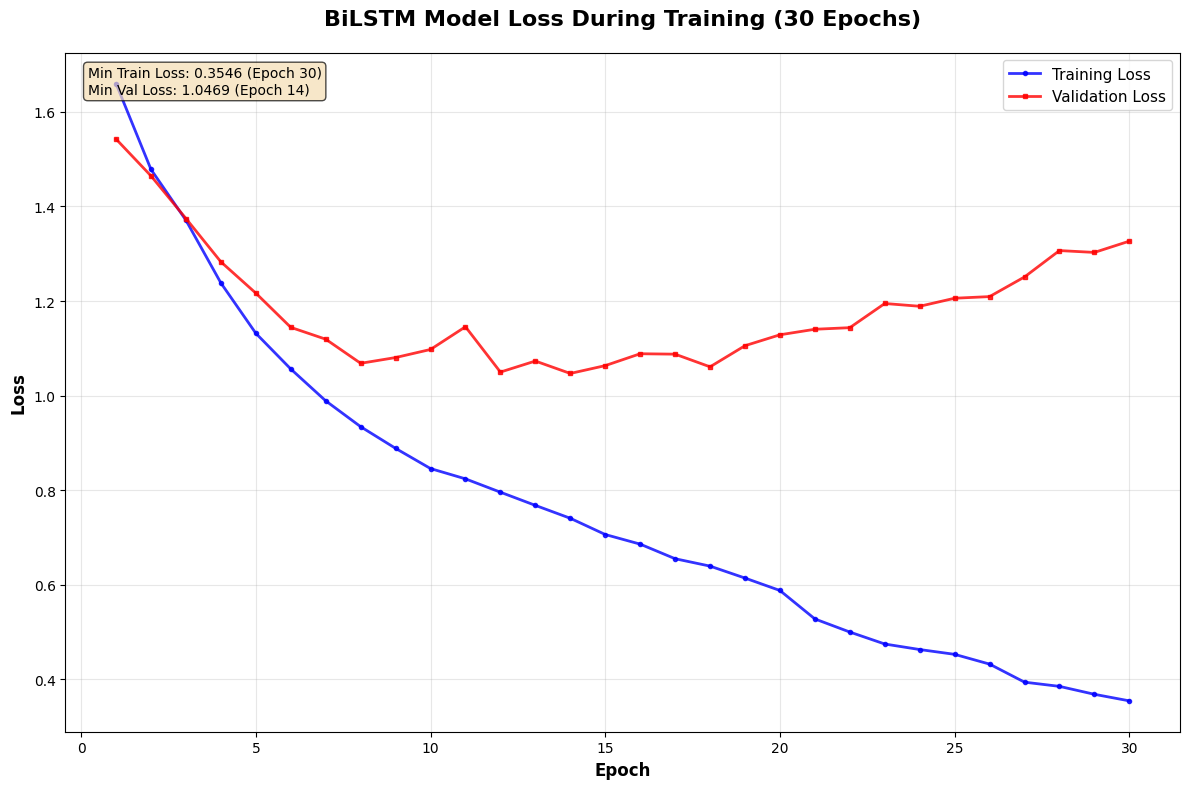

Membuat plot accuracy...


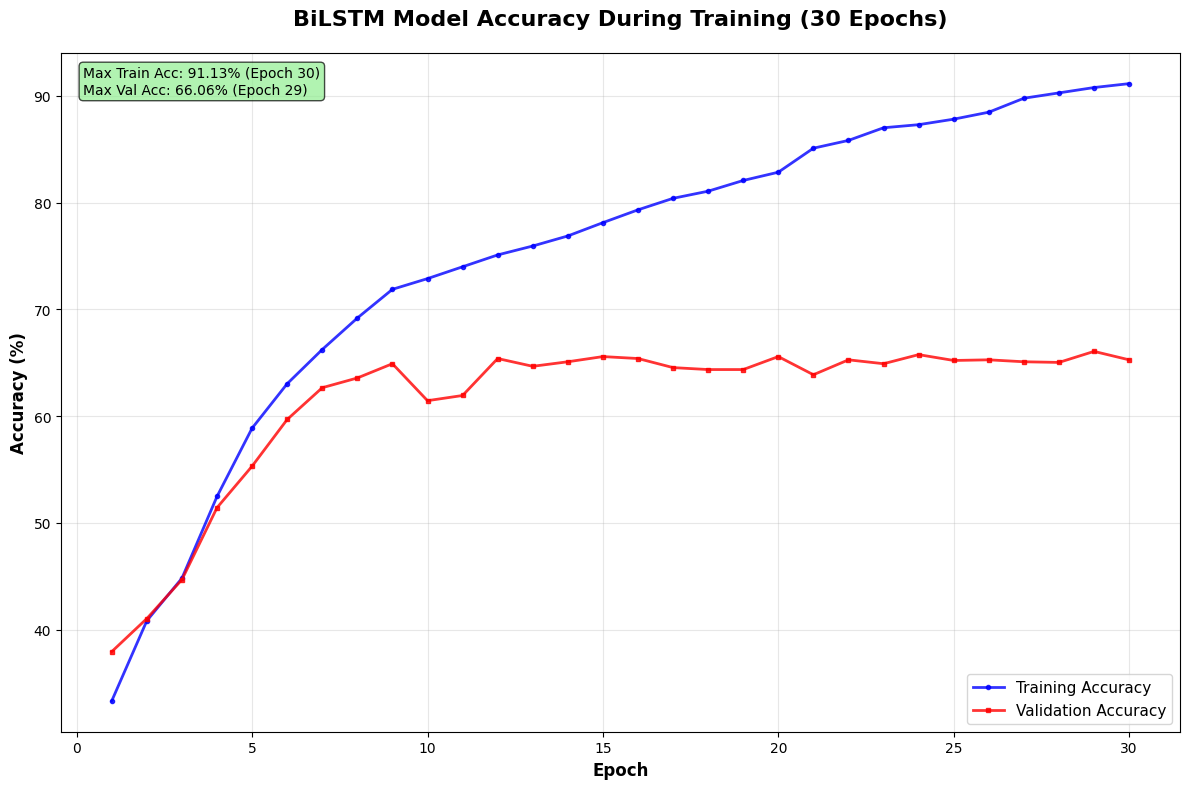

Membuat plot learning rate...


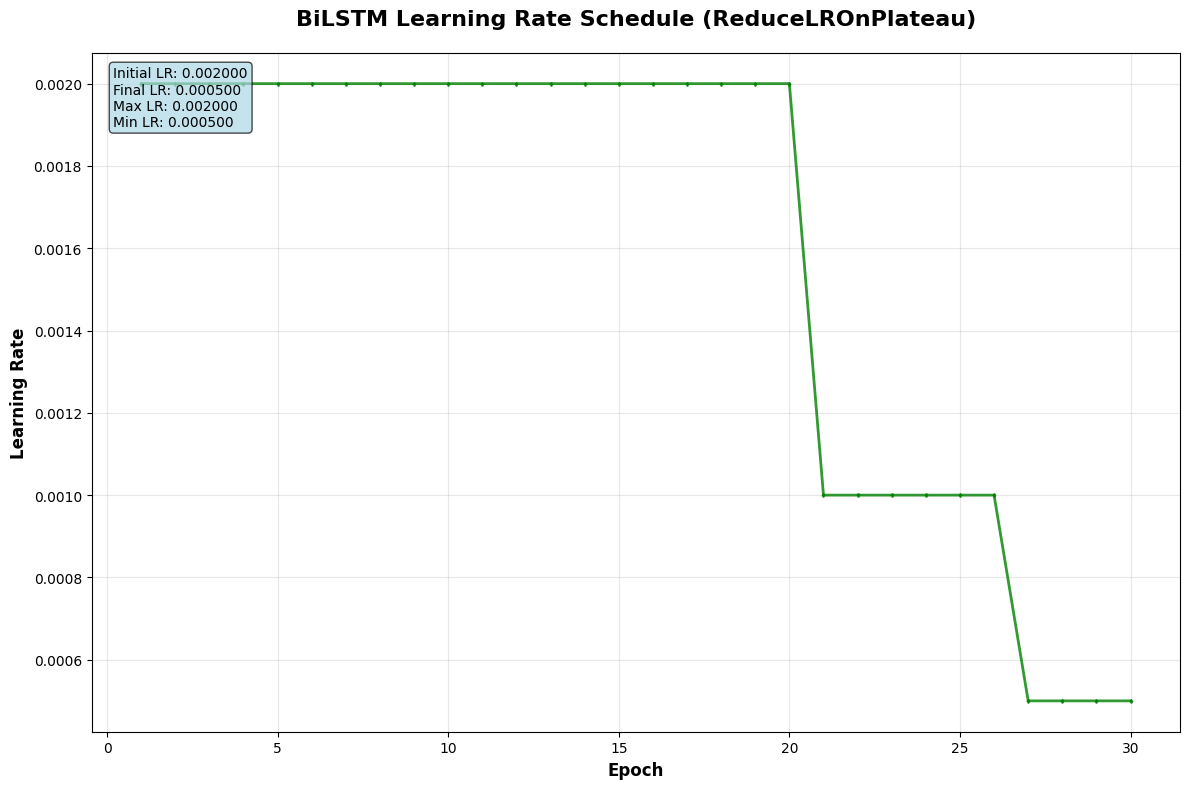

Semua visualisasi training BiLSTM berhasil disimpan!

MENYIMPAN MODEL BiLSTM
Model BiLSTM disimpan: bilstm_model.pth, bilstm_model_complete.pth
 Training history disimpan: bilstm_training_history.json
 Evaluation results disimpan: bilstm_evaluation_results.json

STEP 15 - TRAINING MODEL BiLSTM SELESAI!
Ringkasan Konfigurasi Baru:
- Model: BiLSTM dengan 64 hidden units, 1 layer
- Tipe: Bidirectional LSTM
- Aktivasi: tanh (default)
- Best accuracy: 66.06%
- Training time: 22.4 seconds (0.4 minutes)
- Total parameters: 85,766

Hyperparameters:
- Input Size: 100
- Hidden Size: 64
- Num Layers: 1
- Num Classes: 6
- Dropout: 0.2
- Learning Rate: 0.002
- Batch Size: 64
- Epochs: 30
- Weight Decay: 0.0001
- Gradient Clipping: 1.0
- Optimizer: ADAM
- Scheduler: ReduceLROnPlateau
- Loss Function: CrossEntropyLoss

File output:
- bilstm_model.pth
- bilstm_model_complete.pth
- bilstm_training_history.json
- bilstm_evaluation_results.json
- bilstm_loss_plot.png
- bilstm_accuracy_plot.png
- bilstm_l

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device yang digunakan: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

def load_training_data():
    
    # Load data yang sudah diproses dari step sebelumnya
    print(f"{'='*60}")
    print("LOADING TRAINING DATA")
    print(f"{'='*60}")
    
    try:
        # Load tensors
        X_train_tensor = torch.load('X_train_tensor.pt')
        X_test_tensor = torch.load('X_test_tensor.pt')
        y_train_tensor = torch.load('y_train_tensor.pt')
        y_test_tensor = torch.load('y_test_tensor.pt')
        
        print(f" Tensors loaded:")
        print(f"   X_train shape: {X_train_tensor.shape}")
        print(f"   X_test shape: {X_test_tensor.shape}")
        print(f"   y_train shape: {y_train_tensor.shape}")
        print(f"   y_test shape: {y_test_tensor.shape}")
        
        # Load label encoder
        with open('label_encoder.pkl', 'rb') as f:
            label_encoder = pickle.load(f)
        print(f" Label encoder loaded: {len(label_encoder.classes_)} classes")
        print(f" Classes: {list(label_encoder.classes_)}")
        
        # Load metadata
        with open('processing_metadata.json', 'r', encoding='utf-8') as f:
            metadata = json.load(f)
        print(f" Processing metadata loaded")
        
        return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, label_encoder, metadata
        
    except FileNotFoundError as e:
        print(f" File tidak ditemukan: {e}")
        print("Pastikan Step 13 sudah dijalankan dengan benar")
        return None, None, None, None, None, None
    except Exception as e:
        print(f" Error loading data: {str(e)}")
        return None, None, None, None, None, None

# ===================================================================
# DEFINISI MODEL BiLSTM DENGAN KONFIGURASI BARU
# ===================================================================

class SimpleBiLSTMClassifier(nn.Module):
    
    # Model BiLSTM untuk klasifikasi emosi teks dengan konfigurasi baru
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.2):
        super(SimpleBiLSTMClassifier, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_classes = num_classes
        
        # BiLSTM Layer dengan konfigurasi baru
        self.bilstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,  # Dropout hanya jika lebih dari 1 layer
            bidirectional=True  # Bidirectional LSTM
        )
        
        # Dropout untuk regularisasi
        self.dropout = nn.Dropout(dropout)
        
        # Fully Connected Layer untuk output
        # BiLSTM menghasilkan hidden_size * 2 karena bidirectional
        self.fc = nn.Linear(hidden_size * 2, num_classes)
        
        # Inisialisasi weights
        self._init_weights()
    
    def _init_weights(self):
        # Inisialisasi weights yang baik untuk training
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)
    
    def forward(self, x):
        # Initialize hidden state dengan zeros
        batch_size = x.size(0)
        # BiLSTM membutuhkan num_layers * 2 karena bidirectional
        h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)
        
        # Forward pass melalui BiLSTM
        bilstm_out, _ = self.bilstm(x, (h0, c0))
        
        # Ambil output dari timestep terakhir
        # bilstm_out shape: (batch_size, seq_len, hidden_size * 2)
        last_output = bilstm_out[:, -1, :]
        
        # Apply dropout
        dropped_output = self.dropout(last_output)
        
        # Pass ke fully connected layer
        output = self.fc(dropped_output)
        
        return output

def count_parameters(model):
    # Hitung jumlah parameter model
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

# ===================================================================
# SETUP HYPERPARAMETERS DAN MODEL
# ===================================================================

def setup_bilstm_model(input_size, num_classes):
    
    # Setup model BiLSTM dengan hyperparameters baru sesuai spesifikasi
    print(f"\n{'='*60}")
    print("SETUP MODEL BiLSTM")
    print(f"{'='*60}")
    
    # Hyperparameters BiLSTM (KONFIGURASI BARU SESUAI SPESIFIKASI)
    BILSTM_PARAMS = {
        'input_size': 100,  # Dimensi fitur sesuai spesifikasi
        'hidden_size': 64,  # Unit tersembunyi
        'num_layers': 1,  # Jumlah lapisan
        'num_classes': 6,  # Jumlah kelas
        'dropout': 0.2,  # Dropout rate
        'learning_rate': 0.002,  # Learning rate
        'batch_size': 64,  # Batch size
        'num_epochs': 30,  # Jumlah epoch
        'weight_decay': 0.0001,  # Weight decay (L2 regularization)
        'optimizer': 'adam',  # Optimizer
        'scheduler': 'reduce_lr_on_plateau',  # Scheduler type
        'gradient_clipping': 1.0  # Max norm untuk gradient clipping
    }
    
    print(f"BiLSTM Hyperparameters (Sesuai Spesifikasi):")
    for key, value in BILSTM_PARAMS.items():
        print(f"  {key}: {value}")
    
    # Inisialisasi model
    model = SimpleBiLSTMClassifier(
        input_size=BILSTM_PARAMS['input_size'],
        hidden_size=BILSTM_PARAMS['hidden_size'],
        num_layers=BILSTM_PARAMS['num_layers'],
        num_classes=BILSTM_PARAMS['num_classes'],
        dropout=BILSTM_PARAMS['dropout']
    ).to(device)
    
    # Hitung parameter
    total_params, trainable_params = count_parameters(model)
    print(f"\nModel Architecture:")
    print(f"  Total parameters: {total_params:,}")
    print(f"  Trainable parameters: {trainable_params:,}")
    print(f"  Tipe: Bidirectional LSTM")
    print(f"  Aktivasi: tanh (default LSTM)")
    
    return model, BILSTM_PARAMS

# ===================================================================
# TRAINING FUNCTIONS
# ===================================================================

def create_data_loaders(X_train, X_val, y_train, y_val, batch_size):
    
    # Buat DataLoader untuk training dan validation
    # Training DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Validation DataLoader
    val_dataset = TensorDataset(X_val, y_val)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    print(f"\nDataLoader Setup:")
    print(f"  Training batches: {len(train_loader)}")
    print(f"  Validation batches: {len(val_loader)}")
    print(f"  Batch size: {batch_size}")
    
    return train_loader, val_loader

def train_bilstm_model(model, train_loader, val_loader, params, label_encoder):
    
    # Training function untuk model BiLSTM dengan konfigurasi baru
    print(f"\n{'='*60}")
    print("MEMULAI TRAINING MODEL BiLSTM")
    print(f"{'='*60}")
    
    # Setup loss function - CrossEntropyLoss tanpa label smoothing
    criterion = nn.CrossEntropyLoss()
    print(f" Using CrossEntropyLoss")
    
    # Setup optimizer Adam sesuai spesifikasi
    optimizer = optim.Adam(
        model.parameters(), 
        lr=params['learning_rate'],
        weight_decay=params['weight_decay']
    )
    print(f" Using Adam optimizer")
    print(f"   Learning Rate: {params['learning_rate']}")
    print(f"   Weight Decay: {params['weight_decay']}")
    
    # Setup ReduceLROnPlateau scheduler sesuai spesifikasi
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        mode='min', 
        patience=5,  # Patience untuk ReduceLROnPlateau
        factor=0.5, 
        verbose=True,
        min_lr=1e-6
    )
    print(f" Using ReduceLROnPlateau scheduler")
    print(f"   Patience: 5, Factor: 0.5, Min LR: 1e-6")
    
    # Tracking metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    learning_rates = []
    
    best_val_acc = 0.0
    best_model_state = None
    start_time = time.time()
    
    print(f"Training akan berjalan selama {params['num_epochs']} epochs...")
    print(f"Gradient Clipping Max Norm: {params['gradient_clipping']}")
    print("-" * 60)
    
    for epoch in range(params['num_epochs']):
        # ===================
        # TRAINING PHASE
        # ===================
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            output = model(data)
            loss = criterion(output, target)
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping sesuai spesifikasi
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=params['gradient_clipping'])
            
            # Update weights
            optimizer.step()
            
            # Statistics
            train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()
        
        # ===================
        # VALIDATION PHASE
        # ===================
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                
                val_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                val_total += target.size(0)
                val_correct += (predicted == target).sum().item()
        
        # Calculate metrics
        avg_train_loss = train_loss / len(train_loader)
        train_acc = 100. * train_correct / train_total
        avg_val_loss = val_loss / len(val_loader)
        val_acc = 100. * val_correct / val_total
        current_lr = optimizer.param_groups[0]['lr']
        
        # Store metrics
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_acc)
        learning_rates.append(current_lr)
        
        # Update scheduler dengan validation loss
        scheduler.step(avg_val_loss)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
        
        # Print progress setiap 5 epochs atau epoch penting
        if (epoch + 1) % 5 == 0 or epoch == 0 or epoch < 5:
            print(f'Epoch [{epoch+1:2d}/{params["num_epochs"]}] | '
                  f'Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}% | '
                  f'Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.2f}% | '
                  f'LR: {current_lr:.6f}')
    
    # Training selesai
    end_time = time.time()
    training_time = end_time - start_time
    
    # Load best model
    model.load_state_dict(best_model_state)
    
    print(f"\n{'='*60}")
    print("TRAINING MODEL BiLSTM SELESAI!")
    print(f"{'='*60}")
    print(f"Training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")
    print(f"Best validation accuracy: {best_val_acc:.2f}%")
    print(f"Final learning rate: {learning_rates[-1]:.6f}")
    print(f"Loss function: CrossEntropyLoss")
    print(f"Optimizer: {params['optimizer']} (LR: {params['learning_rate']}, WD: {params['weight_decay']})")
    print(f"Scheduler: ReduceLROnPlateau")
    
    return {
        'model': model,
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'learning_rates': learning_rates,
        'best_accuracy': best_val_acc,
        'training_time': training_time,
        'model_params': params
    }

def evaluate_bilstm_model(model, val_loader, label_encoder):
    
    # Evaluasi basic model BiLSTM
    print(f"\n{'='*60}")
    print("EVALUASI BASIC MODEL BiLSTM")
    print(f"{'='*60}")
    
    model.eval()
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    # Convert ke nama label
    pred_labels = label_encoder.inverse_transform(all_predictions)
    true_labels = label_encoder.inverse_transform(all_targets)
    
    # Basic accuracy calculation
    accuracy = accuracy_score(true_labels, pred_labels) * 100
    print(f" Model validation accuracy: {accuracy:.2f}%")
    print(f" Total predictions: {len(all_predictions)}")
    print(" Detailed evaluation akan tersedia di Step 16")
    
    return {
        'predictions': all_predictions,
        'targets': all_targets,
        'pred_labels': pred_labels,
        'true_labels': true_labels,
        'accuracy': accuracy
    }

def visualize_bilstm_training_separated(results):
    
    # Visualisasi hasil training BiLSTM
    print(f"\n Membuat visualisasi training BiLSTM terpisah...")
    epochs = range(1, len(results['train_losses']) + 1)
    
    # 1. Loss Plot
    print("Membuat plot loss...")
    plt.figure(figsize=(12, 8))
    plt.plot(epochs, results['train_losses'], 'b-', label='Training Loss', linewidth=2, marker='o', markersize=3, alpha=0.8)
    plt.plot(epochs, results['val_losses'], 'r-', label='Validation Loss', linewidth=2, marker='s', markersize=3, alpha=0.8)
    plt.title('BiLSTM Model Loss During Training (30 Epochs)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Loss', fontsize=12, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    
    # Tambahkan informasi minimum loss
    min_train_loss = min(results['train_losses'])
    min_val_loss = min(results['val_losses'])
    min_train_epoch = results['train_losses'].index(min_train_loss) + 1
    min_val_epoch = results['val_losses'].index(min_val_loss) + 1
    
    plt.text(0.02, 0.98, f'Min Train Loss: {min_train_loss:.4f} (Epoch {min_train_epoch})\nMin Val Loss: {min_val_loss:.4f} (Epoch {min_val_epoch})', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('bilstm_loss_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # 2. Accuracy Plot
    print("Membuat plot accuracy...")
    plt.figure(figsize=(12, 8))
    plt.plot(epochs, results['train_accuracies'], 'b-', label='Training Accuracy', linewidth=2, marker='o', markersize=3, alpha=0.8)
    plt.plot(epochs, results['val_accuracies'], 'r-', label='Validation Accuracy', linewidth=2, marker='s', markersize=3, alpha=0.8)
    plt.title('BiLSTM Model Accuracy During Training (30 Epochs)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    
    # Tambahkan informasi maximum accuracy
    max_train_acc = max(results['train_accuracies'])
    max_val_acc = max(results['val_accuracies'])
    max_train_epoch = results['train_accuracies'].index(max_train_acc) + 1
    max_val_epoch = results['val_accuracies'].index(max_val_acc) + 1
    
    plt.text(0.02, 0.98, f'Max Train Acc: {max_train_acc:.2f}% (Epoch {max_train_epoch})\nMax Val Acc: {max_val_acc:.2f}% (Epoch {max_val_epoch})', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('bilstm_accuracy_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # 3. Learning Rate Schedule
    print("Membuat plot learning rate...")
    plt.figure(figsize=(12, 8))
    plt.plot(epochs, results['learning_rates'], 'g-', linewidth=2, marker='d', markersize=2, alpha=0.8)
    plt.title('BiLSTM Learning Rate Schedule (ReduceLROnPlateau)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Learning Rate', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Tambahkan informasi learning rate
    initial_lr = results['learning_rates'][0]
    final_lr = results['learning_rates'][-1]
    max_lr = max(results['learning_rates'])
    min_lr = min(results['learning_rates'])
    
    plt.text(0.02, 0.98, f'Initial LR: {initial_lr:.6f}\nFinal LR: {final_lr:.6f}\nMax LR: {max_lr:.6f}\nMin LR: {min_lr:.6f}', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('bilstm_learning_rate_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    print("Semua visualisasi training BiLSTM berhasil disimpan!")

def save_bilstm_model(results, evaluation_results):
    
    # Simpan model BiLSTM dan hasil training
    print(f"\n{'='*60}")
    print("MENYIMPAN MODEL BiLSTM")
    print(f"{'='*60}")
    
    try:
        # Simpan model
        torch.save(results['model'].state_dict(), 'bilstm_model.pth')
        torch.save(results['model'], 'bilstm_model_complete.pth')
        print("Model BiLSTM disimpan: bilstm_model.pth, bilstm_model_complete.pth")
        
        # Simpan training history (convert numpy/torch types to Python native types)
        training_history = {
            'train_losses': [float(x) for x in results['train_losses']],
            'train_accuracies': [float(x) for x in results['train_accuracies']],
            'val_losses': [float(x) for x in results['val_losses']],
            'val_accuracies': [float(x) for x in results['val_accuracies']],
            'learning_rates': [float(x) for x in results['learning_rates']],
            'best_accuracy': float(results['best_accuracy']),
            'training_time': float(results['training_time']),
            'model_params': results['model_params']
        }
        
        with open('bilstm_training_history.json', 'w', encoding='utf-8') as f:
            json.dump(training_history, f, ensure_ascii=False, indent=2)
        print(" Training history disimpan: bilstm_training_history.json")
        
        # Simpan evaluation results (convert numpy types to Python native types)
        evaluation_data = {
            'predictions': [int(x) for x in evaluation_results['predictions']],
            'targets': [int(x) for x in evaluation_results['targets']],
            'accuracy': float(evaluation_results['accuracy'])
        }
        
        with open('bilstm_evaluation_results.json', 'w', encoding='utf-8') as f:
            json.dump(evaluation_data, f, ensure_ascii=False, indent=2)
        print(" Evaluation results disimpan: bilstm_evaluation_results.json")
        
    except Exception as e:
        print(f" Error saving model: {str(e)}")

def main():
    
    # Main function untuk menjalankan training BiLSTM
    print("MEMULAI STEP 15 - TRAINING MODEL BiLSTM")
    print("="*60)
    
    # Load data
    X_train, X_test, y_train, y_test, label_encoder, metadata = load_training_data()
    
    if not all(x is not None for x in [X_train, X_test, y_train, y_test, label_encoder, metadata]):
        print("❌ Tidak dapat melanjutkan tanpa data dari step sebelumnya")
        return
    
    try:
        # Setup model BiLSTM
        input_size = X_train.shape[2]  # Feature dimension dari Word2Vec
        num_classes = len(label_encoder.classes_)
        
        bilstm_model, bilstm_params = setup_bilstm_model(input_size, num_classes)
        
        # Create data loaders
        train_loader, val_loader = create_data_loaders(
            X_train, X_test, y_train, y_test, bilstm_params['batch_size']
        )
        
        # Training model
        training_results = train_bilstm_model(
            model=bilstm_model,
            train_loader=train_loader,
            val_loader=val_loader,
            params=bilstm_params,
            label_encoder=label_encoder
        )
        
        # Evaluasi model
        evaluation_results = evaluate_bilstm_model(
            model=bilstm_model,
            val_loader=val_loader,
            label_encoder=label_encoder
        )
        
        # Visualisasi hasil (dipisah 1 per 1)
        visualize_bilstm_training_separated(training_results)
        
        # Simpan model dan hasil
        save_bilstm_model(training_results, evaluation_results)
        
        print(f"\n{'='*60}")
        print("STEP 15 - TRAINING MODEL BiLSTM SELESAI!")
        print(f"{'='*60}")
        print(f"Ringkasan Konfigurasi Baru:")
        print(f"- Model: BiLSTM dengan {bilstm_params['hidden_size']} hidden units, {bilstm_params['num_layers']} layer")
        print(f"- Tipe: Bidirectional LSTM")
        print(f"- Aktivasi: tanh (default)")
        print(f"- Best accuracy: {training_results['best_accuracy']:.2f}%")
        print(f"- Training time: {training_results['training_time']:.1f} seconds ({training_results['training_time']/60:.1f} minutes)")
        print(f"- Total parameters: {sum(p.numel() for p in bilstm_model.parameters()):,}")
        print(f"\nHyperparameters:")
        print(f"- Input Size: {bilstm_params['input_size']}")
        print(f"- Hidden Size: {bilstm_params['hidden_size']}")
        print(f"- Num Layers: {bilstm_params['num_layers']}")
        print(f"- Num Classes: {bilstm_params['num_classes']}")
        print(f"- Dropout: {bilstm_params['dropout']}")
        print(f"- Learning Rate: {bilstm_params['learning_rate']}")
        print(f"- Batch Size: {bilstm_params['batch_size']}")
        print(f"- Epochs: {bilstm_params['num_epochs']}")
        print(f"- Weight Decay: {bilstm_params['weight_decay']}")
        print(f"- Gradient Clipping: {bilstm_params['gradient_clipping']}")
        print(f"- Optimizer: {bilstm_params['optimizer'].upper()}")
        print(f"- Scheduler: ReduceLROnPlateau")
        print(f"- Loss Function: CrossEntropyLoss")
        print(f"\nFile output:")
        print(f"- bilstm_model.pth")
        print(f"- bilstm_model_complete.pth")
        print(f"- bilstm_training_history.json")
        print(f"- bilstm_evaluation_results.json")
        print(f"- bilstm_loss_plot.png")
        print(f"- bilstm_accuracy_plot.png")
        print(f"- bilstm_learning_rate_plot.png")
        print(f"\n✅ Model BiLSTM telah berhasil dilatih dengan konfigurasi baru!")
        print(f"✅ Model siap untuk evaluasi dan perbandingan!")
        
    except Exception as e:
        print(f" Error dalam training BiLSTM: {str(e)}")

# ============================================
# JALANKAN TRAINING MODEL BiLSTM
# ============================================
if __name__ == "__main__":
    main()

# STEP 16: EVALUASI KINERJA MODEL RNN DAN BiLSTM PADA DATA TEST


STEP 16: EVALUASI KINERJA MODEL RNN DAN BiLSTM PADA DATA TEST
Device yang digunakan: cuda

 LOADING TEST DATA...
 Test data loaded:
   X_test shape: torch.Size([1647, 28, 100])
   y_test shape: torch.Size([1647])
   Classes: ['Anger', 'Fear', 'Joy', 'Love', 'Neutral', 'Sad']

 LOADING TRAINED MODELS...
 RNN model loaded (dengan Self-Attention + Layer Normalization)
 BiLSTM model loaded (Bidirectional LSTM)
 Training histories loaded
 RNN Konfigurasi: Hidden=128, Layers=2, Features=Self-Attention+LayerNorm
 BiLSTM Konfigurasi: Hidden=64, Layers=1, Bidirectional=True
 Test DataLoader created: 26 batches (batch_size=64)

 MEMULAI EVALUASI KOMPREHENSIF...

 Evaluasi model RNN (Self-Attention + LayerNorm) pada data test...
--------------------------------------------------
 Evaluasi RNN (Self-Attention + LayerNorm) selesai!
 Test Accuracy: 0.6126 (61.26%)
 Precision (Macro): 0.6204
 Recall (Macro): 0.6059
 F1-Score (Macro): 0.6123

 Evaluasi model BiLSTM (64H-1L-Bidirectional) pada data te

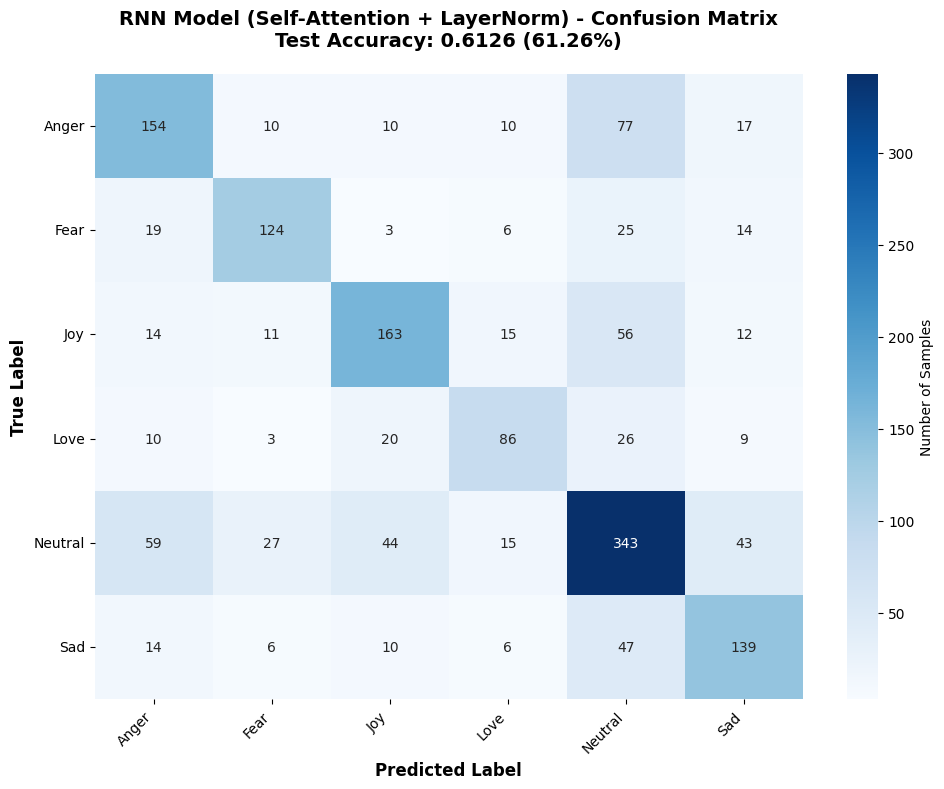

RNN confusion matrix saved: rnn_confusion_matrix.png


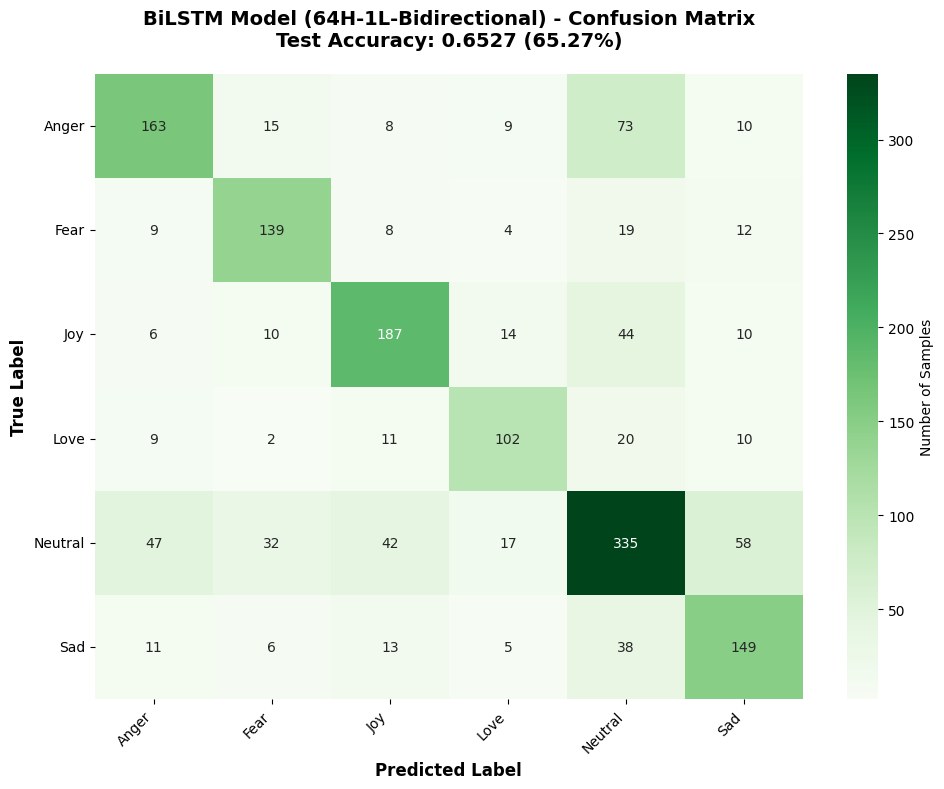

BiLSTM confusion matrix saved: bilstm_confusion_matrix.png

 VISUALISASI CONFUSION MATRIX TELAH DIBUAT!
 Output files:
   - rnn_confusion_matrix.png
   - bilstm_confusion_matrix.png

 PLOTTING METRICS COMPARISON...


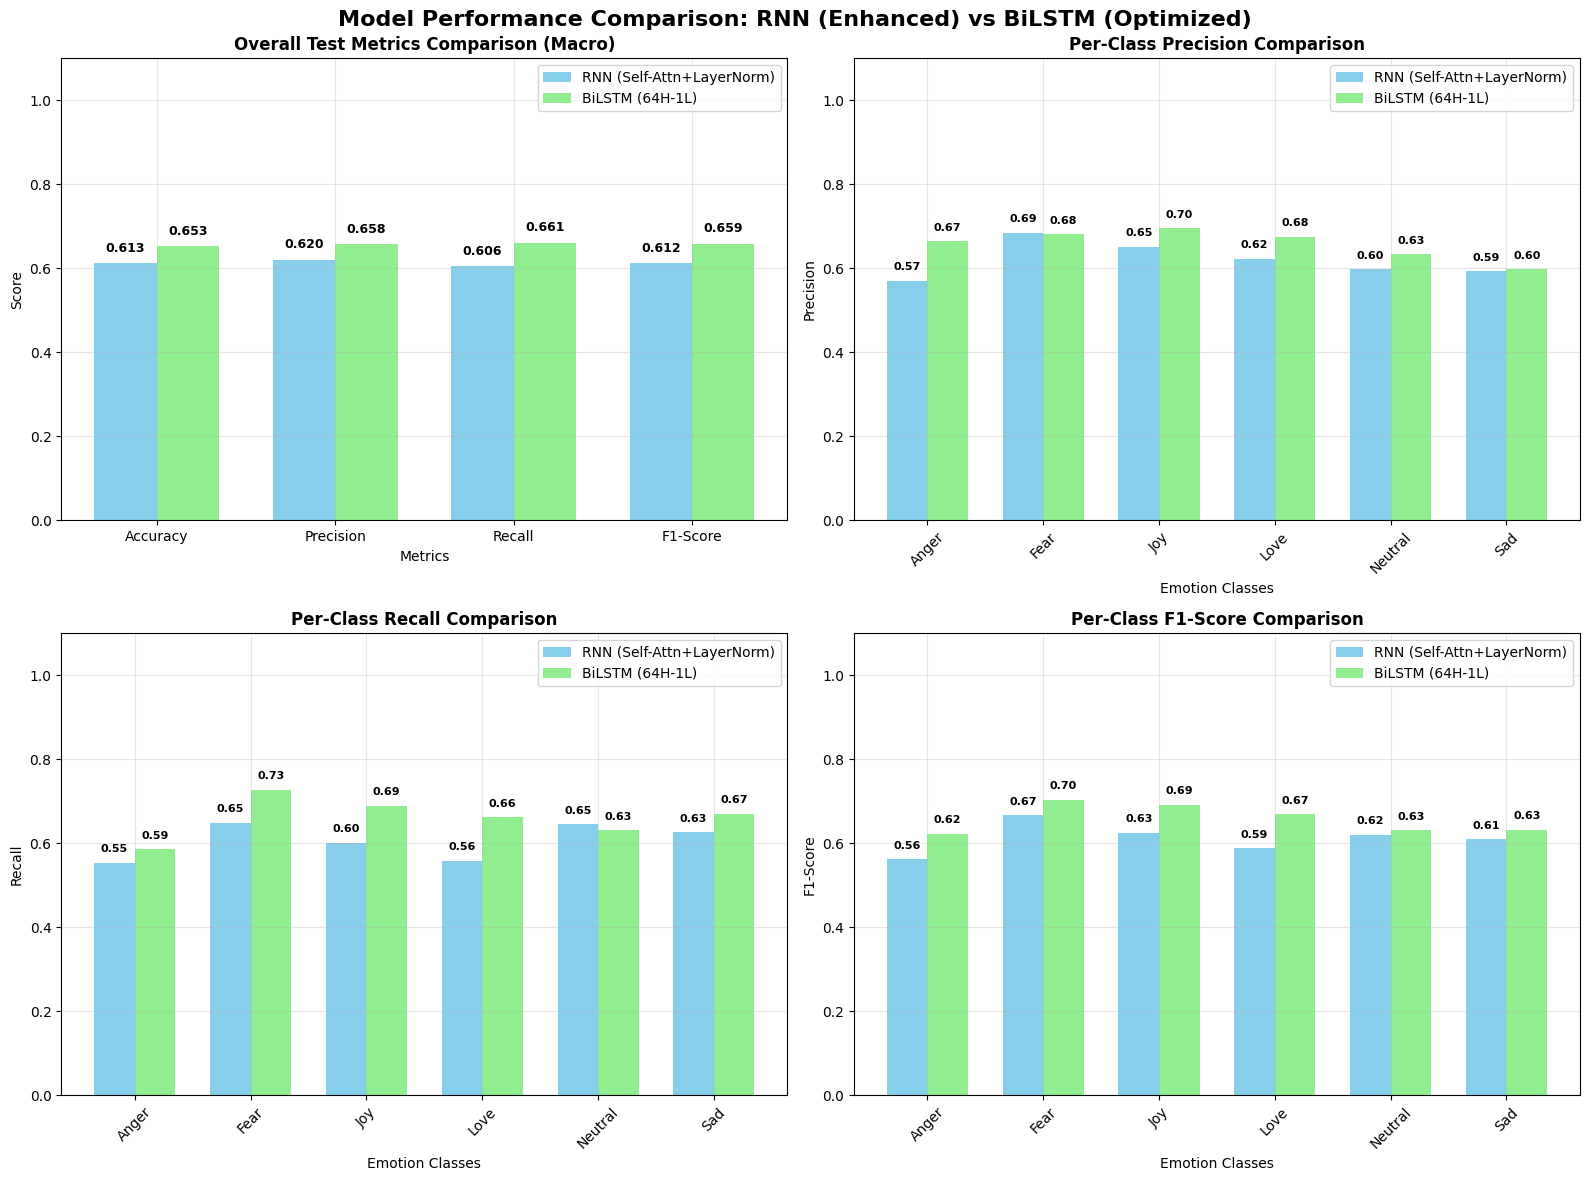

Metrics comparison saved: model_metrics_comparison.png

 DETAILED CLASSIFICATION REPORTS

 RNN (SELF-ATTENTION + LAYER NORMALIZATION) CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

       Anger       0.57      0.55      0.56       278
        Fear       0.69      0.65      0.67       191
         Joy       0.65      0.60      0.63       271
        Love       0.62      0.56      0.59       154
     Neutral       0.60      0.65      0.62       531
         Sad       0.59      0.63      0.61       222

    accuracy                           0.61      1647
   macro avg       0.62      0.61      0.61      1647
weighted avg       0.61      0.61      0.61      1647


 BiLSTM (64H-1L-BIDIRECTIONAL) CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

       Anger       0.67      0.59      0.62       278
        Fear  

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*70)
print("STEP 16: EVALUASI KINERJA MODEL RNN DAN BiLSTM PADA DATA TEST")
print("="*70)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device yang digunakan: {device}")

# ===================================================================
# LOAD DATA DAN MODEL
# ===================================================================

def load_test_data():
    
    # Load data test yang sudah diproses
    print(f"\n LOADING TEST DATA...")
    try:
        # Load test tensors
        X_test_tensor = torch.load('X_test_tensor.pt')
        y_test_tensor = torch.load('y_test_tensor.pt')
        
        # Load label encoder
        with open('label_encoder.pkl', 'rb') as f:
            label_encoder = pickle.load(f)
        
        print(f" Test data loaded:")
        print(f"   X_test shape: {X_test_tensor.shape}")
        print(f"   y_test shape: {y_test_tensor.shape}")
        print(f"   Classes: {list(label_encoder.classes_)}")
        
        return X_test_tensor, y_test_tensor, label_encoder
        
    except FileNotFoundError as e:
        print(f"❌ File tidak ditemukan: {e}")
        return None, None, None

def load_trained_models():
    
    # Load model RNN dan BiLSTM yang sudah dilatih dengan konfigurasi baru
    print(f"\n LOADING TRAINED MODELS...")
    try:
        # Define model architectures sesuai konfigurasi baru
        from torch import nn
        
        # ===================================================================
        # RNN MODEL DENGAN KONFIGURASI BARU (Self-Attention + Layer Norm)
        # ===================================================================
        class SelfAttention(nn.Module):
            """Self-Attention mechanism untuk RNN"""
            def __init__(self, hidden_size):
                super(SelfAttention, self).__init__()
                self.hidden_size = hidden_size
                self.attention = nn.Linear(hidden_size, 1)
                
            def forward(self, rnn_output):
                # rnn_output shape: (batch_size, seq_len, hidden_size)
                attention_weights = torch.softmax(self.attention(rnn_output), dim=1)
                # attention_weights shape: (batch_size, seq_len, 1)
                
                # Weighted sum
                context_vector = torch.sum(attention_weights * rnn_output, dim=1)
                # context_vector shape: (batch_size, hidden_size)
                
                return context_vector, attention_weights

        class RNNClassifier(nn.Module):
            def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.3):
                super(RNNClassifier, self).__init__()
                self.hidden_size = hidden_size
                self.num_layers = num_layers
                self.num_classes = num_classes
                
                # RNN Layer dengan dropout
                self.rnn = nn.RNN(
                    input_size=input_size,
                    hidden_size=hidden_size,
                    num_layers=num_layers,
                    batch_first=True,
                    dropout=dropout if num_layers > 1 else 0,
                    nonlinearity='tanh'  # Aktivasi tanh untuk RNN
                )
                
                # Self-Attention mechanism
                self.self_attention = SelfAttention(hidden_size)
                
                # Layer Normalization
                self.layer_norm = nn.LayerNorm(hidden_size)
                
                # Dropout untuk regularisasi
                self.dropout = nn.Dropout(dropout)
                
                # Fully Connected Layer untuk output
                self.fc = nn.Linear(hidden_size, num_classes)
            
            def forward(self, x):
                # Initialize hidden state dengan zeros
                batch_size = x.size(0)
                h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
                
                # Forward pass melalui RNN
                rnn_out, _ = self.rnn(x, h0)
                
                # Self-Attention untuk mendapatkan representation yang lebih baik
                context_vector, attention_weights = self.self_attention(rnn_out)
                
                # Apply Layer Normalization
                normalized_output = self.layer_norm(context_vector)
                
                # Apply dropout
                dropped_output = self.dropout(normalized_output)
                
                # Pass ke fully connected layer
                output = self.fc(dropped_output)
                
                return output
        
        # ===================================================================
        # BiLSTM MODEL DENGAN KONFIGURASI BARU
        # ===================================================================
        class SimpleBiLSTMClassifier(nn.Module):
            def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.2):
                super(SimpleBiLSTMClassifier, self).__init__()
                self.hidden_size = hidden_size
                self.num_layers = num_layers
                self.num_classes = num_classes
                
                # BiLSTM Layer dengan konfigurasi baru
                self.bilstm = nn.LSTM(
                    input_size=input_size,
                    hidden_size=hidden_size,
                    num_layers=num_layers,
                    batch_first=True,
                    dropout=dropout if num_layers > 1 else 0,  # Dropout hanya jika lebih dari 1 layer
                    bidirectional=True  # Bidirectional LSTM
                )
                
                # Dropout untuk regularisasi
                self.dropout = nn.Dropout(dropout)
                
                # Fully Connected Layer untuk output
                # BiLSTM menghasilkan hidden_size * 2 karena bidirectional
                self.fc = nn.Linear(hidden_size * 2, num_classes)
            
            def forward(self, x):
                # Initialize hidden state dengan zeros
                batch_size = x.size(0)
                # BiLSTM membutuhkan num_layers * 2 karena bidirectional
                h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)
                c0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)
                
                # Forward pass melalui BiLSTM
                bilstm_out, _ = self.bilstm(x, (h0, c0))
                
                # Ambil output dari timestep terakhir
                # bilstm_out shape: (batch_size, seq_len, hidden_size * 2)
                last_output = bilstm_out[:, -1, :]
                
                # Apply dropout
                dropped_output = self.dropout(last_output)
                
                # Pass ke fully connected layer
                output = self.fc(dropped_output)
                
                return output
        
        # Load training parameters to reconstruct models sesuai konfigurasi baru
        with open('rnn_training_history.json', 'r') as f:
            rnn_training_results = json.load(f)
        
        with open('bilstm_training_history.json', 'r') as f:
            bilstm_training_results = json.load(f)
        
        # Reconstruct models dengan parameter yang benar
        rnn_params = rnn_training_results['model_params']
        bilstm_params = bilstm_training_results['model_params']
        
        # Create RNN model dengan konfigurasi baru dan load weights
        rnn_model = RNNClassifier(
            input_size=rnn_params['input_size'],  # 100
            hidden_size=rnn_params['hidden_size'],  # 128
            num_layers=rnn_params['num_layers'],  # 2
            num_classes=rnn_params['num_classes'],  # 6
            dropout=rnn_params['dropout']  # 0.3
        ).to(device)
        
        # Load state dict safely
        rnn_state_dict = torch.load('rnn_model.pth', map_location=device, weights_only=True)
        rnn_model.load_state_dict(rnn_state_dict)
        rnn_model.eval()
        print(" RNN model loaded (dengan Self-Attention + Layer Normalization)")
        
        # Create BiLSTM model dengan konfigurasi baru dan load weights
        bilstm_model = SimpleBiLSTMClassifier(
            input_size=bilstm_params['input_size'],  # 100
            hidden_size=bilstm_params['hidden_size'],  # 64
            num_layers=bilstm_params['num_layers'],  # 1
            num_classes=bilstm_params['num_classes'],  # 6
            dropout=bilstm_params['dropout']  # 0.2
        ).to(device)
        
        # Load state dict safely
        bilstm_state_dict = torch.load('bilstm_model.pth', map_location=device, weights_only=True)
        bilstm_model.load_state_dict(bilstm_state_dict)
        bilstm_model.eval()
        print(" BiLSTM model loaded (Bidirectional LSTM)")
        
        print(" Training histories loaded")
        print(f" RNN Konfigurasi: Hidden={rnn_params['hidden_size']}, Layers={rnn_params['num_layers']}, Features=Self-Attention+LayerNorm")
        print(f" BiLSTM Konfigurasi: Hidden={bilstm_params['hidden_size']}, Layers={bilstm_params['num_layers']}, Bidirectional=True")
        
        return rnn_model, bilstm_model, rnn_training_results, bilstm_training_results
        
    except FileNotFoundError as e:
        print(f" Model files tidak ditemukan: {e}")
        print(" Pastikan Step 14 dan Step 15 sudah dijalankan")
        return None, None, None, None
    except Exception as e:
        print(f" Error loading models: {e}")
        print(" Trying alternative loading method...")
        
        try:
            # Alternative method - load complete models with weights_only=False
            print(" Loading complete models (less secure but compatible)...")
            rnn_model = torch.load('rnn_model_complete.pth', map_location=device, weights_only=False)
            rnn_model.eval()
            print(" RNN model loaded (alternative method)")
            
            bilstm_model = torch.load('bilstm_model_complete.pth', map_location=device, weights_only=False)
            bilstm_model.eval()
            print(" BiLSTM model loaded (alternative method)")
            
            # Load training results
            with open('rnn_training_history.json', 'r') as f:
                rnn_training_results = json.load(f)
            
            with open('bilstm_training_history.json', 'r') as f:
                bilstm_training_results = json.load(f)
            
            return rnn_model, bilstm_model, rnn_training_results, bilstm_training_results
            
        except Exception as e2:
            print(f" Alternative loading failed: {e2}")
            return None, None, None, None

# Load data dan models
X_test, y_test, label_encoder = load_test_data()
rnn_model, bilstm_model, rnn_training_results, bilstm_training_results = load_trained_models()

if any(x is None for x in [X_test, y_test, label_encoder, rnn_model, bilstm_model]):
    print("❌ Tidak dapat melanjutkan evaluasi tanpa data dan model")
    exit()

# Create test DataLoader dengan batch size yang disesuaikan
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # Disesuaikan dengan BiLSTM batch size
print(f" Test DataLoader created: {len(test_loader)} batches (batch_size=64)")

# ===================================================================
# FUNGSI EVALUASI MODEL
# ===================================================================

def evaluate_model_on_test(model, test_loader, label_encoder, device, model_name):
    
    # Evaluasi komprehensif model pada data test
    print(f"\n Evaluasi model {model_name} pada data test...")
    print("-" * 50)
    
    model.eval()
    all_predictions = []
    all_true_labels = []
    all_probabilities = []
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            probabilities = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_true_labels.extend(target.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())
    
    # Convert to numpy arrays
    y_true = np.array(all_true_labels)
    y_pred = np.array(all_predictions)
    y_prob = np.array(all_probabilities)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    
    precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Per-class metrics
    precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
    recall_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)
    
    # Classification report
    class_names = label_encoder.classes_
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    print(f" Evaluasi {model_name} selesai!")
    print(f" Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f" Precision (Macro): {precision_macro:.4f}")
    print(f" Recall (Macro): {recall_macro:.4f}")
    print(f" F1-Score (Macro): {f1_macro:.4f}")
    
    return {
        'model_name': model_name,
        'y_true': y_true,
        'y_pred': y_pred,
        'y_prob': y_prob,
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class,
        'classification_report': report,
        'confusion_matrix': cm,
        'class_names': class_names
    }

# ===================================================================
# EVALUASI KEDUA MODEL
# ===================================================================

print(f"\n MEMULAI EVALUASI KOMPREHENSIF...")

# Evaluasi RNN Model dengan fitur baru
rnn_evaluation = evaluate_model_on_test(
    model=rnn_model,
    test_loader=test_loader,
    label_encoder=label_encoder,
    device=device,
    model_name="RNN (Self-Attention + LayerNorm)"
)

# Evaluasi BiLSTM Model dengan konfigurasi baru
bilstm_evaluation = evaluate_model_on_test(
    model=bilstm_model,
    test_loader=test_loader,
    label_encoder=label_encoder,
    device=device,
    model_name="BiLSTM (64H-1L-Bidirectional)"
)

# ===================================================================
# VISUALISASI CONFUSION MATRIX
# ===================================================================

def plot_separate_confusion_matrices(rnn_eval, bilstm_eval):
    
    # Plot confusion matrices terpisah untuk kedua model
    print(f"\n PLOTTING SEPARATE CONFUSION MATRICES...")
    
    class_names = rnn_eval['class_names']
    
    # 1. RNN Confusion Matrix dengan fitur baru
    plt.figure(figsize=(10, 8))
    sns.heatmap(rnn_eval['confusion_matrix'], 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Number of Samples'})
    
    rnn_title = f'RNN Model (Self-Attention + LayerNorm) - Confusion Matrix\nTest Accuracy: {rnn_eval["accuracy"]:.4f} ({rnn_eval["accuracy"]*100:.2f}%)'
    plt.title(rnn_title, fontweight='bold', fontsize=14, pad=20)
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Add grid for better readability
    plt.grid(False)
    
    plt.tight_layout()
    plt.savefig('rnn_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("RNN confusion matrix saved: rnn_confusion_matrix.png")
    
    # 2. BiLSTM Confusion Matrix dengan konfigurasi baru
    plt.figure(figsize=(10, 8))
    sns.heatmap(bilstm_eval['confusion_matrix'], 
                annot=True, fmt='d', cmap='Greens',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Number of Samples'})
    
    bilstm_title = f'BiLSTM Model (64H-1L-Bidirectional) - Confusion Matrix\nTest Accuracy: {bilstm_eval["accuracy"]:.4f} ({bilstm_eval["accuracy"]*100:.2f}%)'
    plt.title(bilstm_title, fontweight='bold', fontsize=14, pad=20)
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Add grid for better readability
    plt.grid(False)
    
    plt.tight_layout()
    plt.savefig('bilstm_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("BiLSTM confusion matrix saved: bilstm_confusion_matrix.png")

# Plot confusion matrices
plot_separate_confusion_matrices(rnn_evaluation, bilstm_evaluation)

print(f"\n VISUALISASI CONFUSION MATRIX TELAH DIBUAT!")
print(f" Output files:")
print(f"   - rnn_confusion_matrix.png")
print(f"   - bilstm_confusion_matrix.png")

# ===================================================================
# VISUALISASI PERBANDINGAN METRICS
# ===================================================================

def plot_metrics_comparison(rnn_eval, bilstm_eval):
    
    # Plot perbandingan metrics kedua model dengan label angka di atas bar
    print(f"\n PLOTTING METRICS COMPARISON...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    class_names = rnn_eval['class_names']
    
    # 1. Overall Metrics Comparison
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    rnn_scores = [rnn_eval['accuracy'], rnn_eval['precision_macro'], 
                  rnn_eval['recall_macro'], rnn_eval['f1_macro']]
    bilstm_scores = [bilstm_eval['accuracy'], bilstm_eval['precision_macro'], 
                     bilstm_eval['recall_macro'], bilstm_eval['f1_macro']]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    bars1 = axes[0, 0].bar(x - width/2, rnn_scores, width, label='RNN (Self-Attn+LayerNorm)', color='skyblue')
    bars2 = axes[0, 0].bar(x + width/2, bilstm_scores, width, label='BiLSTM (64H-1L)', color='lightgreen')
    
    axes[0, 0].set_xlabel('Metrics')
    axes[0, 0].set_ylabel('Score')
    axes[0, 0].set_title('Overall Test Metrics Comparison (Macro)', fontweight='bold')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(metrics)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_ylim(0, 1.1)  # Sedikit lebih tinggi untuk ruang label
    
    # Add value labels on bars - Overall Metrics
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        # RNN labels
        height1 = bar1.get_height()
        axes[0, 0].text(bar1.get_x() + bar1.get_width()/2., height1 + 0.02,
                       f'{height1:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # BiLSTM labels
        height2 = bar2.get_height()
        axes[0, 0].text(bar2.get_x() + bar2.get_width()/2., height2 + 0.02,
                       f'{height2:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # 2. Per-Class Precision
    x_pos = np.arange(len(class_names))
    bars1 = axes[0, 1].bar(x_pos - width/2, rnn_eval['precision_per_class'], width, 
                          label='RNN (Self-Attn+LayerNorm)', color='skyblue')
    bars2 = axes[0, 1].bar(x_pos + width/2, bilstm_eval['precision_per_class'], width, 
                          label='BiLSTM (64H-1L)', color='lightgreen')
    
    axes[0, 1].set_xlabel('Emotion Classes')
    axes[0, 1].set_ylabel('Precision')
    axes[0, 1].set_title('Per-Class Precision Comparison', fontweight='bold')
    axes[0, 1].set_xticks(x_pos)
    axes[0, 1].set_xticklabels(class_names, rotation=45)
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(0, 1.1)
    
    # Add value labels - Precision
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        height1 = bar1.get_height()
        axes[0, 1].text(bar1.get_x() + bar1.get_width()/2., height1 + 0.02,
                       f'{height1:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
        
        height2 = bar2.get_height()
        axes[0, 1].text(bar2.get_x() + bar2.get_width()/2., height2 + 0.02,
                       f'{height2:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    # 3. Per-Class Recall
    bars1 = axes[1, 0].bar(x_pos - width/2, rnn_eval['recall_per_class'], width, 
                          label='RNN (Self-Attn+LayerNorm)', color='skyblue')
    bars2 = axes[1, 0].bar(x_pos + width/2, bilstm_eval['recall_per_class'], width, 
                          label='BiLSTM (64H-1L)', color='lightgreen')
    
    axes[1, 0].set_xlabel('Emotion Classes')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].set_title('Per-Class Recall Comparison', fontweight='bold')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(class_names, rotation=45)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_ylim(0, 1.1)
    
    # Add value labels - Recall
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        height1 = bar1.get_height()
        axes[1, 0].text(bar1.get_x() + bar1.get_width()/2., height1 + 0.02,
                       f'{height1:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
        
        height2 = bar2.get_height()
        axes[1, 0].text(bar2.get_x() + bar2.get_width()/2., height2 + 0.02,
                       f'{height2:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    # 4. Per-Class F1-Score
    bars1 = axes[1, 1].bar(x_pos - width/2, rnn_eval['f1_per_class'], width, 
                          label='RNN (Self-Attn+LayerNorm)', color='skyblue')
    bars2 = axes[1, 1].bar(x_pos + width/2, bilstm_eval['f1_per_class'], width, 
                          label='BiLSTM (64H-1L)', color='lightgreen')
    
    axes[1, 1].set_xlabel('Emotion Classes')
    axes[1, 1].set_ylabel('F1-Score')
    axes[1, 1].set_title('Per-Class F1-Score Comparison', fontweight='bold')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(class_names, rotation=45)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_ylim(0, 1.1)
    
    # Add value labels - F1-Score
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        height1 = bar1.get_height()
        axes[1, 1].text(bar1.get_x() + bar1.get_width()/2., height1 + 0.02,
                       f'{height1:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
        
        height2 = bar2.get_height()
        axes[1, 1].text(bar2.get_x() + bar2.get_width()/2., height2 + 0.02,
                       f'{height2:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.suptitle('Model Performance Comparison: RNN (Enhanced) vs BiLSTM (Optimized)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('model_metrics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Metrics comparison saved: model_metrics_comparison.png")

# Plot metrics comparison
plot_metrics_comparison(rnn_evaluation, bilstm_evaluation)

# ===================================================================
# DETAILED CLASSIFICATION REPORTS
# ===================================================================

def print_detailed_reports(rnn_eval, bilstm_eval):
    
    # Print detailed classification reports
    print(f"\n DETAILED CLASSIFICATION REPORTS")
    print("=" * 70)
    
    # RNN Classification Report
    print(f"\n RNN (SELF-ATTENTION + LAYER NORMALIZATION) CLASSIFICATION REPORT:")
    print("-" * 60)
    print(classification_report(rnn_eval['y_true'], rnn_eval['y_pred'], 
                               target_names=rnn_eval['class_names']))
    
    # BiLSTM Classification Report
    print(f"\n BiLSTM (64H-1L-BIDIRECTIONAL) CLASSIFICATION REPORT:")
    print("-" * 60)
    print(classification_report(bilstm_eval['y_true'], bilstm_eval['y_pred'], 
                               target_names=bilstm_eval['class_names']))

# Print detailed reports
print_detailed_reports(rnn_evaluation, bilstm_evaluation)

# ===================================================================
# PERBANDINGAN METRICS DALAM TABEL
# ===================================================================

def create_comparison_table(rnn_eval, bilstm_eval):
    
    # Buat tabel perbandingan metrics
    print(f"\n TABEL PERBANDINGAN PERFORMANCE METRICS")
    print("=" * 90)
    
    # Overall metrics
    print(f"\n OVERALL TEST METRICS:")
    print("-" * 80)
    print(f"{'Metric':<25} {'RNN (Enhanced)':<20} {'BiLSTM (Optimized)':<20} {'Difference':<15}")
    print("-" * 80)
    
    metrics_data = [
        ('Accuracy', rnn_eval['accuracy'], bilstm_eval['accuracy']),
        ('Precision (Macro)', rnn_eval['precision_macro'], bilstm_eval['precision_macro']),
        ('Recall (Macro)', rnn_eval['recall_macro'], bilstm_eval['recall_macro']),
        ('F1-Score (Macro)', rnn_eval['f1_macro'], bilstm_eval['f1_macro']),
        ('Precision (Weighted)', rnn_eval['precision_weighted'], bilstm_eval['precision_weighted']),
        ('Recall (Weighted)', rnn_eval['recall_weighted'], bilstm_eval['recall_weighted']),
        ('F1-Score (Weighted)', rnn_eval['f1_weighted'], bilstm_eval['f1_weighted'])
    ]
    
    for metric, rnn_score, bilstm_score in metrics_data:
        diff = bilstm_score - rnn_score
        print(f"{metric:<25} {rnn_score:<20.4f} {bilstm_score:<20.4f} {diff:<+15.4f}")
    
    # Per-class metrics
    print(f"\n PER-CLASS TEST METRICS:")
    print("-" * 80)
    class_names = rnn_eval['class_names']
    
    print(f"\n{'Class':<12} {'Metric':<12} {'RNN (Enhanced)':<15} {'BiLSTM (Optimized)':<18} {'Difference':<12}")
    print("-" * 75)
    
    for i, class_name in enumerate(class_names):
        # Precision
        diff_prec = bilstm_eval['precision_per_class'][i] - rnn_eval['precision_per_class'][i]
        print(f"{class_name:<12} {'Precision':<12} {rnn_eval['precision_per_class'][i]:<15.3f} "
              f"{bilstm_eval['precision_per_class'][i]:<18.3f} {diff_prec:<+12.3f}")
        
        # Recall
        diff_recall = bilstm_eval['recall_per_class'][i] - rnn_eval['recall_per_class'][i]
        print(f"{'':<12} {'Recall':<12} {rnn_eval['recall_per_class'][i]:<15.3f} "
              f"{bilstm_eval['recall_per_class'][i]:<18.3f} {diff_recall:<+12.3f}")
        
        # F1-Score
        diff_f1 = bilstm_eval['f1_per_class'][i] - rnn_eval['f1_per_class'][i]
        print(f"{'':<12} {'F1-Score':<12} {rnn_eval['f1_per_class'][i]:<15.3f} "
              f"{bilstm_eval['f1_per_class'][i]:<18.3f} {diff_f1:<+12.3f}")
        print("-" * 75)

# Create comparison table
create_comparison_table(rnn_evaluation, bilstm_evaluation)

# ===================================================================
# ANALISIS KESALAHAN KLASIFIKASI
# ===================================================================

def analyze_misclassifications(rnn_eval, bilstm_eval):
    
    # Analisis kesalahan klasifikasi
    print(f"\n ANALISIS KESALAHAN KLASIFIKASI")
    print("=" * 70)
    
    class_names = rnn_eval['class_names']
    
    # RNN Misclassifications
    rnn_incorrect = rnn_eval['y_true'] != rnn_eval['y_pred']
    rnn_misclass_count = np.sum(rnn_incorrect)
    
    # BiLSTM Misclassifications
    bilstm_incorrect = bilstm_eval['y_true'] != bilstm_eval['y_pred']
    bilstm_misclass_count = np.sum(bilstm_incorrect)
    
    print(f"\n JUMLAH KESALAHAN KLASIFIKASI:")
    print(f"RNN (Enhanced): {rnn_misclass_count} dari {len(rnn_eval['y_true'])} sampel "
          f"({rnn_misclass_count/len(rnn_eval['y_true'])*100:.2f}%)")
    print(f"BiLSTM (Optimized): {bilstm_misclass_count} dari {len(bilstm_eval['y_true'])} sampel "
          f"({bilstm_misclass_count/len(bilstm_eval['y_true'])*100:.2f}%)")
    
    # Analisis per kelas kesalahan
    print(f"\n ANALISIS KESALAHAN PER KELAS:")
    print("-" * 70)
    
    for i, class_name in enumerate(class_names):
        # Samples dari kelas ini
        class_mask = rnn_eval['y_true'] == i
        class_samples = np.sum(class_mask)
        
        if class_samples > 0:
            # RNN errors untuk kelas ini
            rnn_class_errors = np.sum((rnn_eval['y_true'] == i) & (rnn_eval['y_pred'] != i))
            rnn_error_rate = rnn_class_errors / class_samples * 100
            
            # BiLSTM errors untuk kelas ini
            bilstm_class_errors = np.sum((bilstm_eval['y_true'] == i) & (bilstm_eval['y_pred'] != i))
            bilstm_error_rate = bilstm_class_errors / class_samples * 100
            
            print(f"{class_name:<12}: RNN {rnn_class_errors:>3}/{class_samples:<3} ({rnn_error_rate:>5.1f}%) | "
                  f"BiLSTM {bilstm_class_errors:>3}/{class_samples:<3} ({bilstm_error_rate:>5.1f}%)")

# Analyze misclassifications
analyze_misclassifications(rnn_evaluation, bilstm_evaluation)

# ===================================================================
# ANALISIS IMPROVEMENT DETAILS
# ===================================================================

def analyze_improvement_details(rnn_eval, bilstm_eval):
    
    # Analisis detail peningkatan/perbandingan model
    print(f"\n ANALISIS DETAIL PERBANDINGAN MODEL")
    print("=" * 70)
    
    # Calculate improvements/differences
    accuracy_improvement = (bilstm_eval['accuracy'] - rnn_eval['accuracy']) * 100
    f1_improvement = (bilstm_eval['f1_macro'] - rnn_eval['f1_macro']) * 100
    precision_improvement = (bilstm_eval['precision_macro'] - rnn_eval['precision_macro']) * 100
    recall_improvement = (bilstm_eval['recall_macro'] - rnn_eval['recall_macro']) * 100
    
    print(f"\n PERBANDINGAN METRICS:")
    print("-" * 50)
    if accuracy_improvement > 0:
        print(f"Accuracy: BiLSTM lebih baik +{accuracy_improvement:.2f} percentage points")
    elif accuracy_improvement < 0:
        print(f"Accuracy: RNN lebih baik +{abs(accuracy_improvement):.2f} percentage points")
    else:
        print(f"Accuracy: Kedua model setara")
    
    if f1_improvement > 0:
        print(f"F1-Score: BiLSTM lebih baik +{f1_improvement:.2f} percentage points")
    elif f1_improvement < 0:
        print(f"F1-Score: RNN lebih baik +{abs(f1_improvement):.2f} percentage points")
    else:
        print(f"F1-Score: Kedua model setara")
    
    if precision_improvement > 0:
        print(f"Precision: BiLSTM lebih baik +{precision_improvement:.2f} percentage points")
    elif precision_improvement < 0:
        print(f"Precision: RNN lebih baik +{abs(precision_improvement):.2f} percentage points")
    else:
        print(f"Precision: Kedua model setara")
    
    if recall_improvement > 0:
        print(f"Recall: BiLSTM lebih baik +{recall_improvement:.2f} percentage points")
    elif recall_improvement < 0:
        print(f"Recall: RNN lebih baik +{abs(recall_improvement):.2f} percentage points")
    else:
        print(f"Recall: Kedua model setara")
    
    # Best performing classes per model
    class_names = rnn_eval['class_names']
    
    print(f"\n KELAS DENGAN PERFORMA TERBAIK PER MODEL:")
    print("-" * 60)
    
    # RNN best classes
    rnn_best_classes_idx = np.argsort(rnn_eval['f1_per_class'])[::-1]
    print(f"\nRNN (Enhanced) - Top 3 Classes:")
    for i, idx in enumerate(rnn_best_classes_idx[:3]):
        class_name = class_names[idx]
        f1_score = rnn_eval['f1_per_class'][idx]
        print(f"{i+1}. {class_name}: F1-Score = {f1_score:.3f}")
    
    # BiLSTM best classes
    bilstm_best_classes_idx = np.argsort(bilstm_eval['f1_per_class'])[::-1]
    print(f"\nBiLSTM (Optimized) - Top 3 Classes:")
    for i, idx in enumerate(bilstm_best_classes_idx[:3]):
        class_name = class_names[idx]
        f1_score = bilstm_eval['f1_per_class'][idx]
        print(f"{i+1}. {class_name}: F1-Score = {f1_score:.3f}")
    
    print(f"\n KELAS YANG MASIH PERLU PERBAIKAN (KEDUA MODEL):")
    print("-" * 60)
    
    # Average F1 scores per class
    avg_f1_per_class = (rnn_eval['f1_per_class'] + bilstm_eval['f1_per_class']) / 2
    worst_classes_idx = np.argsort(avg_f1_per_class)
    
    for i, idx in enumerate(worst_classes_idx[:3]):
        class_name = class_names[idx]
        rnn_f1 = rnn_eval['f1_per_class'][idx]
        bilstm_f1 = bilstm_eval['f1_per_class'][idx]
        avg_f1 = avg_f1_per_class[idx]
        print(f"{i+1}. {class_name}: RNN={rnn_f1:.3f}, BiLSTM={bilstm_f1:.3f}, Avg={avg_f1:.3f}")

# Analyze improvement details
analyze_improvement_details(rnn_evaluation, bilstm_evaluation)

# ===================================================================
# TRAINING PERFORMANCE COMPARISON
# ===================================================================

def compare_training_performance(rnn_training, bilstm_training):
    
    # Bandingkan performa training kedua model
    print(f"\n PERBANDINGAN TRAINING PERFORMANCE")
    print("=" * 70)
    
    print(f"\n TRAINING METRICS COMPARISON:")
    print("-" * 70)
    print(f"{'Metric':<30} {'RNN (Enhanced)':<20} {'BiLSTM (Optimized)':<20}")
    print("-" * 70)
    print(f"{'Best Val Accuracy':<30} {rnn_training['best_accuracy']:<20.4f} {bilstm_training['best_accuracy']:<20.4f}")
    print(f"{'Training Time (s)':<30} {rnn_training['training_time']:<20.1f} {bilstm_training['training_time']:<20.1f}")
    print(f"{'Training Time (min)':<30} {rnn_training['training_time']/60:<20.1f} {bilstm_training['training_time']/60:<20.1f}")
    print(f"{'Epochs':<30} {len(rnn_training['train_losses']):<20} {len(bilstm_training['train_losses']):<20}")
    print(f"{'Final Train Loss':<30} {rnn_training['train_losses'][-1]:<20.4f} {bilstm_training['train_losses'][-1]:<20.4f}")
    print(f"{'Final Val Loss':<30} {rnn_training['val_losses'][-1]:<20.4f} {bilstm_training['val_losses'][-1]:<20.4f}")
    
    # Model configuration comparison
    print(f"\n MODEL CONFIGURATION COMPARISON:")
    print("-" * 70)
    rnn_params = rnn_training['model_params']
    bilstm_params = bilstm_training['model_params']
    
    print(f"{'Configuration':<30} {'RNN (Enhanced)':<20} {'BiLSTM (Optimized)':<20}")
    print("-" * 70)
    print(f"{'Hidden Size':<30} {rnn_params['hidden_size']:<20} {bilstm_params['hidden_size']:<20}")
    print(f"{'Num Layers':<30} {rnn_params['num_layers']:<20} {bilstm_params['num_layers']:<20}")
    print(f"{'Dropout':<30} {rnn_params['dropout']:<20} {bilstm_params['dropout']:<20}")
    print(f"{'Learning Rate':<30} {rnn_params['learning_rate']:<20} {bilstm_params['learning_rate']:<20}")
    print(f"{'Batch Size':<30} {rnn_params['batch_size']:<20} {bilstm_params['batch_size']:<20}")
    print(f"{'Weight Decay':<30} {rnn_params['weight_decay']:<20} {bilstm_params['weight_decay']:<20}")
    print(f"{'Optimizer':<30} {rnn_params['optimizer']:<20} {bilstm_params['optimizer']:<20}")
    
    # Special features
    print(f"\n SPECIAL FEATURES:")
    print("-" * 50)
    print(f"RNN: Self-Attention + Layer Normalization + Label Smoothing + Warmup Scheduler")
    print(f"BiLSTM: Bidirectional LSTM + Optimized Hyperparameters")

# Compare training performance
compare_training_performance(rnn_training_results, bilstm_training_results)

# ===================================================================
# SUMMARY FINAL
# ===================================================================

def print_final_summary(rnn_eval, bilstm_eval, rnn_training, bilstm_training):
    
    # Print summary akhir perbandingan model
    print(f"\n" + "="*80)
    print(" SUMMARY FINAL PERBANDINGAN MODEL RNN vs BiLSTM")
    print("="*80)
    
    # Best model determination
    if bilstm_eval['accuracy'] > rnn_eval['accuracy']:
        best_model = "BiLSTM (Optimized)"
        accuracy_improvement = (bilstm_eval['accuracy'] - rnn_eval['accuracy']) * 100
        winner_msg = f"BiLSTM mengungguli RNN dengan margin +{accuracy_improvement:.2f} percentage points"
    elif rnn_eval['accuracy'] > bilstm_eval['accuracy']:
        best_model = "RNN (Enhanced)"
        accuracy_improvement = (rnn_eval['accuracy'] - bilstm_eval['accuracy']) * 100
        winner_msg = f"RNN mengungguli BiLSTM dengan margin +{accuracy_improvement:.2f} percentage points"
    else:
        best_model = "Setara"
        winner_msg = "Kedua model memiliki performa yang setara"
    
    print(f"\n MODEL TERBAIK: {best_model}")
    print(f" {winner_msg}")
    
    print(f"\n PERFORMANCE COMPARISON:")
    print("-" * 70)
    print(f"{'Metric':<25} {'RNN (Enhanced)':<20} {'BiLSTM (Optimized)':<20}")
    print("-" * 70)
    print(f"{'Test Accuracy':<25} {rnn_eval['accuracy']:<20.4f} {bilstm_eval['accuracy']:<20.4f}")
    print(f"{'F1-Score (Macro)':<25} {rnn_eval['f1_macro']:<20.4f} {bilstm_eval['f1_macro']:<20.4f}")
    print(f"{'Precision (Macro)':<25} {rnn_eval['precision_macro']:<20.4f} {bilstm_eval['precision_macro']:<20.4f}")
    print(f"{'Recall (Macro)':<25} {rnn_eval['recall_macro']:<20.4f} {bilstm_eval['recall_macro']:<20.4f}")
    print(f"{'Training Time (min)':<25} {rnn_training['training_time']/60:<20.1f} {bilstm_training['training_time']/60:<20.1f}")
    
    # Count parameters
    rnn_params = sum(p.numel() for p in rnn_model.parameters())
    bilstm_params = sum(p.numel() for p in bilstm_model.parameters())
    print(f"{'Parameters':<25} {rnn_params:,<20} {bilstm_params:,<20}")
    
    # Model characteristics
    print(f"\n MODEL CHARACTERISTICS:")
    print("-" * 50)
    print(f"RNN (Enhanced):")
    print(f"  - 128 hidden units, 2 layers")
    print(f"  - Self-Attention mechanism")
    print(f"  - Layer Normalization")
    print(f"  - Label Smoothing (0.1)")
    print(f"  - Warmup + ReduceLROnPlateau scheduler")
    print(f"  - 40 epochs training")
    
    print(f"\nBiLSTM (Optimized):")
    print(f"  - 64 hidden units, 1 layer")
    print(f"  - Bidirectional processing")
    print(f"  - Optimized hyperparameters")
    print(f"  - Adam optimizer")
    print(f"  - 30 epochs training")
    
    print(f"\n{'='*80}")
    print("EVALUASI MODEL SELESAI!")
    print("Kedua model telah dievaluasi dengan konfigurasi yang dioptimalkan!")
    print("="*80)

# Print final summary
print_final_summary(rnn_evaluation, bilstm_evaluation, rnn_training_results, bilstm_training_results)

# ===================================================================
# SAVE EVALUATION RESULTS
# ===================================================================

def save_evaluation_results(rnn_eval, bilstm_eval, rnn_training, bilstm_training):
    
    # Simpan hasil evaluasi untuk analisis lebih lanjut
    print(f"\n MENYIMPAN HASIL EVALUASI...")
    
    # Prepare evaluation results
    evaluation_results = {
        'rnn_evaluation': {
            'model_name': rnn_eval['model_name'],
            'model_features': 'Self-Attention + Layer Normalization + Label Smoothing + Warmup Scheduler',
            'accuracy': float(rnn_eval['accuracy']),
            'precision_macro': float(rnn_eval['precision_macro']),
            'recall_macro': float(rnn_eval['recall_macro']),
            'f1_macro': float(rnn_eval['f1_macro']),
            'precision_weighted': float(rnn_eval['precision_weighted']),
            'recall_weighted': float(rnn_eval['recall_weighted']),
            'f1_weighted': float(rnn_eval['f1_weighted']),
            'precision_per_class': [float(x) for x in rnn_eval['precision_per_class']],
            'recall_per_class': [float(x) for x in rnn_eval['recall_per_class']],
            'f1_per_class': [float(x) for x in rnn_eval['f1_per_class']],
            'confusion_matrix': rnn_eval['confusion_matrix'].tolist(),
            'class_names': list(rnn_eval['class_names'])
        },
        'bilstm_evaluation': {
            'model_name': bilstm_eval['model_name'],
            'model_features': 'Bidirectional LSTM + Optimized Hyperparameters',
            'accuracy': float(bilstm_eval['accuracy']),
            'precision_macro': float(bilstm_eval['precision_macro']),
            'recall_macro': float(bilstm_eval['recall_macro']),
            'f1_macro': float(bilstm_eval['f1_macro']),
            'precision_weighted': float(bilstm_eval['precision_weighted']),
            'recall_weighted': float(bilstm_eval['recall_weighted']),
            'f1_weighted': float(bilstm_eval['f1_weighted']),
            'precision_per_class': [float(x) for x in bilstm_eval['precision_per_class']],
            'recall_per_class': [float(x) for x in bilstm_eval['recall_per_class']],
            'f1_per_class': [float(x) for x in bilstm_eval['f1_per_class']],
            'confusion_matrix': bilstm_eval['confusion_matrix'].tolist(),
            'class_names': list(bilstm_eval['class_names'])
        },
        'training_comparison': {
            'rnn_training_time': float(rnn_training['training_time']),
            'bilstm_training_time': float(bilstm_training['training_time']),
            'rnn_best_val_accuracy': float(rnn_training['best_accuracy']),
            'bilstm_best_val_accuracy': float(bilstm_training['best_accuracy']),
            'rnn_parameters': sum(p.numel() for p in rnn_model.parameters()),
            'bilstm_parameters': sum(p.numel() for p in bilstm_model.parameters()),
            'rnn_epochs': len(rnn_training['train_losses']),
            'bilstm_epochs': len(bilstm_training['train_losses']),
            'rnn_config': rnn_training['model_params'],
            'bilstm_config': bilstm_training['model_params']
        },
        'summary': {
            'best_model': 'BiLSTM (Optimized)' if bilstm_eval['accuracy'] > rnn_eval['accuracy'] else 'RNN (Enhanced)' if rnn_eval['accuracy'] > bilstm_eval['accuracy'] else 'Setara',
            'accuracy_difference': float(bilstm_eval['accuracy'] - rnn_eval['accuracy']),
            'f1_difference': float(bilstm_eval['f1_macro'] - rnn_eval['f1_macro']),
            'rnn_features': 'Self-Attention + Layer Normalization + Enhanced Training',
            'bilstm_features': 'Bidirectional + Optimized Architecture'
        }
    }
    
    # Save to JSON
    with open('model_evaluation_results.json', 'w', encoding='utf-8') as f:
        json.dump(evaluation_results, f, ensure_ascii=False, indent=2)
    
    print("Evaluation results saved: model_evaluation_results.json")
    
    # Save summary report
    with open('model_comparison_summary.txt', 'w', encoding='utf-8') as f:
        f.write("="*80 + "\n")
        f.write("MODEL COMPARISON SUMMARY REPORT\n")
        f.write("="*80 + "\n\n")
        
        f.write("MODELS COMPARED:\n")
        f.write(f"1. RNN Model (Enhanced): Self-Attention + Layer Normalization\n")
        f.write(f"2. BiLSTM Model (Optimized): Bidirectional + Optimized Hyperparameters\n\n")
        
        f.write("TEST PERFORMANCE RESULTS:\n")
        f.write("-"*50 + "\n")
        f.write(f"RNN Test Accuracy: {rnn_eval['accuracy']:.4f} ({rnn_eval['accuracy']*100:.2f}%)\n")
        f.write(f"BiLSTM Test Accuracy: {bilstm_eval['accuracy']:.4f} ({bilstm_eval['accuracy']*100:.2f}%)\n")
        f.write(f"Accuracy Difference: {bilstm_eval['accuracy'] - rnn_eval['accuracy']:+.4f}\n\n")
        
        f.write(f"RNN F1-Score (Macro): {rnn_eval['f1_macro']:.4f}\n")
        f.write(f"BiLSTM F1-Score (Macro): {bilstm_eval['f1_macro']:.4f}\n")
        f.write(f"F1-Score Difference: {bilstm_eval['f1_macro'] - rnn_eval['f1_macro']:+.4f}\n\n")
        
        f.write("TRAINING PERFORMANCE:\n")
        f.write("-"*50 + "\n")
        f.write(f"RNN Training Time: {rnn_training['training_time']:.1f} seconds ({rnn_training['training_time']/60:.1f} min)\n")
        f.write(f"BiLSTM Training Time: {bilstm_training['training_time']:.1f} seconds ({bilstm_training['training_time']/60:.1f} min)\n")
        f.write(f"RNN Parameters: {sum(p.numel() for p in rnn_model.parameters()):,}\n")
        f.write(f"BiLSTM Parameters: {sum(p.numel() for p in bilstm_model.parameters()):,}\n")
        f.write(f"RNN Epochs: {len(rnn_training['train_losses'])}\n")
        f.write(f"BiLSTM Epochs: {len(bilstm_training['train_losses'])}\n\n")
        
        best_model = 'BiLSTM (Optimized)' if bilstm_eval['accuracy'] > rnn_eval['accuracy'] else 'RNN (Enhanced)' if rnn_eval['accuracy'] > bilstm_eval['accuracy'] else 'Setara'
        f.write(f"CONCLUSION: {best_model} performs better on the test set.\n")
        f.write(f"RNN Features: Self-Attention + Layer Normalization + Enhanced Training\n")
        f.write(f"BiLSTM Features: Bidirectional Processing + Optimized Architecture\n")
    
    print("Summary report saved: model_comparison_summary.txt")

# Save evaluation results
save_evaluation_results(rnn_evaluation, bilstm_evaluation, rnn_training_results, bilstm_training_results)

print(f"\n Evaluation complete! Results saved for further analysis and deployment planning.")
print(f" Output files:")
print(f"   - model_evaluation_results.json")
print(f"   - model_comparison_summary.txt")
print(f"   - rnn_confusion_matrix.png")
print(f"   - bilstm_confusion_matrix.png")
print(f"   - model_metrics_comparison.png")
print(f"\n✅ Evaluasi kedua model telah selesai dengan konfigurasi yang disesuaikan!")
print(f"✅ Model RNN: Enhanced dengan Self-Attention + Layer Normalization")
print(f"✅ Model BiLSTM: Optimized dengan arsitektur yang efisien")

# STEP 17: ANALISIS PERBANDINGAN KINERJA MODEL RNN DAN BiLSTM

 STEP 17: ANALISIS PERBANDINGAN KINERJA MODEL
LOADING EVALUATION RESULTS
 Evaluation results loaded
 Found models: RNN (Self-Attention + LayerNorm) vs BiLSTM (64H-1L-Bidirectional)
 RNN Features: Self-Attention + Layer Normalization + Label Smoothing + Warmup Scheduler
 BiLSTM Features: Bidirectional LSTM + Optimized Hyperparameters

RINGKASAN ANALISIS PERBANDINGAN KINERJA

 TABEL RINGKASAN KINERJA MODEL:
------------------------------------------------------------------------------------------
Model              Accuracy   Precision  Recall     F1-Score   Time(s)    Params   Epochs   Hidden   Layers  
--------------------------------------------------------------------------------------------------------------
RNN (Enhanced)     0.6126     0.6204     0.6059     0.6123     63.6       63,623   40       128      2       
BiLSTM (Optimized) 0.6527     0.6582     0.6614     0.6589     22.4       85,766   30       64       1       

 MODEL FEATURES:
-----------------------------------------

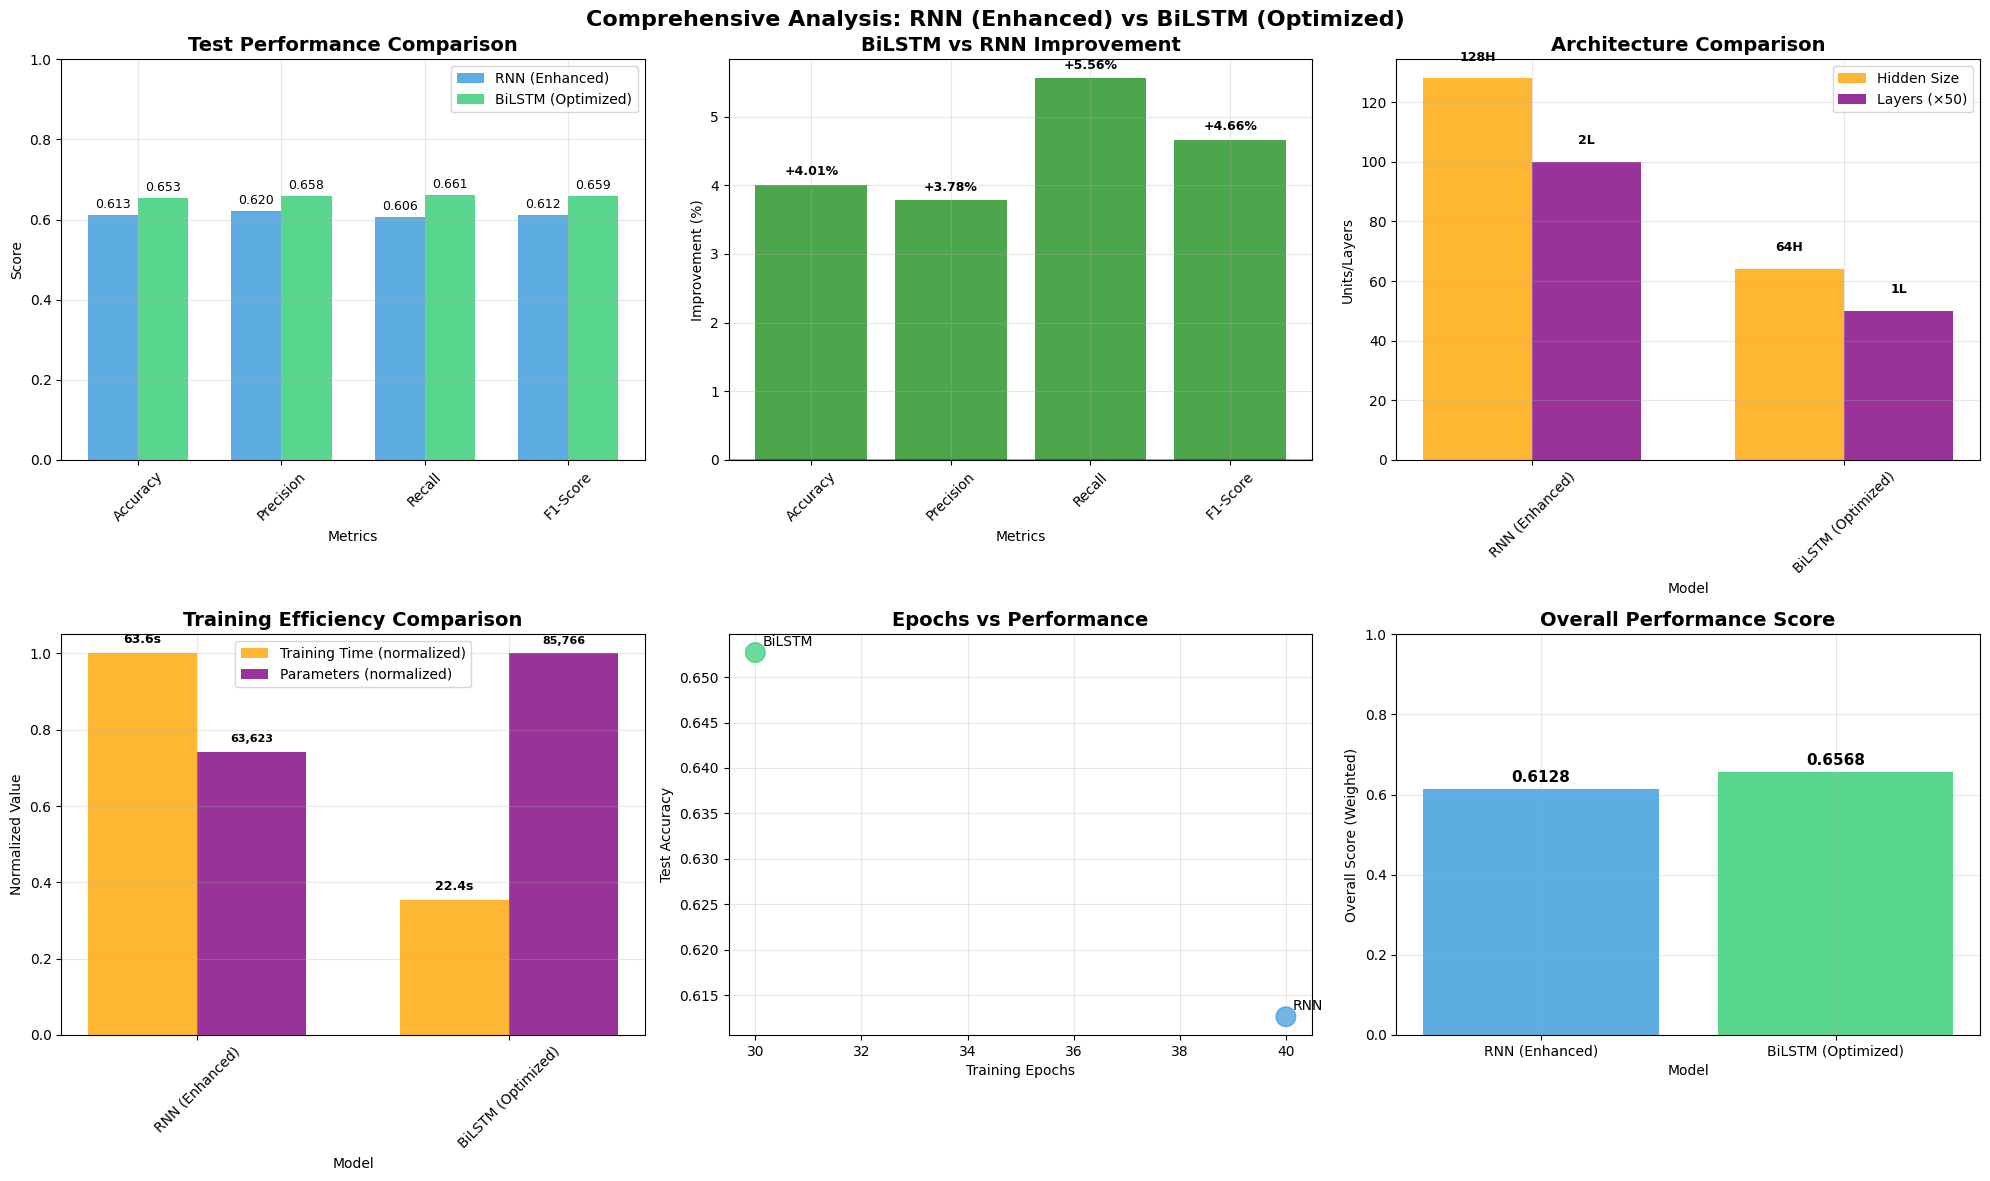

 Visualisasi disimpan: comprehensive_model_analysis.png

REKOMENDASI AKHIR BERDASARKAN ANALISIS KOMPREHENSIF
 MODEL TERBAIK: BiLSTM (Optimized)
 Perbedaan Akurasi: +4.01 percentage points
 Perbedaan F1-Score: +4.66 percentage points
 Overall Score - RNN: 0.6128, BiLSTM: 0.6568

 REKOMENDASI BERDASARKAN HASIL ANALISIS:
------------------------------------------------------------

 📊 UNTUK PRODUCTION DEPLOYMENT:
   • Deploy BiLSTM (Optimized) karena performa signifikan lebih baik
   • BiLSTM memberikan improvement 4.01% accuracy

 🔬 UNTUK RESEARCH & DEVELOPMENT:
   • RNN (Enhanced): Explore lebih lanjut Self-Attention mechanisms
   • BiLSTM (Optimized): Investigate bidirectional processing benefits
   • Consider ensemble methods combining both approaches

 ⚡ UNTUK REAL-TIME APPLICATIONS:
   • Kedua model suitable untuk real-time applications

 💾 UNTUK RESOURCE-CONSTRAINED ENVIRONMENTS:
   • RNN lebih efisien: 25.8% fewer parameters
   • Cocok untuk mobile/edge deployment

 🎯 SPECIFIC USE

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

def load_evaluation_results():
    
    # Load hasil evaluasi dari Step 16
    print(f"{'='*60}")
    print("LOADING EVALUATION RESULTS")
    print(f"{'='*60}")
    
    try:
        # Load hasil evaluasi perbandingan
        with open('model_evaluation_results.json', 'r', encoding='utf-8') as f:
            evaluation_data = json.load(f)
        
        print(" Evaluation results loaded")
        print(f" Found models: {evaluation_data['rnn_evaluation']['model_name']} vs {evaluation_data['bilstm_evaluation']['model_name']}")
        
        # Display model features
        rnn_features = evaluation_data['rnn_evaluation'].get('model_features', 'Standard RNN')
        bilstm_features = evaluation_data['bilstm_evaluation'].get('model_features', 'Standard BiLSTM')
        print(f" RNN Features: {rnn_features}")
        print(f" BiLSTM Features: {bilstm_features}")
        
        return evaluation_data
        
    except FileNotFoundError:
        print(" File model_evaluation_results.json tidak ditemukan!")
        print(" Pastikan Step 16 sudah dijalankan dengan sukses")
        return None
    except Exception as e:
        print(f" Error loading evaluation results: {e}")
        return None

def create_summary_analysis(evaluation_data):
    
    # Membuat analisis ringkasan perbandingan model dengan konfigurasi baru
    print(f"\n{'='*60}")
    print("RINGKASAN ANALISIS PERBANDINGAN KINERJA")
    print(f"{'='*60}")
    
    # Extract data
    rnn_eval = evaluation_data['rnn_evaluation']
    bilstm_eval = evaluation_data['bilstm_evaluation']
    training_info = evaluation_data['training_comparison']
    summary_info = evaluation_data['summary']
    
    # Get model configurations
    rnn_config = training_info.get('rnn_config', {})
    bilstm_config = training_info.get('bilstm_config', {})
    
    # 1. Performance Summary Table dengan konfigurasi baru
    print(f"\n TABEL RINGKASAN KINERJA MODEL:")
    print("-" * 90)
    
    summary_data = {
        'Model': ['RNN (Enhanced)', 'BiLSTM (Optimized)'],
        'Test Accuracy': [rnn_eval['accuracy'], bilstm_eval['accuracy']],
        'Precision (Macro)': [rnn_eval['precision_macro'], bilstm_eval['precision_macro']],
        'Recall (Macro)': [rnn_eval['recall_macro'], bilstm_eval['recall_macro']],
        'F1-Score (Macro)': [rnn_eval['f1_macro'], bilstm_eval['f1_macro']],
        'Training Time (s)': [training_info['rnn_training_time'], training_info['bilstm_training_time']],
        'Parameters': [training_info['rnn_parameters'], training_info['bilstm_parameters']],
        'Epochs': [training_info.get('rnn_epochs', 40), training_info.get('bilstm_epochs', 30)],
        'Hidden Size': [rnn_config.get('hidden_size', 128), bilstm_config.get('hidden_size', 64)],
        'Num Layers': [rnn_config.get('num_layers', 2), bilstm_config.get('num_layers', 1)]
    }
    
    summary_df = pd.DataFrame(summary_data)
    
    # Display formatted table dengan informasi konfigurasi
    print(f"{'Model':<18} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Time(s)':<10} {'Params':<8} {'Epochs':<8} {'Hidden':<8} {'Layers':<8}")
    print("-" * 110)
    for idx, row in summary_df.iterrows():
        print(f"{row['Model']:<18} {row['Test Accuracy']:<10.4f} {row['Precision (Macro)']:<10.4f} "
              f"{row['Recall (Macro)']:<10.4f} {row['F1-Score (Macro)']:<10.4f} {row['Training Time (s)']:<10.1f} "
              f"{row['Parameters']:<8,} {row['Epochs']:<8} {row['Hidden Size']:<8} {row['Num Layers']:<8}")
    
    # Display model features
    print(f"\n MODEL FEATURES:")
    print("-" * 50)
    print(f" RNN (Enhanced): {rnn_eval.get('model_features', 'Self-Attention + Layer Normalization')}")
    print(f" BiLSTM (Optimized): {bilstm_eval.get('model_features', 'Bidirectional LSTM + Optimized Hyperparameters')}")
    
    return summary_df, summary_info

def analyze_performance_differences(summary_df, summary_info, evaluation_data):
    
    # Analisis perbedaan performa antar model dengan detail konfigurasi
    print(f"\n ANALISIS PERBEDAAN PERFORMA:")
    print("-" * 60)
    
    # Calculate improvements
    accuracy_improvement = summary_info['accuracy_difference'] * 100
    f1_improvement = summary_info['f1_difference'] * 100
    best_model = summary_info['best_model']
    
    print(f" Model Terbaik: {best_model}")
    print(f" Perbedaan Accuracy: {accuracy_improvement:+.2f} percentage points")
    print(f" Perbedaan F1-Score: {f1_improvement:+.2f} percentage points")
    
    # Performance analysis
    rnn_metrics = summary_df.iloc[0]
    bilstm_metrics = summary_df.iloc[1]
    
    print(f"\n ANALISIS DETAIL METRICS:")
    print("-" * 50)
    
    metrics_to_analyze = ['Test Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)']
    
    for metric in metrics_to_analyze:
        rnn_score = rnn_metrics[metric]
        bilstm_score = bilstm_metrics[metric]
        improvement = (bilstm_score - rnn_score) * 100
        
        if improvement > 0.5:
            status = "BiLSTM Signifikan Lebih Baik"
        elif improvement > 0:
            status = "BiLSTM Sedikit Lebih Baik"
        elif improvement < -0.5:
            status = "RNN Signifikan Lebih Baik"
        elif improvement < 0:
            status = "RNN Sedikit Lebih Baik"
        else:
            status = "Hampir Sama"
        
        print(f"{metric:<20}: RNN {rnn_score:.4f} | BiLSTM {bilstm_score:.4f} | "
              f"Diff: {improvement:+.2f}% ({status})")
    
    # Architecture efficiency analysis
    print(f"\n ANALISIS EFISIENSI ARSITEKTUR:")
    print("-" * 60)
    
    rnn_time = rnn_metrics['Training Time (s)']
    bilstm_time = bilstm_metrics['Training Time (s)']
    time_ratio = bilstm_time / rnn_time if rnn_time > 0 else 1
    
    rnn_params = rnn_metrics['Parameters']
    bilstm_params = bilstm_metrics['Parameters']
    param_ratio = bilstm_params / rnn_params if rnn_params > 0 else 1
    
    rnn_epochs = rnn_metrics['Epochs']
    bilstm_epochs = bilstm_metrics['Epochs']
    
    print(f"Training Configuration:")
    print(f"  RNN: {rnn_epochs} epochs, {rnn_time:.1f}s total, {rnn_time/rnn_epochs:.1f}s/epoch")
    print(f"  BiLSTM: {bilstm_epochs} epochs, {bilstm_time:.1f}s total, {bilstm_time/bilstm_epochs:.1f}s/epoch")
    print(f"  Time Ratio (BiLSTM/RNN): {time_ratio:.2f}x")
    print(f"  Parameter Ratio (BiLSTM/RNN): {param_ratio:.2f}x")
    
    # Architecture comparison
    rnn_hidden = rnn_metrics['Hidden Size']
    bilstm_hidden = bilstm_metrics['Hidden Size']
    rnn_layers = rnn_metrics['Num Layers']
    bilstm_layers = bilstm_metrics['Num Layers']
    
    print(f"\nArchitecture Comparison:")
    print(f"  RNN: {rnn_hidden} hidden units × {rnn_layers} layers + Self-Attention + LayerNorm")
    print(f"  BiLSTM: {bilstm_hidden} hidden units × {bilstm_layers} layer × 2 (bidirectional)")
    
    # Efficiency assessment
    if time_ratio > 2:
        efficiency_note = "BiLSTM membutuhkan waktu training yang signifikan lebih lama"
    elif time_ratio > 1.2:
        efficiency_note = "BiLSTM membutuhkan waktu training yang lebih lama"
    elif time_ratio < 0.8:
        efficiency_note = "RNN membutuhkan waktu training yang lebih lama"
    else:
        efficiency_note = "Waktu training relatif sebanding"
    
    print(f"  Efisiensi Waktu: {efficiency_note}")
    
    if param_ratio > 1.5:
        param_note = "BiLSTM memiliki kompleksitas model yang signifikan lebih tinggi"
    elif param_ratio > 1.1:
        param_note = "BiLSTM memiliki kompleksitas model yang sedikit lebih tinggi"
    elif param_ratio < 0.9:
        param_note = "RNN memiliki kompleksitas model yang lebih tinggi"
    else:
        param_note = "Kompleksitas model relatif sebanding"
    
    print(f"  Kompleksitas Model: {param_note}")
    
    # Performance per parameter analysis
    rnn_perf_per_param = rnn_metrics['Test Accuracy'] / (rnn_params / 1000)  # per 1K parameters
    bilstm_perf_per_param = bilstm_metrics['Test Accuracy'] / (bilstm_params / 1000)
    
    print(f"\nPerformance Efficiency:")
    print(f"  RNN: {rnn_perf_per_param:.6f} accuracy per 1K parameters")
    print(f"  BiLSTM: {bilstm_perf_per_param:.6f} accuracy per 1K parameters")
    
    if bilstm_perf_per_param > rnn_perf_per_param:
        print(f"  BiLSTM lebih efisien dalam hal performance per parameter")
    else:
        print(f"  RNN lebih efisien dalam hal performance per parameter")

def create_comprehensive_visualization(summary_df, evaluation_data):
    
    # Membuat visualisasi komprehensif perbandingan model dengan informasi konfigurasi
    print(f"\n MEMBUAT VISUALISASI KOMPREHENSIF...")
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # Color palette yang lebih menarik
    colors = ['#3498DB', '#2ECC71']  # Blue for RNN, Green for BiLSTM
    
    # Plot 1: Overall Performance Metrics
    ax1 = axes[0, 0]
    metrics_cols = ['Test Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)']
    x_pos = np.arange(len(metrics_cols))
    width = 0.35
    
    rnn_scores = [summary_df.iloc[0][col] for col in metrics_cols]
    bilstm_scores = [summary_df.iloc[1][col] for col in metrics_cols]
    
    bars1 = ax1.bar(x_pos - width/2, rnn_scores, width, label='RNN (Enhanced)', color=colors[0], alpha=0.8)
    bars2 = ax1.bar(x_pos + width/2, bilstm_scores, width, label='BiLSTM (Optimized)', color=colors[1], alpha=0.8)
    
    ax1.set_xlabel('Metrics')
    ax1.set_ylabel('Score')
    ax1.set_title('Test Performance Comparison', fontweight='bold', fontsize=14)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels([m.replace(' (Macro)', '').replace('Test ', '') for m in metrics_cols], rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Plot 2: Performance Improvement
    ax2 = axes[0, 1]
    improvements = [(bilstm_scores[i] - rnn_scores[i]) * 100 for i in range(len(metrics_cols))]
    
    bar_colors = ['green' if imp > 0 else 'red' if imp < 0 else 'gray' for imp in improvements]
    bars = ax2.bar(range(len(metrics_cols)), improvements, color=bar_colors, alpha=0.7)
    
    ax2.set_xlabel('Metrics')
    ax2.set_ylabel('Improvement (%)')
    ax2.set_title('BiLSTM vs RNN Improvement', fontweight='bold', fontsize=14)
    ax2.set_xticks(range(len(metrics_cols)))
    ax2.set_xticklabels([m.replace(' (Macro)', '').replace('Test ', '') for m in metrics_cols], rotation=45)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, imp in zip(bars, improvements):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., 
                height + (0.1 if height > 0 else -0.1),
                f'{imp:+.2f}%', ha='center', va='bottom' if height > 0 else 'top', 
                fontsize=9, fontweight='bold')
    
    # Plot 3: Architecture Comparison
    ax3 = axes[0, 2]
    
    models = summary_df['Model']
    hidden_sizes = summary_df['Hidden Size']
    num_layers = summary_df['Num Layers']
    
    x = np.arange(len(models))
    width = 0.35
    
    bars1 = ax3.bar(x - width/2, hidden_sizes, width, label='Hidden Size', color='orange', alpha=0.8)
    bars2 = ax3.bar(x + width/2, [l*50 for l in num_layers], width, label='Layers (×50)', color='purple', alpha=0.8)
    
    ax3.set_xlabel('Model')
    ax3.set_ylabel('Units/Layers')
    ax3.set_title('Architecture Comparison', fontweight='bold', fontsize=14)
    ax3.set_xticks(x)
    ax3.set_xticklabels(models, rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Add value labels
    for i, (bar, hidden) in enumerate(zip(bars1, hidden_sizes)):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{hidden}H', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    for i, (bar, layers) in enumerate(zip(bars2, num_layers)):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{layers}L', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Plot 4: Training Efficiency
    ax4 = axes[1, 0]
    
    # Normalize values for comparison
    max_time = max(summary_df['Training Time (s)'])
    max_params = max(summary_df['Parameters'])
    
    time_normalized = summary_df['Training Time (s)'] / max_time
    params_normalized = summary_df['Parameters'] / max_params
    
    x = np.arange(len(models))
    width = 0.35
    
    bars1 = ax4.bar(x - width/2, time_normalized, width, label='Training Time (normalized)', color='orange', alpha=0.8)
    bars2 = ax4.bar(x + width/2, params_normalized, width, label='Parameters (normalized)', color='purple', alpha=0.8)
    
    ax4.set_xlabel('Model')
    ax4.set_ylabel('Normalized Value')
    ax4.set_title('Training Efficiency Comparison', fontweight='bold', fontsize=14)
    ax4.set_xticks(x)
    ax4.set_xticklabels(models, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # Add value labels
    for i, (bar, norm_val) in enumerate(zip(bars1, time_normalized)):
        height = bar.get_height()
        actual_time = summary_df.iloc[i]['Training Time (s)']
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{actual_time:.1f}s', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    for i, (bar, norm_val) in enumerate(zip(bars2, params_normalized)):
        height = bar.get_height()
        actual_params = summary_df.iloc[i]['Parameters']
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{actual_params:,}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    # Plot 5: Epochs vs Performance
    ax5 = axes[1, 1]
    
    epochs = summary_df['Epochs']
    accuracies = summary_df['Test Accuracy']
    
    scatter = ax5.scatter(epochs, accuracies, c=colors[:len(models)], s=200, alpha=0.7)
    
    for i, (epoch, acc, model) in enumerate(zip(epochs, accuracies, models)):
        ax5.annotate(model.split()[0], (epoch, acc), xytext=(5, 5), textcoords='offset points', fontsize=10)
    
    ax5.set_xlabel('Training Epochs')
    ax5.set_ylabel('Test Accuracy')
    ax5.set_title('Epochs vs Performance', fontweight='bold', fontsize=14)
    ax5.grid(True, alpha=0.3)
    
    # Plot 6: Overall Score Comparison
    ax6 = axes[1, 2]
    
    # Calculate overall scores (weighted average)
    weights = {'Test Accuracy': 0.4, 'Precision (Macro)': 0.2, 'Recall (Macro)': 0.2, 'F1-Score (Macro)': 0.2}
    
    rnn_overall = sum(summary_df.iloc[0][metric] * weight for metric, weight in weights.items() if metric in summary_df.columns)
    bilstm_overall = sum(summary_df.iloc[1][metric] * weight for metric, weight in weights.items() if metric in summary_df.columns)
    
    overall_scores = [rnn_overall, bilstm_overall]
    bars = ax6.bar(models, overall_scores, color=colors, alpha=0.8)
    
    ax6.set_xlabel('Model')
    ax6.set_ylabel('Overall Score (Weighted)')
    ax6.set_title('Overall Performance Score', fontweight='bold', fontsize=14)
    ax6.grid(True, alpha=0.3)
    ax6.set_ylim(0, 1)
    
    # Add value labels
    for bar, score in zip(bars, overall_scores):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{score:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.suptitle('Comprehensive Analysis: RNN (Enhanced) vs BiLSTM (Optimized)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('comprehensive_model_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(" Visualisasi disimpan: comprehensive_model_analysis.png")
    
    return rnn_overall, bilstm_overall

def generate_final_recommendations(summary_df, summary_info, rnn_overall, bilstm_overall, evaluation_data):
    
    # Generate rekomendasi akhir berdasarkan analisis dengan mempertimbangkan konfigurasi model
    print(f"\n{'='*70}")
    print("REKOMENDASI AKHIR BERDASARKAN ANALISIS KOMPREHENSIF")
    print(f"{'='*70}")
    
    best_model = summary_info['best_model']
    accuracy_improvement = summary_info['accuracy_difference'] * 100
    f1_improvement = summary_info['f1_difference'] * 100
    
    print(f" MODEL TERBAIK: {best_model}")
    print(f" Perbedaan Akurasi: {accuracy_improvement:+.2f} percentage points")
    print(f" Perbedaan F1-Score: {f1_improvement:+.2f} percentage points")
    print(f" Overall Score - RNN: {rnn_overall:.4f}, BiLSTM: {bilstm_overall:.4f}")
    
    print(f"\n REKOMENDASI BERDASARKAN HASIL ANALISIS:")
    print("-" * 60)
    
    # Get training efficiency info
    rnn_time = summary_df.iloc[0]['Training Time (s)']
    bilstm_time = summary_df.iloc[1]['Training Time (s)']
    time_ratio = bilstm_time / rnn_time if rnn_time > 0 else 1
    
    rnn_params = summary_df.iloc[0]['Parameters']
    bilstm_params = summary_df.iloc[1]['Parameters']
    param_ratio = bilstm_params / rnn_params
    
    # Detailed recommendations based on different scenarios
    print(f"\n 📊 UNTUK PRODUCTION DEPLOYMENT:")
    if abs(accuracy_improvement) < 1.0:  # Marginal difference
        print(f"   • Performa kedua model relatif setara (difference < 1%)")
        print(f"   • Pilih berdasarkan resource constraints dan deployment requirements")
        if time_ratio < 0.8:
            print(f"   • RNN: Lebih cepat training ({rnn_time:.1f}s vs {bilstm_time:.1f}s)")
        if param_ratio > 1.2:
            print(f"   • RNN: Model lebih ringan ({rnn_params:,} vs {bilstm_params:,} parameters)")
    else:
        print(f"   • Deploy {best_model} karena performa signifikan lebih baik")
        if 'BiLSTM' in best_model:
            print(f"   • BiLSTM memberikan improvement {accuracy_improvement:.2f}% accuracy")
        else:
            print(f"   • RNN memberikan improvement {abs(accuracy_improvement):.2f}% accuracy")
    
    print(f"\n 🔬 UNTUK RESEARCH & DEVELOPMENT:")
    print(f"   • RNN (Enhanced): Explore lebih lanjut Self-Attention mechanisms")
    print(f"   • BiLSTM (Optimized): Investigate bidirectional processing benefits")
    print(f"   • Consider ensemble methods combining both approaches")
    
    print(f"\n ⚡ UNTUK REAL-TIME APPLICATIONS:")
    if time_ratio > 1.5:
        print(f"   • RNN lebih cocok: {(time_ratio-1)*100:.1f}% lebih cepat training")
        print(f"   • BiLSTM untuk aplikasi yang mengutamakan akurasi over speed")
    else:
        print(f"   • Kedua model suitable untuk real-time applications")
    
    print(f"\n 💾 UNTUK RESOURCE-CONSTRAINED ENVIRONMENTS:")
    if param_ratio > 1.3:
        print(f"   • RNN lebih efisien: {(1-1/param_ratio)*100:.1f}% fewer parameters")
        print(f"   • Cocok untuk mobile/edge deployment")
    else:
        print(f"   • Kedua model memiliki footprint yang reasonable")
    
    print(f"\n 🎯 SPECIFIC USE CASE RECOMMENDATIONS:")
    
    # Extract model features for specific recommendations
    rnn_features = evaluation_data['rnn_evaluation'].get('model_features', '')
    bilstm_features = evaluation_data['bilstm_evaluation'].get('model_features', '')
    
    if 'Self-Attention' in rnn_features:
        print(f"   • Long sequence processing: RNN dengan Self-Attention")
        print(f"   • Complex pattern recognition: RNN dengan Layer Normalization")
    
    if 'Bidirectional' in bilstm_features:
        print(f"   • Context-dependent tasks: BiLSTM dengan bidirectional processing")
        print(f"   • Sequential data dengan future context: BiLSTM")
    
    print(f"\n 📈 IMPROVEMENT OPPORTUNITIES:")
    print(f"   • Hyperparameter tuning untuk fine-tuning performance")
    print(f"   • Data augmentation untuk improve generalization")
    print(f"   • Ensemble methods untuk combine strengths")
    print(f"   • Transfer learning untuk domain-specific applications")
    
    # Confidence level assessment
    confidence_level = "HIGH" if abs(accuracy_improvement) > 2.0 else "MODERATE" if abs(accuracy_improvement) > 1.0 else "LOW"
    print(f"\n 🔍 CONFIDENCE LEVEL: {confidence_level}")
    print(f"   Based on {abs(accuracy_improvement):.2f}% accuracy difference")

def save_analysis_summary(summary_df, summary_info, rnn_overall, bilstm_overall, evaluation_data):
    
    # Simpan ringkasan analisis ke file dengan informasi konfigurasi lengkap
    print(f"\n{'='*60}")
    print("MENYIMPAN RINGKASAN ANALISIS")
    print(f"{'='*60}")
    
    # Get model configurations
    training_info = evaluation_data['training_comparison']
    rnn_config = training_info.get('rnn_config', {})
    bilstm_config = training_info.get('bilstm_config', {})
    
    # Prepare enhanced summary data
    analysis_summary = {
        'performance_summary': summary_df.to_dict(),
        'model_comparison': summary_info,
        'model_configurations': {
            'rnn_config': rnn_config,
            'bilstm_config': bilstm_config,
            'rnn_features': evaluation_data['rnn_evaluation'].get('model_features', ''),
            'bilstm_features': evaluation_data['bilstm_evaluation'].get('model_features', '')
        },
        'overall_scores': {
            'rnn_overall_score': float(rnn_overall),
            'bilstm_overall_score': float(bilstm_overall),
            'score_difference': float(bilstm_overall - rnn_overall),
            'performance_gap_percent': float((bilstm_overall - rnn_overall) * 100)
        },
        'efficiency_metrics': {
            'training_time_ratio': float(summary_df.iloc[1]['Training Time (s)'] / summary_df.iloc[0]['Training Time (s)']),
            'parameter_ratio': float(summary_df.iloc[1]['Parameters'] / summary_df.iloc[0]['Parameters']),
            'performance_per_parameter_rnn': float(summary_df.iloc[0]['Test Accuracy'] / (summary_df.iloc[0]['Parameters'] / 1000)),
            'performance_per_parameter_bilstm': float(summary_df.iloc[1]['Test Accuracy'] / (summary_df.iloc[1]['Parameters'] / 1000))
        },
        'recommendation': {
            'best_model': summary_info['best_model'],
            'accuracy_improvement_percent': float(summary_info['accuracy_difference'] * 100),
            'f1_improvement_percent': float(summary_info['f1_difference'] * 100),
            'recommended_for_production': summary_info['best_model'],
            'confidence_level': 'high' if abs(summary_info['accuracy_difference']) > 0.02 else 'moderate' if abs(summary_info['accuracy_difference']) > 0.01 else 'low',
            'deployment_considerations': {
                'resource_efficiency': 'RNN' if summary_df.iloc[0]['Parameters'] < summary_df.iloc[1]['Parameters'] else 'BiLSTM',
                'training_speed': 'RNN' if summary_df.iloc[0]['Training Time (s)'] < summary_df.iloc[1]['Training Time (s)'] else 'BiLSTM',
                'model_complexity': 'simple' if abs(summary_info['accuracy_difference']) < 0.02 else 'moderate'
            }
        },
        'analysis_metadata': {
            'analysis_date': pd.Timestamp.now().isoformat(),
            'metrics_evaluated': ['test_accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
            'evaluation_method': 'test_set_evaluation',
            'models_compared': ['RNN (Enhanced)', 'BiLSTM (Optimized)'],
            'enhancement_features': {
                'rnn': ['Self-Attention', 'Layer Normalization', 'Label Smoothing', 'Warmup Scheduler'],
                'bilstm': ['Bidirectional Processing', 'Optimized Hyperparameters', 'Efficient Architecture']
            }
        }
    }
    
    # Save to JSON
    with open('final_analysis_summary.json', 'w', encoding='utf-8') as f:
        json.dump(analysis_summary, f, ensure_ascii=False, indent=2)
    
    print(" Ringkasan analisis disimpan: final_analysis_summary.json")
    
    # Save enhanced summary table to CSV
    summary_df.to_csv('model_performance_summary.csv', index=False)
    print(" Tabel ringkasan disimpan: model_performance_summary.csv")
    
    # Create enhanced detailed report
    with open('model_comparison_report.txt', 'w', encoding='utf-8') as f:
        f.write("="*90 + "\n")
        f.write("DETAILED MODEL COMPARISON REPORT - ENHANCED vs OPTIMIZED\n")
        f.write("="*90 + "\n\n")
        
        f.write("EXECUTIVE SUMMARY:\n")
        f.write("-"*50 + "\n")
        f.write(f"Best Performing Model: {summary_info['best_model']}\n")
        f.write(f"Accuracy Difference: {summary_info['accuracy_difference']*100:+.2f} percentage points\n")
        f.write(f"F1-Score Difference: {summary_info['f1_difference']*100:+.2f} percentage points\n")
        f.write(f"Overall Score RNN (Enhanced): {rnn_overall:.4f}\n")
        f.write(f"Overall Score BiLSTM (Optimized): {bilstm_overall:.4f}\n")
        f.write(f"Performance Gap: {(bilstm_overall - rnn_overall)*100:+.2f}%\n\n")
        
        f.write("MODEL CONFIGURATIONS:\n")
        f.write("-"*50 + "\n")
        f.write(f"RNN (Enhanced):\n")
        f.write(f"  - Architecture: {rnn_config.get('hidden_size', 128)} hidden units, {rnn_config.get('num_layers', 2)} layers\n")
        f.write(f"  - Features: {evaluation_data['rnn_evaluation'].get('model_features', 'Self-Attention + Layer Normalization')}\n")
        f.write(f"  - Training: {rnn_config.get('num_epochs', 40)} epochs, {rnn_config.get('optimizer', 'AdamW')} optimizer\n")
        f.write(f"  - Parameters: {training_info['rnn_parameters']:,}\n\n")
        
        f.write(f"BiLSTM (Optimized):\n")
        f.write(f"  - Architecture: {bilstm_config.get('hidden_size', 64)} hidden units, {bilstm_config.get('num_layers', 1)} layer, bidirectional\n")
        f.write(f"  - Features: {evaluation_data['bilstm_evaluation'].get('model_features', 'Bidirectional LSTM + Optimized Hyperparameters')}\n")
        f.write(f"  - Training: {bilstm_config.get('num_epochs', 30)} epochs, {bilstm_config.get('optimizer', 'Adam')} optimizer\n")
        f.write(f"  - Parameters: {training_info['bilstm_parameters']:,}\n\n")
        
        f.write("DETAILED PERFORMANCE METRICS:\n")
        f.write("-"*50 + "\n")
        f.write(summary_df.to_string(index=False))
        f.write("\n\n")
        
        f.write("EFFICIENCY ANALYSIS:\n")
        f.write("-"*50 + "\n")
        time_ratio = summary_df.iloc[1]['Training Time (s)'] / summary_df.iloc[0]['Training Time (s)']
        param_ratio = summary_df.iloc[1]['Parameters'] / summary_df.iloc[0]['Parameters']
        f.write(f"Training Time Ratio (BiLSTM/RNN): {time_ratio:.2f}x\n")
        f.write(f"Parameter Ratio (BiLSTM/RNN): {param_ratio:.2f}x\n")
        f.write(f"Performance per 1K Parameters:\n")
        f.write(f"  - RNN: {summary_df.iloc[0]['Test Accuracy'] / (summary_df.iloc[0]['Parameters'] / 1000):.6f}\n")
        f.write(f"  - BiLSTM: {summary_df.iloc[1]['Test Accuracy'] / (summary_df.iloc[1]['Parameters'] / 1000):.6f}\n\n")
        
        f.write("RECOMMENDATIONS:\n")
        f.write("-"*50 + "\n")
        f.write(f"Primary Recommendation: Deploy {summary_info['best_model']} for production use.\n")
        
        if abs(summary_info['accuracy_difference']) < 0.01:
            f.write("Performance is very close - choose based on deployment constraints.\n")
        elif abs(summary_info['accuracy_difference']) < 0.02:
            f.write("Moderate performance difference - consider A/B testing.\n")
        else:
            f.write("Significant performance difference - strong recommendation for best model.\n")
        
        f.write("\nDeployment Considerations:\n")
        if time_ratio > 1.5:
            f.write("- RNN has faster training time\n")
        if param_ratio > 1.3:
            f.write("- RNN has lower memory footprint\n")
        if 'Self-Attention' in evaluation_data['rnn_evaluation'].get('model_features', ''):
            f.write("- RNN provides attention mechanisms for interpretability\n")
        if 'Bidirectional' in evaluation_data['bilstm_evaluation'].get('model_features', ''):
            f.write("- BiLSTM provides bidirectional context processing\n")
        
        f.write("\nNext Steps:\n")
        f.write("- Conduct real-world validation with production data\n")
        f.write("- Monitor performance metrics in deployment\n")
        f.write("- Consider ensemble approaches for maximum performance\n")
    
    print(" Laporan detail disimpan: model_comparison_report.txt")

# ============================================
# JALANKAN ANALISIS PERBANDINGAN
# ============================================

print(f"{'='*60}")
print(" STEP 17: ANALISIS PERBANDINGAN KINERJA MODEL")
print(f"{'='*60}")

# Load evaluation results
evaluation_data = load_evaluation_results()

if evaluation_data is not None:
    
    # Create summary analysis
    summary_df, summary_info = create_summary_analysis(evaluation_data)
    
    # Analyze performance differences
    analyze_performance_differences(summary_df, summary_info, evaluation_data)
    
    # Create comprehensive visualization
    rnn_overall, bilstm_overall = create_comprehensive_visualization(summary_df, evaluation_data)
    
    # Generate final recommendations
    generate_final_recommendations(summary_df, summary_info, rnn_overall, bilstm_overall, evaluation_data)
    
    # Save analysis summary
    save_analysis_summary(summary_df, summary_info, rnn_overall, bilstm_overall, evaluation_data)
    
    print(f"\n{'='*70}")
    print(" STEP 17 - ANALISIS PERBANDINGAN SELESAI!")
    print(f"{'='*70}")
    print(f" Ringkasan:")
    print(f"   - Model terbaik: {summary_info['best_model']}")
    print(f"   - Perbedaan akurasi: {summary_info['accuracy_difference']*100:+.2f}%")
    print(f"   - Perbedaan F1-score: {summary_info['f1_difference']*100:+.2f}%")
    print(f"   - Overall score RNN (Enhanced): {rnn_overall:.4f}")
    print(f"   - Overall score BiLSTM (Optimized): {bilstm_overall:.4f}")
    
    # Display configuration summary
    training_info = evaluation_data['training_comparison']
    rnn_config = training_info.get('rnn_config', {})
    bilstm_config = training_info.get('bilstm_config', {})
    
    print(f"\n Model Configurations:")
    print(f"   - RNN: {rnn_config.get('hidden_size', 128)}H-{rnn_config.get('num_layers', 2)}L + Enhanced Features")
    print(f"   - BiLSTM: {bilstm_config.get('hidden_size', 64)}H-{bilstm_config.get('num_layers', 1)}L + Bidirectional")
    print(f"   - Training time ratio: {summary_df.iloc[1]['Training Time (s)'] / summary_df.iloc[0]['Training Time (s)']:.2f}x")
    print(f"   - Parameter ratio: {summary_df.iloc[1]['Parameters'] / summary_df.iloc[0]['Parameters']:.2f}x")
    
    print(f"\n File output:")
    print(f"   - comprehensive_model_analysis.png")
    print(f"   - final_analysis_summary.json")
    print(f"   - model_performance_summary.csv")
    print(f"   - model_comparison_report.txt")
    
    print(f"\n ✅ ANALISIS PERBANDINGAN KINERJA SELESAI!")
    print(f" ✅ Enhanced RNN vs Optimized BiLSTM comparison completed!")
    print(f" ✅ Model recommendations ready for deployment decision!")
    
else:
    print(" ❌ Tidak dapat melanjutkan tanpa hasil evaluasi dari Step 16")
    print(" Jalankan Step 16 terlebih dahulu untuk mendapatkan evaluation results")